In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

Using TensorFlow backend.


In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [6]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01 #0.5
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0) # float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 2 # 1 for TRB 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.2
params.d2d.B_Marketing = 0.0
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 7 # 5 for TRB
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000 # 2000
params.nV = 200  # 200
params.nD = 1600
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro

In [6]:
sim = MaaSSim.simulators.simulate_rldqn_case2_rev_limited(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING,file_res='../../rl_results/ams_prop_exp_010_8020limited.csv',stp=0.05,initial_comm_rate=0.2,w_rew=0.8,w_mark=0.2)

This simulation uses albatros data


[2023-03-10 20:27:58,858] Setting up 4h simulation at 2023-03-10 18:27:31 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands


stp is:  0.05
type(stp):  <class 'float'>
initial comm rate:  0.2
type(comm_rate):  <class 'numpy.float64'>
----------------> day: 0 of 800 <--------------------


[2023-03-10 20:28:06,979] simulation time 3.4 s


0 0 2000
0.0 2000
day:  0 , nP:  0 , nV:  0 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.0 , new nP:  0 , new nV:  0 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0
----------------> day: 1 of 800 <--------------------


[2023-03-10 20:28:15,715] simulation time 3.7 s


9 1 2000
15.27 2000
day:  1 , nP:  0 , nV:  0 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.0 , new nP:  9 , new nV:  1 , plat_rev: 15.27 , plat_rev_wod: 15.27 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0038174999999999997 , mark_normal: 0.005
----------------> day: 2 of 800 <--------------------


[2023-03-10 20:28:24,353] simulation time 3.7 s


8 1 2000
14.44 2000
day:  2 , nP:  9 , nV:  1 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.0 , new nP:  8 , new nV:  1 , plat_rev: 14.44 , plat_rev_wod: 14.44 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.00361 , mark_normal: 0.0045
----------------> day: 3 of 800 <--------------------


[2023-03-10 20:28:33,327] simulation time 3.9 s


16 2 2000
30.11 2000
day:  3 , nP:  8 , nV:  1 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  16 , new nV:  2 , plat_rev: 30.11 , plat_rev_wod: 30.11 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0075274999999999995 , mark_normal: 0.009
----------------> day: 4 of 800 <--------------------


[2023-03-10 20:28:42,178] simulation time 3.7 s


23 0 2000
34.92 2000
day:  4 , nP:  16 , nV:  2 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  23 , new nV:  0 , plat_rev: 34.92 , plat_rev_wod: 34.92 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.00873 , mark_normal: 0.0115
----------------> day: 5 of 800 <--------------------


[2023-03-10 20:28:51,291] simulation time 4.3 s


32 3 2000
33.86 2000
day:  5 , nP:  23 , nV:  0 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  32 , new nV:  3 , plat_rev: 33.86 , plat_rev_wod: 33.86 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.008465 , mark_normal: 0.0175
----------------> day: 6 of 800 <--------------------


[2023-03-10 20:29:01,303] simulation time 4.9 s


52 7 2000
86.6 2000
day:  6 , nP:  32 , nV:  3 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  52 , new nV:  7 , plat_rev: 86.6 , plat_rev_wod: 86.6 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.02165 , mark_normal: 0.0295
----------------> day: 7 of 800 <--------------------


[2023-03-10 20:29:10,296] simulation time 4.1 s


51 1 2000
92.65 2000
day:  7 , nP:  52 , nV:  7 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  51 , new nV:  1 , plat_rev: 92.65 , plat_rev_wod: 92.65 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.023162500000000003 , mark_normal: 0.026
----------------> day: 8 of 800 <--------------------


[2023-03-10 20:29:20,338] simulation time 5.0 s


59 5 2000
128.01 2000
day:  8 , nP:  51 , nV:  1 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  59 , new nV:  5 , plat_rev: 128.01 , plat_rev_wod: 128.01 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.032002499999999996 , mark_normal: 0.032
----------------> day: 9 of 800 <--------------------


[2023-03-10 20:29:30,240] simulation time 4.8 s


48 9 2000
135.06 2000
day:  9 , nP:  59 , nV:  5 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  48 , new nV:  9 , plat_rev: 135.06 , plat_rev_wod: 135.06 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.033765 , mark_normal: 0.0285
----------------> day: 10 of 800 <--------------------


[2023-03-10 20:29:40,141] simulation time 5.0 s


61 5 2000
156.45 2000
day:  10 , nP:  48 , nV:  9 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.04 , new nP:  61 , new nV:  5 , plat_rev: 156.45 , plat_rev_wod: 156.45 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.039112499999999994 , mark_normal: 0.033
----------------> day: 11 of 800 <--------------------


[2023-03-10 20:29:50,083] simulation time 4.9 s


57 3 2000
118.53 2000
day:  11 , nP:  61 , nV:  5 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  57 , new nV:  3 , plat_rev: 118.53 , plat_rev_wod: 118.53 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0296325 , mark_normal: 0.03
----------------> day: 12 of 800 <--------------------


[2023-03-10 20:30:00,300] simulation time 5.2 s


62 12 2000
133.87 2000
day:  12 , nP:  57 , nV:  3 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  62 , new nV:  12 , plat_rev: 133.87 , plat_rev_wod: 133.87 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.033467500000000004 , mark_normal: 0.037
----------------> day: 13 of 800 <--------------------


[2023-03-10 20:30:10,664] simulation time 5.4 s


72 11 2000
169.85 2000
day:  13 , nP:  62 , nV:  12 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.04 , new nP:  72 , new nV:  11 , plat_rev: 169.85 , plat_rev_wod: 169.85 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0424625 , mark_normal: 0.0415
----------------> day: 14 of 800 <--------------------


[2023-03-10 20:30:20,863] simulation time 5.1 s


59 8 2000
93.06 2000
day:  14 , nP:  72 , nV:  11 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  59 , new nV:  8 , plat_rev: 93.06 , plat_rev_wod: 93.06 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.023265 , mark_normal: 0.0335
----------------> day: 15 of 800 <--------------------


[2023-03-10 20:30:30,872] simulation time 4.9 s


53 6 2000
94.8 2000
day:  15 , nP:  59 , nV:  8 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  53 , new nV:  6 , plat_rev: 94.8 , plat_rev_wod: 94.8 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0237 , mark_normal: 0.0295
----------------> day: 16 of 800 <--------------------


[2023-03-10 20:30:40,654] simulation time 4.9 s


52 9 2000
63.0 2000
day:  16 , nP:  53 , nV:  6 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  52 , new nV:  9 , plat_rev: 63.0 , plat_rev_wod: 63.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.01575 , mark_normal: 0.0305
----------------> day: 17 of 800 <--------------------


[2023-03-10 20:30:51,053] simulation time 5.3 s


66 10 2000
68.66 2000
day:  17 , nP:  52 , nV:  9 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  66 , new nV:  10 , plat_rev: 68.66 , plat_rev_wod: 68.66 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.017165 , mark_normal: 0.038
----------------> day: 18 of 800 <--------------------


[2023-03-10 20:31:01,152] simulation time 5.1 s


56 10 2000
32.86 2000
day:  18 , nP:  66 , nV:  10 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  56 , new nV:  10 , plat_rev: 32.86 , plat_rev_wod: 32.86 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.008215 , mark_normal: 0.033
----------------> day: 19 of 800 <--------------------


[2023-03-10 20:31:11,358] simulation time 5.1 s


57 12 2000
31.88 2000
day:  19 , nP:  56 , nV:  10 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  57 , new nV:  12 , plat_rev: 31.88 , plat_rev_wod: 31.88 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.00797 , mark_normal: 0.0345
----------------> day: 20 of 800 <--------------------


[2023-03-10 20:31:21,550] simulation time 5.3 s


64 12 2000
68.13 2000
day:  20 , nP:  57 , nV:  12 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  64 , new nV:  12 , plat_rev: 68.13 , plat_rev_wod: 68.13 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0170325 , mark_normal: 0.038
----------------> day: 21 of 800 <--------------------


[2023-03-10 20:31:31,875] simulation time 5.2 s


61 9 2000
63.3 2000
day:  21 , nP:  64 , nV:  12 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  61 , new nV:  9 , plat_rev: 63.3 , plat_rev_wod: 63.3 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.015825 , mark_normal: 0.035
----------------> day: 22 of 800 <--------------------


[2023-03-10 20:31:42,422] simulation time 5.6 s


70 10 2000
79.26 2000
day:  22 , nP:  61 , nV:  9 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  70 , new nV:  10 , plat_rev: 79.26 , plat_rev_wod: 79.26 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.019815000000000003 , mark_normal: 0.04
----------------> day: 23 of 800 <--------------------


[2023-03-10 20:31:52,512] simulation time 5.2 s


62 11 2000
35.45 2000
day:  23 , nP:  70 , nV:  10 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  62 , new nV:  11 , plat_rev: 35.45 , plat_rev_wod: 35.45 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0088625 , mark_normal: 0.0365
----------------> day: 24 of 800 <--------------------


[2023-03-10 20:32:03,096] simulation time 5.5 s


76 13 2000
87.76 2000
day:  24 , nP:  62 , nV:  11 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  76 , new nV:  13 , plat_rev: 87.76 , plat_rev_wod: 87.76 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.02194 , mark_normal: 0.0445
----------------> day: 25 of 800 <--------------------


[2023-03-10 20:32:13,127] simulation time 5.1 s


61 12 2000
108.27 2000
day:  25 , nP:  76 , nV:  13 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  61 , new nV:  12 , plat_rev: 108.27 , plat_rev_wod: 108.27 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.027067499999999998 , mark_normal: 0.0365
----------------> day: 26 of 800 <--------------------


[2023-03-10 20:32:23,630] simulation time 5.4 s


69 15 2000
100.45 2000
day:  26 , nP:  61 , nV:  12 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  69 , new nV:  15 , plat_rev: 100.45 , plat_rev_wod: 100.45 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0251125 , mark_normal: 0.042
----------------> day: 27 of 800 <--------------------


[2023-03-10 20:32:33,918] simulation time 5.2 s


64 18 2000
74.0 2000
day:  27 , nP:  69 , nV:  15 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  64 , new nV:  18 , plat_rev: 74.0 , plat_rev_wod: 74.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0185 , mark_normal: 0.041
----------------> day: 28 of 800 <--------------------


[2023-03-10 20:32:44,382] simulation time 5.4 s


69 13 2000
112.59 2000
day:  28 , nP:  64 , nV:  18 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  69 , new nV:  13 , plat_rev: 112.59 , plat_rev_wod: 112.59 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.028147500000000002 , mark_normal: 0.041
----------------> day: 29 of 800 <--------------------


[2023-03-10 20:32:54,507] simulation time 5.2 s


63 11 2000
79.71 2000
day:  29 , nP:  69 , nV:  13 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  63 , new nV:  11 , plat_rev: 79.71 , plat_rev_wod: 79.71 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.019927499999999997 , mark_normal: 0.037
----------------> day: 30 of 800 <--------------------


[2023-03-10 20:33:04,979] simulation time 5.4 s


68 12 2000
75.45 2000
day:  30 , nP:  63 , nV:  11 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  68 , new nV:  12 , plat_rev: 75.45 , plat_rev_wod: 75.45 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0188625 , mark_normal: 0.04
----------------> day: 31 of 800 <--------------------


[2023-03-10 20:33:15,400] simulation time 5.3 s


65 9 2000
113.81 2000
day:  31 , nP:  68 , nV:  12 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  65 , new nV:  9 , plat_rev: 113.81 , plat_rev_wod: 113.81 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.028452500000000002 , mark_normal: 0.037
----------------> day: 32 of 800 <--------------------


[2023-03-10 20:33:25,305] simulation time 5.0 s


54 7 2000
52.48 2000
day:  32 , nP:  65 , nV:  9 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  54 , new nV:  7 , plat_rev: 52.48 , plat_rev_wod: 52.48 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.01312 , mark_normal: 0.0305
----------------> day: 33 of 800 <--------------------


[2023-03-10 20:33:35,706] simulation time 5.2 s


64 14 2000
73.9 2000
day:  33 , nP:  54 , nV:  7 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  64 , new nV:  14 , plat_rev: 73.9 , plat_rev_wod: 73.9 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.018475000000000002 , mark_normal: 0.039
----------------> day: 34 of 800 <--------------------


[2023-03-10 20:33:45,754] simulation time 5.1 s


59 10 2000
35.7 2000
day:  34 , nP:  64 , nV:  14 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  59 , new nV:  10 , plat_rev: 35.7 , plat_rev_wod: 35.7 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.008925 , mark_normal: 0.0345
----------------> day: 35 of 800 <--------------------


[2023-03-10 20:33:56,176] simulation time 5.3 s


65 12 2000
72.93 2000
day:  35 , nP:  59 , nV:  10 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  65 , new nV:  12 , plat_rev: 72.93 , plat_rev_wod: 72.93 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.018232500000000002 , mark_normal: 0.0385
----------------> day: 36 of 800 <--------------------


[2023-03-10 20:34:05,941] simulation time 4.8 s


46 15 2000
77.46 2000
day:  36 , nP:  65 , nV:  12 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  46 , new nV:  15 , plat_rev: 77.46 , plat_rev_wod: 77.46 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.019364999999999997 , mark_normal: 0.0305
----------------> day: 37 of 800 <--------------------


[2023-03-10 20:34:16,324] simulation time 5.2 s


59 12 2000
67.81 2000
day:  37 , nP:  46 , nV:  15 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  59 , new nV:  12 , plat_rev: 67.81 , plat_rev_wod: 67.81 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.016952500000000002 , mark_normal: 0.0355
----------------> day: 38 of 800 <--------------------


[2023-03-10 20:34:26,678] simulation time 5.3 s


66 8 2000
39.3 2000
day:  38 , nP:  59 , nV:  12 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  66 , new nV:  8 , plat_rev: 39.3 , plat_rev_wod: 39.3 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.009824999999999999 , mark_normal: 0.037
----------------> day: 39 of 800 <--------------------


[2023-03-10 20:34:36,903] simulation time 5.1 s


57 6 2000
32.64 2000
day:  39 , nP:  66 , nV:  8 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  57 , new nV:  6 , plat_rev: 32.64 , plat_rev_wod: 32.64 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.00816 , mark_normal: 0.0315
----------------> day: 40 of 800 <--------------------


[2023-03-10 20:34:47,112] simulation time 5.2 s


64 13 2000
0.0 2000
day:  40 , nP:  57 , nV:  6 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  64 , new nV:  13 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0385
----------------> day: 41 of 800 <--------------------


[2023-03-10 20:34:57,565] simulation time 5.3 s


69 16 2000
0.0 2000
day:  41 , nP:  64 , nV:  13 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  69 , new nV:  16 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0425
----------------> day: 42 of 800 <--------------------


[2023-03-10 20:35:07,860] simulation time 5.3 s


68 11 2000
0.0 2000
day:  42 , nP:  69 , nV:  16 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  68 , new nV:  11 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0395
----------------> day: 43 of 800 <--------------------


[2023-03-10 20:35:18,476] simulation time 5.5 s


75 16 2000
0.0 2000
day:  43 , nP:  68 , nV:  11 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  75 , new nV:  16 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0455
----------------> day: 44 of 800 <--------------------


[2023-03-10 20:35:28,369] simulation time 4.9 s


53 14 2000
0.0 2000
day:  44 , nP:  75 , nV:  16 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  53 , new nV:  14 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0335
----------------> day: 45 of 800 <--------------------


[2023-03-10 20:35:38,559] simulation time 5.0 s


57 15 2000
0.0 2000
day:  45 , nP:  53 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  57 , new nV:  15 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.036
----------------> day: 46 of 800 <--------------------


[2023-03-10 20:35:49,016] simulation time 5.4 s


71 20 2000
0.0 2000
day:  46 , nP:  57 , nV:  15 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  71 , new nV:  20 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0455
----------------> day: 47 of 800 <--------------------


[2023-03-10 20:35:59,324] simulation time 5.1 s


61 13 2000
0.0 2000
day:  47 , nP:  71 , nV:  20 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  61 , new nV:  13 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.037
----------------> day: 48 of 800 <--------------------


[2023-03-10 20:36:09,510] simulation time 5.1 s


61 12 2000
0.0 2000
day:  48 , nP:  61 , nV:  13 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  61 , new nV:  12 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0365
----------------> day: 49 of 800 <--------------------


[2023-03-10 20:36:19,924] simulation time 5.2 s


63 19 2000
0.0 2000
day:  49 , nP:  61 , nV:  12 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  63 , new nV:  19 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.041
----------------> day: 50 of 800 <--------------------


[2023-03-10 20:36:30,345] simulation time 5.4 s


63 13 2000
33.44 2000
day:  50 , nP:  63 , nV:  19 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  63 , new nV:  13 , plat_rev: 33.44 , plat_rev_wod: 33.44 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.00836 , mark_normal: 0.038
----------------> day: 51 of 800 <--------------------


[2023-03-10 20:36:40,356] simulation time 5.0 s


53 17 2000
0.0 2000
day:  51 , nP:  63 , nV:  13 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  53 , new nV:  17 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.035
----------------> day: 52 of 800 <--------------------


[2023-03-10 20:36:50,476] simulation time 5.1 s


56 11 2000
28.93 2000
day:  52 , nP:  53 , nV:  17 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  56 , new nV:  11 , plat_rev: 28.93 , plat_rev_wod: 28.93 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0072325 , mark_normal: 0.0335
----------------> day: 53 of 800 <--------------------


[2023-03-10 20:37:01,069] simulation time 5.4 s


71 11 2000
0.0 2000
day:  53 , nP:  56 , nV:  11 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  71 , new nV:  11 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.041
----------------> day: 54 of 800 <--------------------


[2023-03-10 20:37:11,755] simulation time 5.5 s


74 14 2000
0.0 2000
day:  54 , nP:  71 , nV:  11 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  74 , new nV:  14 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.044
----------------> day: 55 of 800 <--------------------


[2023-03-10 20:37:22,564] simulation time 5.8 s


88 18 2000
0.0 2000
day:  55 , nP:  74 , nV:  14 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  88 , new nV:  18 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.053
----------------> day: 56 of 800 <--------------------


[2023-03-10 20:37:33,161] simulation time 5.6 s


67 20 2000
37.09 2000
day:  56 , nP:  88 , nV:  18 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  67 , new nV:  20 , plat_rev: 37.09 , plat_rev_wod: 37.09 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.009272500000000001 , mark_normal: 0.0435
----------------> day: 57 of 800 <--------------------


[2023-03-10 20:37:43,215] simulation time 5.1 s


57 14 2000
0.0 2000
day:  57 , nP:  67 , nV:  20 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  57 , new nV:  14 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0355
----------------> day: 58 of 800 <--------------------


[2023-03-10 20:37:53,373] simulation time 5.1 s


60 11 2000
31.88 2000
day:  58 , nP:  57 , nV:  14 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  60 , new nV:  11 , plat_rev: 31.88 , plat_rev_wod: 31.88 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.00797 , mark_normal: 0.0355
----------------> day: 59 of 800 <--------------------


[2023-03-10 20:38:03,674] simulation time 5.0 s


55 12 2000
56.29 2000
day:  59 , nP:  60 , nV:  11 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  55 , new nV:  12 , plat_rev: 56.29 , plat_rev_wod: 56.29 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0140725 , mark_normal: 0.0335
----------------> day: 60 of 800 <--------------------


[2023-03-10 20:38:13,842] simulation time 5.0 s


54 10 2000
30.27 2000
day:  60 , nP:  55 , nV:  12 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.01 , new nP:  54 , new nV:  10 , plat_rev: 30.27 , plat_rev_wod: 30.27 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0075675 , mark_normal: 0.032
----------------> day: 61 of 800 <--------------------


[2023-03-10 20:38:24,226] simulation time 5.4 s


72 17 2000
80.68 2000
day:  61 , nP:  54 , nV:  10 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  72 , new nV:  17 , plat_rev: 80.68 , plat_rev_wod: 80.68 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.02017 , mark_normal: 0.0445
----------------> day: 62 of 800 <--------------------


[2023-03-10 20:38:34,674] simulation time 5.2 s


63 13 2000
74.49 2000
day:  62 , nP:  72 , nV:  17 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  63 , new nV:  13 , plat_rev: 74.49 , plat_rev_wod: 74.49 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0186225 , mark_normal: 0.038
----------------> day: 63 of 800 <--------------------


[2023-03-10 20:38:44,740] simulation time 5.1 s


57 17 2000
62.86 2000
day:  63 , nP:  63 , nV:  13 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  57 , new nV:  17 , plat_rev: 62.86 , plat_rev_wod: 62.86 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.015715 , mark_normal: 0.037
----------------> day: 64 of 800 <--------------------


[2023-03-10 20:38:54,876] simulation time 5.1 s


60 10 2000
69.55 2000
day:  64 , nP:  57 , nV:  17 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  60 , new nV:  10 , plat_rev: 69.55 , plat_rev_wod: 69.55 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0173875 , mark_normal: 0.035
----------------> day: 65 of 800 <--------------------


[2023-03-10 20:39:05,619] simulation time 5.5 s


76 9 2000
88.8 2000
day:  65 , nP:  60 , nV:  10 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  76 , new nV:  9 , plat_rev: 88.8 , plat_rev_wod: 88.8 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0222 , mark_normal: 0.0425
----------------> day: 66 of 800 <--------------------


[2023-03-10 20:39:16,277] simulation time 5.7 s


77 17 2000
42.84 2000
day:  66 , nP:  76 , nV:  9 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  77 , new nV:  17 , plat_rev: 42.84 , plat_rev_wod: 42.84 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.01071 , mark_normal: 0.047
----------------> day: 67 of 800 <--------------------


[2023-03-10 20:39:26,960] simulation time 5.1 s


54 11 2000
65.67 2000
day:  67 , nP:  77 , nV:  17 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  54 , new nV:  11 , plat_rev: 65.67 , plat_rev_wod: 65.67 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0164175 , mark_normal: 0.0325
----------------> day: 68 of 800 <--------------------


[2023-03-10 20:39:37,135] simulation time 5.3 s


62 14 2000
97.22 2000
day:  68 , nP:  54 , nV:  11 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  62 , new nV:  14 , plat_rev: 97.22 , plat_rev_wod: 97.22 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.024305 , mark_normal: 0.038
----------------> day: 69 of 800 <--------------------


[2023-03-10 20:39:47,626] simulation time 5.4 s


66 10 2000
111.4 2000
day:  69 , nP:  62 , nV:  14 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  66 , new nV:  10 , plat_rev: 111.4 , plat_rev_wod: 111.4 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.02785 , mark_normal: 0.038
----------------> day: 70 of 800 <--------------------


[2023-03-10 20:39:57,831] simulation time 5.3 s


65 12 2000
76.63 2000
day:  70 , nP:  66 , nV:  10 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  65 , new nV:  12 , plat_rev: 76.63 , plat_rev_wod: 76.63 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.019157499999999997 , mark_normal: 0.0385
----------------> day: 71 of 800 <--------------------


[2023-03-10 20:40:08,552] simulation time 5.5 s


72 13 2000
85.46 2000
day:  71 , nP:  65 , nV:  12 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  72 , new nV:  13 , plat_rev: 85.46 , plat_rev_wod: 85.46 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.021365 , mark_normal: 0.0425
----------------> day: 72 of 800 <--------------------


[2023-03-10 20:40:18,721] simulation time 5.2 s


60 8 2000
101.74 2000
day:  72 , nP:  72 , nV:  13 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  60 , new nV:  8 , plat_rev: 101.74 , plat_rev_wod: 101.74 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.025435 , mark_normal: 0.034
----------------> day: 73 of 800 <--------------------


[2023-03-10 20:40:29,284] simulation time 5.4 s


66 21 2000
131.46 2000
day:  73 , nP:  60 , nV:  8 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  66 , new nV:  21 , plat_rev: 131.46 , plat_rev_wod: 131.46 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.032865000000000005 , mark_normal: 0.0435
----------------> day: 74 of 800 <--------------------


[2023-03-10 20:40:39,616] simulation time 5.4 s


66 24 2000
77.73 2000
day:  74 , nP:  66 , nV:  21 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.02 , new nP:  66 , new nV:  24 , plat_rev: 77.73 , plat_rev_wod: 77.73 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.019432500000000002 , mark_normal: 0.045
----------------> day: 75 of 800 <--------------------


[2023-03-10 20:40:50,178] simulation time 5.6 s


75 8 2000
125.53 2000
day:  75 , nP:  66 , nV:  24 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  75 , new nV:  8 , plat_rev: 125.53 , plat_rev_wod: 125.53 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0313825 , mark_normal: 0.0415
----------------> day: 76 of 800 <--------------------


[2023-03-10 20:41:00,573] simulation time 5.2 s


62 10 2000
94.81 2000
day:  76 , nP:  75 , nV:  8 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  62 , new nV:  10 , plat_rev: 94.81 , plat_rev_wod: 94.81 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0237025 , mark_normal: 0.036
----------------> day: 77 of 800 <--------------------


[2023-03-10 20:41:10,562] simulation time 5.1 s


55 11 2000
122.87 2000
day:  77 , nP:  62 , nV:  10 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.03 , new nP:  55 , new nV:  11 , plat_rev: 122.87 , plat_rev_wod: 122.87 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.030717500000000002 , mark_normal: 0.033
----------------> day: 78 of 800 <--------------------


[2023-03-10 20:41:21,078] simulation time 5.4 s


67 8 2000
190.62 2000
day:  78 , nP:  55 , nV:  11 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.05 , new nP:  67 , new nV:  8 , plat_rev: 190.62 , plat_rev_wod: 190.62 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.047655 , mark_normal: 0.0375
----------------> day: 79 of 800 <--------------------


[2023-03-10 20:41:31,306] simulation time 5.3 s


65 11 2000
231.24 2000
day:  79 , nP:  67 , nV:  8 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.05 , new nP:  65 , new nV:  11 , plat_rev: 231.24 , plat_rev_wod: 231.24 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.05781 , mark_normal: 0.038
----------------> day: 80 of 800 <--------------------


[2023-03-10 20:41:41,737] simulation time 5.5 s


72 8 2000
199.92 2000
day:  80 , nP:  65 , nV:  11 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.05 , new nP:  72 , new nV:  8 , plat_rev: 199.92 , plat_rev_wod: 199.92 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.04998 , mark_normal: 0.04
----------------> day: 81 of 800 <--------------------


[2023-03-10 20:41:52,427] simulation time 5.5 s


74 13 2000
193.57 2000
day:  81 , nP:  72 , nV:  8 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.05 , new nP:  74 , new nV:  13 , plat_rev: 193.57 , plat_rev_wod: 193.57 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0483925 , mark_normal: 0.0435
----------------> day: 82 of 800 <--------------------


[2023-03-10 20:42:02,479] simulation time 5.1 s


57 12 2000
196.69 2000
day:  82 , nP:  74 , nV:  13 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.05 , new nP:  57 , new nV:  12 , plat_rev: 196.69 , plat_rev_wod: 196.69 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0491725 , mark_normal: 0.0345
----------------> day: 83 of 800 <--------------------


[2023-03-10 20:42:12,631] simulation time 5.2 s


58 13 2000
235.91 2000
day:  83 , nP:  57 , nV:  12 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.05 , new nP:  58 , new nV:  13 , plat_rev: 235.91 , plat_rev_wod: 235.91 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0589775 , mark_normal: 0.0355
----------------> day: 84 of 800 <--------------------


[2023-03-10 20:42:23,108] simulation time 5.3 s


63 13 2000
216.63 2000
day:  84 , nP:  58 , nV:  13 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.05 , new nP:  63 , new nV:  13 , plat_rev: 216.63 , plat_rev_wod: 216.63 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0541575 , mark_normal: 0.038
----------------> day: 85 of 800 <--------------------


[2023-03-10 20:42:33,312] simulation time 5.3 s


66 6 2000
196.32 2000
day:  85 , nP:  63 , nV:  13 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.05 , new nP:  66 , new nV:  6 , plat_rev: 196.32 , plat_rev_wod: 196.32 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.04908 , mark_normal: 0.036
----------------> day: 86 of 800 <--------------------


[2023-03-10 20:42:43,867] simulation time 5.4 s


67 10 2000
228.76 2000
day:  86 , nP:  66 , nV:  6 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.05 , new nP:  67 , new nV:  10 , plat_rev: 228.76 , plat_rev_wod: 228.76 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.05719 , mark_normal: 0.0385
----------------> day: 87 of 800 <--------------------


[2023-03-10 20:42:54,130] simulation time 5.4 s


66 8 2000
236.1 2000
day:  87 , nP:  67 , nV:  10 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.05 , new nP:  66 , new nV:  8 , plat_rev: 236.1 , plat_rev_wod: 236.1 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.059025 , mark_normal: 0.037
----------------> day: 88 of 800 <--------------------


[2023-03-10 20:43:04,637] simulation time 5.3 s


65 14 2000
270.82 2000
day:  88 , nP:  66 , nV:  8 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.06 , new nP:  65 , new nV:  14 , plat_rev: 270.82 , plat_rev_wod: 270.82 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.067705 , mark_normal: 0.0395
----------------> day: 89 of 800 <--------------------


[2023-03-10 20:43:15,058] simulation time 5.5 s


73 14 2000
330.2 2000
day:  89 , nP:  65 , nV:  14 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.07 , new nP:  73 , new nV:  14 , plat_rev: 330.2 , plat_rev_wod: 330.2 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08255 , mark_normal: 0.0435
----------------> day: 90 of 800 <--------------------


[2023-03-10 20:43:25,648] simulation time 5.4 s


68 9 2000
329.97 2000
day:  90 , nP:  73 , nV:  14 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.07 , new nP:  68 , new nV:  9 , plat_rev: 329.97 , plat_rev_wod: 329.97 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08249250000000001 , mark_normal: 0.0385
----------------> day: 91 of 800 <--------------------


[2023-03-10 20:43:36,007] simulation time 5.4 s


68 10 2000
306.13 2000
day:  91 , nP:  68 , nV:  9 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.07 , new nP:  68 , new nV:  10 , plat_rev: 306.13 , plat_rev_wod: 306.13 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0765325 , mark_normal: 0.039
----------------> day: 92 of 800 <--------------------


[2023-03-10 20:43:46,063] simulation time 4.9 s


47 8 2000
270.64 2000
day:  92 , nP:  68 , nV:  10 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.06 , new nP:  47 , new nV:  8 , plat_rev: 270.64 , plat_rev_wod: 270.64 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.06766 , mark_normal: 0.0275
----------------> day: 93 of 800 <--------------------


[2023-03-10 20:43:56,453] simulation time 5.5 s


73 8 2000
383.91 2000
day:  93 , nP:  47 , nV:  8 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.08 , new nP:  73 , new nV:  8 , plat_rev: 383.91 , plat_rev_wod: 383.91 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09597750000000001 , mark_normal: 0.0405
----------------> day: 94 of 800 <--------------------


[2023-03-10 20:44:06,979] simulation time 5.3 s


63 10 2000
325.73 2000
day:  94 , nP:  73 , nV:  8 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.07 , new nP:  63 , new nV:  10 , plat_rev: 325.73 , plat_rev_wod: 325.73 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0814325 , mark_normal: 0.0365
----------------> day: 95 of 800 <--------------------


[2023-03-10 20:44:17,478] simulation time 5.6 s


76 7 2000
408.44 2000
day:  95 , nP:  63 , nV:  10 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.09 , new nP:  76 , new nV:  7 , plat_rev: 408.44 , plat_rev_wod: 408.44 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10211 , mark_normal: 0.0415
----------------> day: 96 of 800 <--------------------


[2023-03-10 20:44:27,759] simulation time 5.3 s


63 7 2000
361.82 2000
day:  96 , nP:  76 , nV:  7 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.08 , new nP:  63 , new nV:  7 , plat_rev: 361.82 , plat_rev_wod: 361.82 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.090455 , mark_normal: 0.035
----------------> day: 97 of 800 <--------------------


[2023-03-10 20:44:38,451] simulation time 5.5 s


73 7 2000
496.86 2000
day:  97 , nP:  63 , nV:  7 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.11 , new nP:  73 , new nV:  7 , plat_rev: 496.86 , plat_rev_wod: 496.86 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.124215 , mark_normal: 0.04
----------------> day: 98 of 800 <--------------------


[2023-03-10 20:44:48,718] simulation time 5.3 s


69 6 2000
474.32 2000
day:  98 , nP:  73 , nV:  7 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.1 , new nP:  69 , new nV:  6 , plat_rev: 474.32 , plat_rev_wod: 474.32 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11858 , mark_normal: 0.0375
----------------> day: 99 of 800 <--------------------


[2023-03-10 20:44:59,448] simulation time 5.5 s


75 7 2000
518.84 2000
day:  99 , nP:  69 , nV:  6 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.11 , new nP:  75 , new nV:  7 , plat_rev: 518.84 , plat_rev_wod: 518.84 , marketing_cost: 1100.0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12971000000000002 , mark_normal: 0.041
----------------> day: 100 of 800 <--------------------


[2023-03-10 20:45:09,469] simulation time 5.1 s


61 5 2000
464.24 2000
day:  100 , nP:  75 , nV:  7 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.1 , new nP:  61 , new nV:  5 , plat_rev: 191.84 , plat_rev_wod: 464.24 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11606 , mark_normal: 0.033
----------------> day: 101 of 800 <--------------------


[2023-03-10 20:45:19,731] simulation time 5.4 s


70 8 2000
501.45 2000
day:  101 , nP:  61 , nV:  5 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.11 , new nP:  70 , new nV:  8 , plat_rev: 228.19 , plat_rev_wod: 501.45 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1253625 , mark_normal: 0.039
----------------> day: 102 of 800 <--------------------


[2023-03-10 20:45:30,594] simulation time 5.7 s


82 12 2000
589.18 2000
day:  102 , nP:  70 , nV:  8 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.13 , new nP:  82 , new nV:  12 , plat_rev: 263.4 , plat_rev_wod: 589.18 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14729499999999998 , mark_normal: 0.047
----------------> day: 103 of 800 <--------------------


[2023-03-10 20:45:40,678] simulation time 5.2 s


58 9 2000
454.67 2000
day:  103 , nP:  82 , nV:  12 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.1 , new nP:  58 , new nV:  9 , plat_rev: 225.46 , plat_rev_wod: 454.67 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1136675 , mark_normal: 0.0335
----------------> day: 104 of 800 <--------------------


[2023-03-10 20:45:51,718] simulation time 5.8 s


84 10 2000
720.16 2000
day:  104 , nP:  58 , nV:  9 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.15 , new nP:  84 , new nV:  10 , plat_rev: 349.36 , plat_rev_wod: 720.16 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.18004 , mark_normal: 0.047
----------------> day: 105 of 800 <--------------------


[2023-03-10 20:46:01,934] simulation time 5.3 s


63 8 2000
545.77 2000
day:  105 , nP:  84 , nV:  10 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.12 , new nP:  63 , new nV:  8 , plat_rev: 281.65 , plat_rev_wod: 545.77 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1364425 , mark_normal: 0.0355
----------------> day: 106 of 800 <--------------------


[2023-03-10 20:46:12,222] simulation time 5.3 s


64 8 2000
564.27 2000
day:  106 , nP:  63 , nV:  8 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.12 , new nP:  64 , new nV:  8 , plat_rev: 306.36 , plat_rev_wod: 564.27 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14106749999999998 , mark_normal: 0.036
----------------> day: 107 of 800 <--------------------


[2023-03-10 20:46:22,750] simulation time 5.3 s


66 6 2000
677.39 2000
day:  107 , nP:  64 , nV:  8 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.14 , new nP:  66 , new nV:  6 , plat_rev: 375.13 , plat_rev_wod: 677.39 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16934749999999998 , mark_normal: 0.036
----------------> day: 108 of 800 <--------------------


[2023-03-10 20:46:32,983] simulation time 5.3 s


67 7 2000
597.28 2000
day:  108 , nP:  66 , nV:  6 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.13 , new nP:  67 , new nV:  7 , plat_rev: 311.92 , plat_rev_wod: 597.28 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14931999999999998 , mark_normal: 0.037
----------------> day: 109 of 800 <--------------------


[2023-03-10 20:46:43,355] simulation time 5.4 s


69 10 2000
615.96 2000
day:  109 , nP:  67 , nV:  7 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.13 , new nP:  69 , new nV:  10 , plat_rev: 315.78 , plat_rev_wod: 615.96 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15399000000000002 , mark_normal: 0.0395
----------------> day: 110 of 800 <--------------------


[2023-03-10 20:46:53,936] simulation time 5.4 s


68 10 2000
568.35 2000
day:  110 , nP:  69 , nV:  10 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.12 , new nP:  68 , new nV:  10 , plat_rev: 269.93 , plat_rev_wod: 568.35 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1420875 , mark_normal: 0.039
----------------> day: 111 of 800 <--------------------


[2023-03-10 20:47:04,324] simulation time 5.5 s


74 8 2000
641.81 2000
day:  111 , nP:  68 , nV:  10 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.14 , new nP:  74 , new nV:  8 , plat_rev: 313.73 , plat_rev_wod: 641.81 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1604525 , mark_normal: 0.041
----------------> day: 112 of 800 <--------------------


[2023-03-10 20:47:14,769] simulation time 5.2 s


79 4 2000
632.23 2000
day:  112 , nP:  74 , nV:  8 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.13 , new nP:  79 , new nV:  4 , plat_rev: 312.37 , plat_rev_wod: 632.23 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15805750000000002 , mark_normal: 0.0415
----------------> day: 113 of 800 <--------------------


[2023-03-10 20:47:25,031] simulation time 5.3 s


73 6 2000
604.65 2000
day:  113 , nP:  79 , nV:  4 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.13 , new nP:  73 , new nV:  6 , plat_rev: 266.94 , plat_rev_wod: 604.65 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1511625 , mark_normal: 0.0395
----------------> day: 114 of 800 <--------------------


[2023-03-10 20:47:35,603] simulation time 5.6 s


78 9 2000
572.59 2000
day:  114 , nP:  73 , nV:  6 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.12 , new nP:  78 , new nV:  9 , plat_rev: 237.55 , plat_rev_wod: 572.59 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1431475 , mark_normal: 0.0435
----------------> day: 115 of 800 <--------------------


[2023-03-10 20:47:46,196] simulation time 5.4 s


67 10 2000
462.45 2000
day:  115 , nP:  78 , nV:  9 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.1 , new nP:  67 , new nV:  10 , plat_rev: 167.43 , plat_rev_wod: 462.45 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11561249999999999 , mark_normal: 0.0385
----------------> day: 116 of 800 <--------------------


[2023-03-10 20:47:56,632] simulation time 5.5 s


73 8 2000
429.83 2000
day:  116 , nP:  67 , nV:  10 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.09 , new nP:  73 , new nV:  8 , plat_rev: 134.46 , plat_rev_wod: 429.83 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1074575 , mark_normal: 0.0405
----------------> day: 117 of 800 <--------------------


[2023-03-10 20:48:07,073] simulation time 5.5 s


73 7 2000
388.5 2000
day:  117 , nP:  73 , nV:  8 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.09 , new nP:  73 , new nV:  7 , plat_rev: 94.14 , plat_rev_wod: 388.5 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.097125 , mark_normal: 0.04
----------------> day: 118 of 800 <--------------------


[2023-03-10 20:48:17,896] simulation time 5.6 s


78 7 2000
434.84 2000
day:  118 , nP:  73 , nV:  7 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.1 , new nP:  78 , new nV:  7 , plat_rev: 106.49 , plat_rev_wod: 434.84 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10870999999999999 , mark_normal: 0.0425
----------------> day: 119 of 800 <--------------------


[2023-03-10 20:48:28,190] simulation time 5.4 s


75 5 2000
457.22 2000
day:  119 , nP:  78 , nV:  7 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.1 , new nP:  75 , new nV:  5 , plat_rev: 141.21 , plat_rev_wod: 457.22 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.114305 , mark_normal: 0.04
----------------> day: 120 of 800 <--------------------


[2023-03-10 20:48:38,659] simulation time 5.5 s


84 5 2000
448.09 2000
day:  120 , nP:  75 , nV:  5 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.1 , new nP:  84 , new nV:  5 , plat_rev: 107.1 , plat_rev_wod: 448.09 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1120225 , mark_normal: 0.0445
----------------> day: 121 of 800 <--------------------


[2023-03-10 20:48:49,720] simulation time 5.8 s


86 10 2000
536.2 2000
day:  121 , nP:  84 , nV:  5 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.12 , new nP:  86 , new nV:  10 , plat_rev: 168.02 , plat_rev_wod: 536.2 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13405 , mark_normal: 0.048
----------------> day: 122 of 800 <--------------------


[2023-03-10 20:48:59,998] simulation time 5.3 s


62 9 2000
400.02 2000
day:  122 , nP:  86 , nV:  10 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.09 , new nP:  62 , new nV:  9 , plat_rev: 157.32 , plat_rev_wod: 400.02 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.100005 , mark_normal: 0.0355
----------------> day: 123 of 800 <--------------------


[2023-03-10 20:49:10,356] simulation time 5.2 s


80 4 2000
579.76 2000
day:  123 , nP:  62 , nV:  9 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.12 , new nP:  80 , new nV:  4 , plat_rev: 246.96 , plat_rev_wod: 579.76 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14493999999999999 , mark_normal: 0.042
----------------> day: 124 of 800 <--------------------


[2023-03-10 20:49:20,734] simulation time 5.3 s


67 5 2000
498.64 2000
day:  124 , nP:  80 , nV:  4 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.11 , new nP:  67 , new nV:  5 , plat_rev: 205.78 , plat_rev_wod: 498.64 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12465999999999999 , mark_normal: 0.036
----------------> day: 125 of 800 <--------------------


[2023-03-10 20:49:31,128] simulation time 5.2 s


67 5 2000
536.45 2000
day:  125 , nP:  67 , nV:  5 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.11 , new nP:  67 , new nV:  5 , plat_rev: 240.64 , plat_rev_wod: 536.45 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13411250000000002 , mark_normal: 0.036
----------------> day: 126 of 800 <--------------------


[2023-03-10 20:49:41,387] simulation time 5.3 s


64 8 2000
425.79 2000
day:  126 , nP:  67 , nV:  5 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.09 , new nP:  64 , new nV:  8 , plat_rev: 180.85 , plat_rev_wod: 425.79 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1064475 , mark_normal: 0.036
----------------> day: 127 of 800 <--------------------


[2023-03-10 20:49:51,749] simulation time 5.4 s


71 7 2000
450.96 2000
day:  127 , nP:  64 , nV:  8 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.1 , new nP:  71 , new nV:  7 , plat_rev: 164.34 , plat_rev_wod: 450.96 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11273999999999999 , mark_normal: 0.039
----------------> day: 128 of 800 <--------------------


[2023-03-10 20:50:02,207] simulation time 5.2 s


61 10 2000
420.43 2000
day:  128 , nP:  71 , nV:  7 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.09 , new nP:  61 , new nV:  10 , plat_rev: 177.91 , plat_rev_wod: 420.43 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1051075 , mark_normal: 0.0355
----------------> day: 129 of 800 <--------------------


[2023-03-10 20:50:12,771] simulation time 5.6 s


81 7 2000
539.54 2000
day:  129 , nP:  61 , nV:  10 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.12 , new nP:  81 , new nV:  7 , plat_rev: 229.45 , plat_rev_wod: 539.54 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13488499999999998 , mark_normal: 0.044
----------------> day: 130 of 800 <--------------------


[2023-03-10 20:50:23,385] simulation time 5.6 s


74 10 2000
440.26 2000
day:  130 , nP:  81 , nV:  7 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.1 , new nP:  74 , new nV:  10 , plat_rev: 170.72 , plat_rev_wod: 440.26 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.110065 , mark_normal: 0.042
----------------> day: 131 of 800 <--------------------


[2023-03-10 20:50:33,840] simulation time 5.5 s


64 5 2000
381.29 2000
day:  131 , nP:  74 , nV:  10 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.08 , new nP:  64 , new nV:  5 , plat_rev: 133.75 , plat_rev_wod: 381.29 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0953225 , mark_normal: 0.0345
----------------> day: 132 of 800 <--------------------


[2023-03-10 20:50:44,666] simulation time 5.8 s


84 10 2000
467.91 2000
day:  132 , nP:  64 , nV:  5 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.1 , new nP:  84 , new nV:  10 , plat_rev: 110.71 , plat_rev_wod: 467.91 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11697750000000001 , mark_normal: 0.047
----------------> day: 133 of 800 <--------------------


[2023-03-10 20:50:54,959] simulation time 5.3 s


65 6 2000
331.0 2000
day:  133 , nP:  84 , nV:  10 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.07 , new nP:  65 , new nV:  6 , plat_rev: 86.43 , plat_rev_wod: 331.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08275 , mark_normal: 0.0355
----------------> day: 134 of 800 <--------------------


[2023-03-10 20:51:05,264] simulation time 5.4 s


68 6 2000
353.31 2000
day:  134 , nP:  65 , nV:  6 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.08 , new nP:  68 , new nV:  6 , plat_rev: 96.56 , plat_rev_wod: 353.31 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0883275 , mark_normal: 0.037
----------------> day: 135 of 800 <--------------------


[2023-03-10 20:51:15,643] simulation time 5.2 s


69 4 2000
411.47 2000
day:  135 , nP:  68 , nV:  6 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.09 , new nP:  69 , new nV:  4 , plat_rev: 135.25 , plat_rev_wod: 411.47 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1028675 , mark_normal: 0.0365
----------------> day: 136 of 800 <--------------------


[2023-03-10 20:51:26,033] simulation time 5.4 s


72 9 2000
373.02 2000
day:  136 , nP:  69 , nV:  4 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.08 , new nP:  72 , new nV:  9 , plat_rev: 90.85 , plat_rev_wod: 373.02 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09325499999999999 , mark_normal: 0.0405
----------------> day: 137 of 800 <--------------------


[2023-03-10 20:51:36,302] simulation time 5.3 s


63 7 2000
321.93 2000
day:  137 , nP:  72 , nV:  9 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.07 , new nP:  63 , new nV:  7 , plat_rev: 90.21 , plat_rev_wod: 321.93 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0804825 , mark_normal: 0.035
----------------> day: 138 of 800 <--------------------


[2023-03-10 20:51:46,810] simulation time 5.3 s


76 4 2000
364.03 2000
day:  138 , nP:  63 , nV:  7 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.08 , new nP:  76 , new nV:  4 , plat_rev: 79.79 , plat_rev_wod: 364.03 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09100749999999999 , mark_normal: 0.04
----------------> day: 139 of 800 <--------------------


[2023-03-10 20:51:56,851] simulation time 5.1 s


66 4 2000
280.52 2000
day:  139 , nP:  76 , nV:  4 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.06 , new nP:  66 , new nV:  4 , plat_rev: 47.49 , plat_rev_wod: 280.52 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.07013 , mark_normal: 0.035
----------------> day: 140 of 800 <--------------------


[2023-03-10 20:52:07,654] simulation time 5.9 s


91 8 2000
387.94 2000
day:  140 , nP:  66 , nV:  4 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.09 , new nP:  91 , new nV:  8 , plat_rev: 17.92 , plat_rev_wod: 387.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.096985 , mark_normal: 0.0495
----------------> day: 141 of 800 <--------------------


[2023-03-10 20:52:18,215] simulation time 5.6 s


81 6 2000
405.87 2000
day:  141 , nP:  91 , nV:  8 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.09 , new nP:  81 , new nV:  6 , plat_rev: 56.14 , plat_rev_wod: 405.87 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1014675 , mark_normal: 0.0435
----------------> day: 142 of 800 <--------------------


[2023-03-10 20:52:28,617] simulation time 5.2 s


71 4 2000
352.13 2000
day:  142 , nP:  81 , nV:  6 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.08 , new nP:  71 , new nV:  4 , plat_rev: 53.34 , plat_rev_wod: 352.13 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0880325 , mark_normal: 0.0375
----------------> day: 143 of 800 <--------------------


[2023-03-10 20:52:39,067] simulation time 5.5 s


85 6 2000
406.56 2000
day:  143 , nP:  71 , nV:  4 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.09 , new nP:  85 , new nV:  6 , plat_rev: 10.96 , plat_rev_wod: 406.56 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10164 , mark_normal: 0.0455
----------------> day: 144 of 800 <--------------------


[2023-03-10 20:52:49,613] simulation time 5.6 s


77 7 2000
302.94 2000
day:  144 , nP:  85 , nV:  6 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.07 , new nP:  77 , new nV:  7 , plat_rev: 17.57 , plat_rev_wod: 302.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.075735 , mark_normal: 0.042
----------------> day: 145 of 800 <--------------------


[2023-03-10 20:52:59,977] simulation time 5.4 s


69 6 2000
247.34 2000
day:  145 , nP:  77 , nV:  7 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.06 , new nP:  69 , new nV:  6 , plat_rev: -19.57 , plat_rev_wod: 247.34 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.061835 , mark_normal: 0.0375
----------------> day: 146 of 800 <--------------------


[2023-03-10 20:53:10,665] simulation time 5.4 s


69 7 2000
248.85 2000
day:  146 , nP:  69 , nV:  6 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.06 , new nP:  69 , new nV:  7 , plat_rev: -16.09 , plat_rev_wod: 248.85 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0622125 , mark_normal: 0.038
----------------> day: 147 of 800 <--------------------


[2023-03-10 20:53:21,016] simulation time 5.4 s


70 6 2000
206.13 2000
day:  147 , nP:  69 , nV:  7 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.05 , new nP:  70 , new nV:  6 , plat_rev: -44.91 , plat_rev_wod: 206.13 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0515325 , mark_normal: 0.038
----------------> day: 148 of 800 <--------------------


[2023-03-10 20:53:31,464] simulation time 5.6 s


76 8 2000
251.84 2000
day:  148 , nP:  70 , nV:  6 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.06 , new nP:  76 , new nV:  8 , plat_rev: -59.1 , plat_rev_wod: 251.84 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.06296 , mark_normal: 0.042
----------------> day: 149 of 800 <--------------------


[2023-03-10 20:53:42,194] simulation time 5.5 s


71 8 2000
199.49 2000
day:  149 , nP:  76 , nV:  8 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.05 , new nP:  71 , new nV:  8 , plat_rev: -99.07 , plat_rev_wod: 199.49 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0498725 , mark_normal: 0.0395
----------------> day: 150 of 800 <--------------------


[2023-03-10 20:53:52,929] simulation time 5.7 s


85 8 2000
185.35 2000
day:  150 , nP:  71 , nV:  8 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.05 , new nP:  85 , new nV:  8 , plat_rev: -161.15 , plat_rev_wod: 185.35 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0463375 , mark_normal: 0.0465
----------------> day: 151 of 800 <--------------------


[2023-03-10 20:54:03,307] simulation time 5.4 s


71 7 2000
196.02 2000
day:  151 , nP:  85 , nV:  8 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.05 , new nP:  71 , new nV:  7 , plat_rev: -90.25 , plat_rev_wod: 196.02 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.049005 , mark_normal: 0.039
----------------> day: 152 of 800 <--------------------


[2023-03-10 20:54:13,907] simulation time 5.6 s


81 6 2000
240.72 2000
day:  152 , nP:  71 , nV:  7 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.06 , new nP:  81 , new nV:  6 , plat_rev: -120.41 , plat_rev_wod: 240.72 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.06018 , mark_normal: 0.0435
----------------> day: 153 of 800 <--------------------


[2023-03-10 20:54:24,543] simulation time 5.6 s


79 6 2000
174.49 2000
day:  153 , nP:  81 , nV:  6 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.04 , new nP:  79 , new nV:  6 , plat_rev: -149.32 , plat_rev_wod: 174.49 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0436225 , mark_normal: 0.0425
----------------> day: 154 of 800 <--------------------


[2023-03-10 20:54:35,327] simulation time 5.5 s


72 12 2000
119.83 2000
day:  154 , nP:  79 , nV:  6 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.03 , new nP:  72 , new nV:  12 , plat_rev: -172.42 , plat_rev_wod: 119.83 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.029957499999999998 , mark_normal: 0.042
----------------> day: 155 of 800 <--------------------


[2023-03-10 20:54:46,182] simulation time 5.9 s


87 12 2000
170.68 2000
day:  155 , nP:  72 , nV:  12 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.04 , new nP:  87 , new nV:  12 , plat_rev: -138.26 , plat_rev_wod: 170.68 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.04267 , mark_normal: 0.0495
----------------> day: 156 of 800 <--------------------


[2023-03-10 20:54:56,790] simulation time 5.7 s


79 12 2000
167.11 2000
day:  156 , nP:  87 , nV:  12 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.04 , new nP:  79 , new nV:  12 , plat_rev: -127.09 , plat_rev_wod: 167.11 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0417775 , mark_normal: 0.0455
----------------> day: 157 of 800 <--------------------


[2023-03-10 20:55:07,886] simulation time 6.1 s


95 10 2000
158.5 2000
day:  157 , nP:  79 , nV:  12 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.04 , new nP:  95 , new nV:  10 , plat_rev: -231.64 , plat_rev_wod: 158.5 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.039625 , mark_normal: 0.0525
----------------> day: 158 of 800 <--------------------


[2023-03-10 20:55:18,575] simulation time 5.4 s


68 15 2000
72.81 2000
day:  158 , nP:  95 , nV:  10 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  68 , new nV:  15 , plat_rev: -178.04 , plat_rev_wod: 72.81 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0182025 , mark_normal: 0.0415
----------------> day: 159 of 800 <--------------------


[2023-03-10 20:55:29,496] simulation time 5.9 s


90 8 2000
143.72 2000
day:  159 , nP:  68 , nV:  15 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.04 , new nP:  90 , new nV:  8 , plat_rev: -196.55 , plat_rev_wod: 143.72 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.03593 , mark_normal: 0.049
----------------> day: 160 of 800 <--------------------


[2023-03-10 20:55:40,316] simulation time 5.8 s


86 14 2000
92.39 2000
day:  160 , nP:  90 , nV:  8 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.03 , new nP:  86 , new nV:  14 , plat_rev: -236.49 , plat_rev_wod: 92.39 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0230975 , mark_normal: 0.05
----------------> day: 161 of 800 <--------------------


[2023-03-10 20:55:50,958] simulation time 5.6 s


78 9 2000
40.44 2000
day:  161 , nP:  86 , nV:  14 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  78 , new nV:  9 , plat_rev: -228.59 , plat_rev_wod: 40.44 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.01011 , mark_normal: 0.0435
----------------> day: 162 of 800 <--------------------


[2023-03-10 20:56:02,263] simulation time 6.1 s


95 14 2000
0.0 2000
day:  162 , nP:  78 , nV:  9 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.01 , new nP:  95 , new nV:  14 , plat_rev: -335.37 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0545
----------------> day: 163 of 800 <--------------------


[2023-03-10 20:56:13,377] simulation time 6.1 s


97 24 2000
0.0 2000
day:  163 , nP:  95 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.01 , new nP:  97 , new nV:  24 , plat_rev: -325.01 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0605
----------------> day: 164 of 800 <--------------------


[2023-03-10 20:56:24,179] simulation time 5.8 s


86 14 2000
0.0 2000
day:  164 , nP:  97 , nV:  24 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.01 , new nP:  86 , new nV:  14 , plat_rev: -323.19 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.05
----------------> day: 165 of 800 <--------------------


[2023-03-10 20:56:35,490] simulation time 6.3 s


91 16 2000
0.0 2000
day:  165 , nP:  86 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.01 , new nP:  91 , new nV:  16 , plat_rev: -298.91 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0535
----------------> day: 166 of 800 <--------------------


[2023-03-10 20:56:46,806] simulation time 6.4 s


110 11 2000
55.87 2000
day:  166 , nP:  91 , nV:  16 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  110 , new nV:  11 , plat_rev: -328.82 , plat_rev_wod: 55.87 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.013967499999999999 , mark_normal: 0.0605
----------------> day: 167 of 800 <--------------------


[2023-03-10 20:56:57,595] simulation time 5.8 s


86 21 2000
0.0 2000
day:  167 , nP:  110 , nV:  11 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.01 , new nP:  86 , new nV:  21 , plat_rev: -266.84 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0535
----------------> day: 168 of 800 <--------------------


[2023-03-10 20:57:08,898] simulation time 6.3 s


106 17 2000
0.0 2000
day:  168 , nP:  86 , nV:  21 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.01 , new nP:  106 , new nV:  17 , plat_rev: -373.68 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0615
----------------> day: 169 of 800 <--------------------


[2023-03-10 20:57:20,342] simulation time 6.4 s


109 17 2000
55.06 2000
day:  169 , nP:  106 , nV:  17 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  109 , new nV:  17 , plat_rev: -301.6 , plat_rev_wod: 55.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.013765000000000001 , mark_normal: 0.063
----------------> day: 170 of 800 <--------------------


[2023-03-10 20:57:31,866] simulation time 6.2 s


103 16 2000
52.17 2000
day:  170 , nP:  109 , nV:  17 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  103 , new nV:  16 , plat_rev: -278.67 , plat_rev_wod: 52.17 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0130425 , mark_normal: 0.0595
----------------> day: 171 of 800 <--------------------


[2023-03-10 20:57:43,274] simulation time 6.3 s


105 19 2000
102.83 2000
day:  171 , nP:  103 , nV:  16 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.03 , new nP:  105 , new nV:  19 , plat_rev: -219.91 , plat_rev_wod: 102.83 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0257075 , mark_normal: 0.062
----------------> day: 172 of 800 <--------------------


[2023-03-10 20:57:54,678] simulation time 6.4 s


109 23 2000
104.28 2000
day:  172 , nP:  105 , nV:  19 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.03 , new nP:  109 , new nV:  23 , plat_rev: -205.51 , plat_rev_wod: 104.28 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.02607 , mark_normal: 0.066
----------------> day: 173 of 800 <--------------------


[2023-03-10 20:58:06,281] simulation time 6.6 s


106 12 2000
103.74 2000
day:  173 , nP:  109 , nV:  23 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.03 , new nP:  106 , new nV:  12 , plat_rev: -184.3 , plat_rev_wod: 103.74 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.025935 , mark_normal: 0.059
----------------> day: 174 of 800 <--------------------


[2023-03-10 20:58:17,657] simulation time 6.4 s


108 16 2000
54.64 2000
day:  174 , nP:  106 , nV:  12 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  108 , new nV:  16 , plat_rev: -270.34 , plat_rev_wod: 54.64 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.01366 , mark_normal: 0.062
----------------> day: 175 of 800 <--------------------


[2023-03-10 20:58:29,005] simulation time 6.4 s


108 30 2000
104.76 2000
day:  175 , nP:  108 , nV:  16 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.03 , new nP:  108 , new nV:  30 , plat_rev: -194.54 , plat_rev_wod: 104.76 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.02619 , mark_normal: 0.069
----------------> day: 176 of 800 <--------------------


[2023-03-10 20:58:40,702] simulation time 6.7 s


123 15 2000
120.06 2000
day:  176 , nP:  108 , nV:  30 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.04 , new nP:  123 , new nV:  15 , plat_rev: -222.99 , plat_rev_wod: 120.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.030015 , mark_normal: 0.069
----------------> day: 177 of 800 <--------------------


[2023-03-10 20:58:52,527] simulation time 6.8 s


127 13 2000
192.49 2000
day:  177 , nP:  123 , nV:  15 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.05 , new nP:  127 , new nV:  13 , plat_rev: -169.13 , plat_rev_wod: 192.49 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.048122500000000006 , mark_normal: 0.07
----------------> day: 178 of 800 <--------------------


[2023-03-10 20:59:04,858] simulation time 7.0 s


135 20 2000
137.38 2000
day:  178 , nP:  127 , nV:  13 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.04 , new nP:  135 , new nV:  20 , plat_rev: -282.52 , plat_rev_wod: 137.38 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.034345 , mark_normal: 0.0775
----------------> day: 179 of 800 <--------------------


[2023-03-10 20:59:16,819] simulation time 7.0 s


135 18 2000
71.63 2000
day:  179 , nP:  135 , nV:  20 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.03 , new nP:  135 , new nV:  18 , plat_rev: -327.82 , plat_rev_wod: 71.63 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0179075 , mark_normal: 0.0765
----------------> day: 180 of 800 <--------------------


[2023-03-10 20:59:28,743] simulation time 6.9 s


131 22 2000
0.0 2000
day:  180 , nP:  135 , nV:  18 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  131 , new nV:  22 , plat_rev: -330.58 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0765
----------------> day: 181 of 800 <--------------------


[2023-03-10 20:59:40,799] simulation time 7.0 s


133 26 2000
0.0 2000
day:  181 , nP:  131 , nV:  22 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  133 , new nV:  26 , plat_rev: -315.17 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0795
----------------> day: 182 of 800 <--------------------


[2023-03-10 20:59:52,955] simulation time 7.1 s


139 27 2000
0.0 2000
day:  182 , nP:  133 , nV:  26 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  139 , new nV:  27 , plat_rev: -330.39 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.083
----------------> day: 183 of 800 <--------------------


[2023-03-10 21:00:05,513] simulation time 7.2 s


143 19 2000
0.0 2000
day:  183 , nP:  139 , nV:  27 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  143 , new nV:  19 , plat_rev: -343.81 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.081
----------------> day: 184 of 800 <--------------------


[2023-03-10 21:00:18,136] simulation time 7.6 s


159 19 2000
0.0 2000
day:  184 , nP:  143 , nV:  19 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  159 , new nV:  19 , plat_rev: -378.8 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.089
----------------> day: 185 of 800 <--------------------


[2023-03-10 21:00:30,480] simulation time 7.3 s


143 27 2000
64.33 2000
day:  185 , nP:  159 , nV:  19 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.03 , new nP:  143 , new nV:  27 , plat_rev: -205.47 , plat_rev_wod: 64.33 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0160825 , mark_normal: 0.085
----------------> day: 186 of 800 <--------------------


[2023-03-10 21:00:43,359] simulation time 7.7 s


163 25 2000
0.0 2000
day:  186 , nP:  143 , nV:  27 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  163 , new nV:  25 , plat_rev: -382.13 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.094
----------------> day: 187 of 800 <--------------------


[2023-03-10 21:00:56,585] simulation time 8.1 s


167 23 2000
0.0 2000
day:  187 , nP:  163 , nV:  25 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  167 , new nV:  23 , plat_rev: -356.19 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.095
----------------> day: 188 of 800 <--------------------


[2023-03-10 21:01:09,297] simulation time 7.6 s


161 22 2000
0.0 2000
day:  188 , nP:  167 , nV:  23 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  161 , new nV:  22 , plat_rev: -319.82 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.0915
----------------> day: 189 of 800 <--------------------


[2023-03-10 21:01:22,481] simulation time 8.1 s


181 22 2000
0.0 2000
day:  189 , nP:  161 , nV:  22 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  181 , new nV:  22 , plat_rev: -405.95 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.1015
----------------> day: 190 of 800 <--------------------


[2023-03-10 21:01:35,029] simulation time 7.5 s


154 30 2000
0.0 2000
day:  190 , nP:  181 , nV:  22 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.02 , new nP:  154 , new nV:  30 , plat_rev: -272.25 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.092
----------------> day: 191 of 800 <--------------------


[2023-03-10 21:01:47,883] simulation time 7.8 s


166 31 2000
79.75 2000
day:  191 , nP:  154 , nV:  30 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.04 , new nP:  166 , new nV:  31 , plat_rev: -280.67 , plat_rev_wod: 79.75 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0199375 , mark_normal: 0.0985
----------------> day: 192 of 800 <--------------------


[2023-03-10 21:02:00,879] simulation time 7.6 s


158 26 2000
148.85 2000
day:  192 , nP:  166 , nV:  31 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.05 , new nP:  158 , new nV:  26 , plat_rev: -167.71 , plat_rev_wod: 148.85 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.037212499999999996 , mark_normal: 0.092
----------------> day: 193 of 800 <--------------------


[2023-03-10 21:02:14,284] simulation time 8.4 s


193 22 2000
181.45 2000
day:  193 , nP:  158 , nV:  26 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.06 , new nP:  193 , new nV:  22 , plat_rev: -220.06 , plat_rev_wod: 181.45 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0453625 , mark_normal: 0.1075
----------------> day: 194 of 800 <--------------------


[2023-03-10 21:02:27,369] simulation time 8.0 s


176 27 2000
244.74 2000
day:  194 , nP:  193 , nV:  22 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.07 , new nP:  176 , new nV:  27 , plat_rev: -59.61 , plat_rev_wod: 244.74 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.061185 , mark_normal: 0.1015
----------------> day: 195 of 800 <--------------------


[2023-03-10 21:02:40,607] simulation time 8.1 s


179 30 2000
171.88 2000
day:  195 , nP:  176 , nV:  27 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.06 , new nP:  179 , new nV:  30 , plat_rev: -186.38 , plat_rev_wod: 171.88 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.04297 , mark_normal: 0.1045
----------------> day: 196 of 800 <--------------------


[2023-03-10 21:02:54,007] simulation time 8.3 s


189 28 2000
87.98 2000
day:  196 , nP:  179 , nV:  30 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.04 , new nP:  189 , new nV:  28 , plat_rev: -284.8 , plat_rev_wod: 87.98 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.021995 , mark_normal: 0.1085
----------------> day: 197 of 800 <--------------------


[2023-03-10 21:03:07,379] simulation time 8.3 s


176 33 2000
166.55 2000
day:  197 , nP:  189 , nV:  28 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.05 , new nP:  176 , new nV:  33 , plat_rev: -154.91 , plat_rev_wod: 166.55 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0416375 , mark_normal: 0.1045
----------------> day: 198 of 800 <--------------------


[2023-03-10 21:03:20,832] simulation time 8.4 s


190 30 2000
257.63 2000
day:  198 , nP:  176 , nV:  33 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.07 , new nP:  190 , new nV:  30 , plat_rev: -97.37 , plat_rev_wod: 257.63 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.06440749999999999 , mark_normal: 0.11
----------------> day: 199 of 800 <--------------------


[2023-03-10 21:03:34,326] simulation time 8.5 s


189 27 2000
172.55 2000
day:  199 , nP:  190 , nV:  30 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  0.06 , new nP:  189 , new nV:  27 , plat_rev: -169.6 , plat_rev_wod: 172.55 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0431375 , mark_normal: 0.108
----------------> day: 200 of 800 <--------------------


[2023-03-10 21:03:48,519] simulation time 9.2 s


226 22 2000
213.02 2000
day:  200 , nP:  189 , nV:  27 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  226 , new nV:  22 , plat_rev: 213.02 , plat_rev_wod: 213.02 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.053255000000000004 , mark_normal: 0.124
----------------> day: 201 of 800 <--------------------


[2023-03-10 21:04:02,011] simulation time 8.4 s


194 30 2000
281.69 2000
day:  201 , nP:  226 , nV:  22 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  194 , new nV:  30 , plat_rev: 281.69 , plat_rev_wod: 281.69 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0704225 , mark_normal: 0.112
----------------> day: 202 of 800 <--------------------


[2023-03-10 21:04:15,289] simulation time 8.1 s


170 27 2000
225.04 2000
day:  202 , nP:  194 , nV:  30 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.06 , new nP:  170 , new nV:  27 , plat_rev: 225.04 , plat_rev_wod: 225.04 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.05626 , mark_normal: 0.0985
----------------> day: 203 of 800 <--------------------


[2023-03-10 21:04:28,897] simulation time 8.6 s


201 23 2000
277.92 2000
day:  203 , nP:  170 , nV:  27 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  201 , new nV:  23 , plat_rev: 277.92 , plat_rev_wod: 277.92 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.06948 , mark_normal: 0.112
----------------> day: 204 of 800 <--------------------


[2023-03-10 21:04:42,263] simulation time 8.3 s


185 25 2000
170.22 2000
day:  204 , nP:  201 , nV:  23 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.06 , new nP:  185 , new nV:  25 , plat_rev: 170.22 , plat_rev_wod: 170.22 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.042555 , mark_normal: 0.105
----------------> day: 205 of 800 <--------------------


[2023-03-10 21:04:55,531] simulation time 8.2 s


184 27 2000
86.42 2000
day:  205 , nP:  185 , nV:  25 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.04 , new nP:  184 , new nV:  27 , plat_rev: 86.42 , plat_rev_wod: 86.42 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.021605 , mark_normal: 0.1055
----------------> day: 206 of 800 <--------------------


[2023-03-10 21:05:08,955] simulation time 8.3 s


186 32 2000
171.79 2000
day:  206 , nP:  184 , nV:  27 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.06 , new nP:  186 , new nV:  32 , plat_rev: 171.79 , plat_rev_wod: 171.79 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0429475 , mark_normal: 0.109
----------------> day: 207 of 800 <--------------------


[2023-03-10 21:05:22,624] simulation time 8.5 s


199 39 2000
91.14 2000
day:  207 , nP:  186 , nV:  32 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.04 , new nP:  199 , new nV:  39 , plat_rev: 91.14 , plat_rev_wod: 91.14 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.022785 , mark_normal: 0.119
----------------> day: 208 of 800 <--------------------


[2023-03-10 21:05:35,452] simulation time 7.7 s


164 29 2000
144.37 2000
day:  208 , nP:  199 , nV:  39 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.05 , new nP:  164 , new nV:  29 , plat_rev: 144.37 , plat_rev_wod: 144.37 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0360925 , mark_normal: 0.0965
----------------> day: 209 of 800 <--------------------


[2023-03-10 21:05:49,148] simulation time 8.4 s


190 28 2000
92.28 2000
day:  209 , nP:  164 , nV:  29 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.04 , new nP:  190 , new nV:  28 , plat_rev: 92.28 , plat_rev_wod: 92.28 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.02307 , mark_normal: 0.109
----------------> day: 210 of 800 <--------------------


[2023-03-10 21:06:02,278] simulation time 8.0 s


176 28 2000
78.1 2000
day:  210 , nP:  190 , nV:  28 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.04 , new nP:  176 , new nV:  28 , plat_rev: 78.1 , plat_rev_wod: 78.1 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.019524999999999997 , mark_normal: 0.102
----------------> day: 211 of 800 <--------------------


[2023-03-10 21:06:15,319] simulation time 8.0 s


176 28 2000
82.0 2000
day:  211 , nP:  176 , nV:  28 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.04 , new nP:  176 , new nV:  28 , plat_rev: 82.0 , plat_rev_wod: 82.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0205 , mark_normal: 0.102
----------------> day: 212 of 800 <--------------------


[2023-03-10 21:06:28,573] simulation time 8.2 s


182 25 2000
0.0 2000
day:  212 , nP:  176 , nV:  28 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.02 , new nP:  182 , new nV:  25 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.1035
----------------> day: 213 of 800 <--------------------


[2023-03-10 21:06:41,779] simulation time 8.1 s


180 24 2000
0.0 2000
day:  213 , nP:  182 , nV:  25 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.02 , new nP:  180 , new nV:  24 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.102
----------------> day: 214 of 800 <--------------------


[2023-03-10 21:06:54,561] simulation time 7.7 s


163 30 2000
72.2 2000
day:  214 , nP:  180 , nV:  24 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.03 , new nP:  163 , new nV:  30 , plat_rev: 72.2 , plat_rev_wod: 72.2 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.01805 , mark_normal: 0.0965
----------------> day: 215 of 800 <--------------------


[2023-03-10 21:07:07,433] simulation time 7.8 s


155 29 2000
0.0 2000
day:  215 , nP:  163 , nV:  30 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.02 , new nP:  155 , new nV:  29 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0 , mark_normal: 0.092
----------------> day: 216 of 800 <--------------------


[2023-03-10 21:07:20,228] simulation time 7.7 s


163 31 2000
70.69 2000
day:  216 , nP:  155 , nV:  29 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.03 , new nP:  163 , new nV:  31 , plat_rev: 70.69 , plat_rev_wod: 70.69 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0176725 , mark_normal: 0.097
----------------> day: 217 of 800 <--------------------


[2023-03-10 21:07:33,528] simulation time 8.2 s


184 28 2000
165.38 2000
day:  217 , nP:  163 , nV:  31 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.05 , new nP:  184 , new nV:  28 , plat_rev: 165.38 , plat_rev_wod: 165.38 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.041345 , mark_normal: 0.106
----------------> day: 218 of 800 <--------------------


[2023-03-10 21:07:46,386] simulation time 7.8 s


164 34 2000
223.09 2000
day:  218 , nP:  184 , nV:  28 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.06 , new nP:  164 , new nV:  34 , plat_rev: 223.09 , plat_rev_wod: 223.09 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0557725 , mark_normal: 0.099
----------------> day: 219 of 800 <--------------------


[2023-03-10 21:07:59,447] simulation time 8.0 s


176 26 2000
321.07 2000
day:  219 , nP:  164 , nV:  34 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  176 , new nV:  26 , plat_rev: 321.07 , plat_rev_wod: 321.07 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08026749999999999 , mark_normal: 0.101
----------------> day: 220 of 800 <--------------------


[2023-03-10 21:08:12,678] simulation time 8.1 s


175 20 2000
398.54 2000
day:  220 , nP:  176 , nV:  26 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  175 , new nV:  20 , plat_rev: 398.54 , plat_rev_wod: 398.54 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.099635 , mark_normal: 0.0975
----------------> day: 221 of 800 <--------------------


[2023-03-10 21:08:26,024] simulation time 8.2 s


184 26 2000
337.04 2000
day:  221 , nP:  175 , nV:  20 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  184 , new nV:  26 , plat_rev: 337.04 , plat_rev_wod: 337.04 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08426 , mark_normal: 0.105
----------------> day: 222 of 800 <--------------------


[2023-03-10 21:08:39,415] simulation time 8.2 s


175 20 2000
317.1 2000
day:  222 , nP:  184 , nV:  26 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  175 , new nV:  20 , plat_rev: 317.1 , plat_rev_wod: 317.1 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.07927500000000001 , mark_normal: 0.0975
----------------> day: 223 of 800 <--------------------


[2023-03-10 21:08:52,533] simulation time 8.0 s


180 23 2000
337.37 2000
day:  223 , nP:  175 , nV:  20 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  180 , new nV:  23 , plat_rev: 337.37 , plat_rev_wod: 337.37 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0843425 , mark_normal: 0.1015
----------------> day: 224 of 800 <--------------------


[2023-03-10 21:09:05,330] simulation time 7.7 s


162 24 2000
293.44 2000
day:  224 , nP:  180 , nV:  23 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  162 , new nV:  24 , plat_rev: 293.44 , plat_rev_wod: 293.44 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.07336 , mark_normal: 0.093
----------------> day: 225 of 800 <--------------------


[2023-03-10 21:09:18,352] simulation time 7.9 s


171 26 2000
233.66 2000
day:  225 , nP:  162 , nV:  24 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  171 , new nV:  26 , plat_rev: 233.66 , plat_rev_wod: 233.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.058415 , mark_normal: 0.0985
----------------> day: 226 of 800 <--------------------


[2023-03-10 21:09:31,003] simulation time 7.6 s


157 27 2000
138.32 2000
day:  226 , nP:  171 , nV:  26 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.05 , new nP:  157 , new nV:  27 , plat_rev: 138.32 , plat_rev_wod: 138.32 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.03458 , mark_normal: 0.092
----------------> day: 227 of 800 <--------------------


[2023-03-10 21:09:43,712] simulation time 7.6 s


160 24 2000
72.05 2000
day:  227 , nP:  157 , nV:  27 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.03 , new nP:  160 , new nV:  24 , plat_rev: 72.05 , plat_rev_wod: 72.05 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0180125 , mark_normal: 0.092
----------------> day: 228 of 800 <--------------------


[2023-03-10 21:09:56,619] simulation time 7.8 s


171 21 2000
153.26 2000
day:  228 , nP:  160 , nV:  24 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.05 , new nP:  171 , new nV:  21 , plat_rev: 153.26 , plat_rev_wod: 153.26 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.038314999999999995 , mark_normal: 0.096
----------------> day: 229 of 800 <--------------------


[2023-03-10 21:10:09,320] simulation time 7.6 s


159 18 2000
143.39 2000
day:  229 , nP:  171 , nV:  21 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.05 , new nP:  159 , new nV:  18 , plat_rev: 143.39 , plat_rev_wod: 143.39 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0358475 , mark_normal: 0.0885
----------------> day: 230 of 800 <--------------------


[2023-03-10 21:10:22,428] simulation time 8.0 s


175 24 2000
232.79 2000
day:  230 , nP:  159 , nV:  18 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  175 , new nV:  24 , plat_rev: 232.79 , plat_rev_wod: 232.79 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0581975 , mark_normal: 0.0995
----------------> day: 231 of 800 <--------------------


[2023-03-10 21:10:35,224] simulation time 7.7 s


163 27 2000
314.67 2000
day:  231 , nP:  175 , nV:  24 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  163 , new nV:  27 , plat_rev: 314.67 , plat_rev_wod: 314.67 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0786675 , mark_normal: 0.095
----------------> day: 232 of 800 <--------------------


[2023-03-10 21:10:47,994] simulation time 7.6 s


160 26 2000
208.45 2000
day:  232 , nP:  163 , nV:  27 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.06 , new nP:  160 , new nV:  26 , plat_rev: 208.45 , plat_rev_wod: 208.45 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0521125 , mark_normal: 0.093
----------------> day: 233 of 800 <--------------------


[2023-03-10 21:11:00,754] simulation time 7.6 s


162 27 2000
226.15 2000
day:  233 , nP:  160 , nV:  26 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.06 , new nP:  162 , new nV:  27 , plat_rev: 226.15 , plat_rev_wod: 226.15 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.056537500000000004 , mark_normal: 0.0945
----------------> day: 234 of 800 <--------------------


[2023-03-10 21:11:13,572] simulation time 7.7 s


166 18 2000
238.17 2000
day:  234 , nP:  162 , nV:  27 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  166 , new nV:  18 , plat_rev: 238.17 , plat_rev_wod: 238.17 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0595425 , mark_normal: 0.092
----------------> day: 235 of 800 <--------------------


[2023-03-10 21:11:26,497] simulation time 7.5 s


156 21 2000
210.48 2000
day:  235 , nP:  166 , nV:  18 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.06 , new nP:  156 , new nV:  21 , plat_rev: 210.48 , plat_rev_wod: 210.48 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.05262 , mark_normal: 0.0885
----------------> day: 236 of 800 <--------------------


[2023-03-10 21:11:39,431] simulation time 7.8 s


168 24 2000
224.34 2000
day:  236 , nP:  156 , nV:  21 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.06 , new nP:  168 , new nV:  24 , plat_rev: 224.34 , plat_rev_wod: 224.34 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.056085 , mark_normal: 0.096
----------------> day: 237 of 800 <--------------------


[2023-03-10 21:11:52,155] simulation time 7.6 s


159 21 2000
268.01 2000
day:  237 , nP:  168 , nV:  24 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  159 , new nV:  21 , plat_rev: 268.01 , plat_rev_wod: 268.01 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.06700249999999999 , mark_normal: 0.09
----------------> day: 238 of 800 <--------------------


[2023-03-10 21:12:04,761] simulation time 7.5 s


155 28 2000
289.1 2000
day:  238 , nP:  159 , nV:  21 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  155 , new nV:  28 , plat_rev: 289.1 , plat_rev_wod: 289.1 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.072275 , mark_normal: 0.0915
----------------> day: 239 of 800 <--------------------


[2023-03-10 21:12:17,794] simulation time 7.9 s


173 21 2000
317.08 2000
day:  239 , nP:  155 , nV:  28 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  173 , new nV:  21 , plat_rev: 317.08 , plat_rev_wod: 317.08 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.07927 , mark_normal: 0.097
----------------> day: 240 of 800 <--------------------


[2023-03-10 21:12:30,626] simulation time 7.7 s


165 23 2000
298.05 2000
day:  240 , nP:  173 , nV:  21 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  165 , new nV:  23 , plat_rev: 298.05 , plat_rev_wod: 298.05 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.07451250000000001 , mark_normal: 0.094
----------------> day: 241 of 800 <--------------------


[2023-03-10 21:12:43,186] simulation time 7.5 s


156 20 2000
337.01 2000
day:  241 , nP:  165 , nV:  23 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  156 , new nV:  20 , plat_rev: 337.01 , plat_rev_wod: 337.01 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0842525 , mark_normal: 0.088
----------------> day: 242 of 800 <--------------------


[2023-03-10 21:12:56,028] simulation time 7.7 s


160 21 2000
296.29 2000
day:  242 , nP:  156 , nV:  20 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  160 , new nV:  21 , plat_rev: 296.29 , plat_rev_wod: 296.29 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0740725 , mark_normal: 0.0905
----------------> day: 243 of 800 <--------------------


[2023-03-10 21:13:09,139] simulation time 8.0 s


175 20 2000
247.22 2000
day:  243 , nP:  160 , nV:  21 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  175 , new nV:  20 , plat_rev: 247.22 , plat_rev_wod: 247.22 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.061805 , mark_normal: 0.0975
----------------> day: 244 of 800 <--------------------


[2023-03-10 21:13:21,737] simulation time 7.4 s


150 30 2000
131.33 2000
day:  244 , nP:  175 , nV:  20 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.04 , new nP:  150 , new nV:  30 , plat_rev: 131.33 , plat_rev_wod: 131.33 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0328325 , mark_normal: 0.09
----------------> day: 245 of 800 <--------------------


[2023-03-10 21:13:34,436] simulation time 7.6 s


158 15 2000
208.8 2000
day:  245 , nP:  150 , nV:  30 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.06 , new nP:  158 , new nV:  15 , plat_rev: 208.8 , plat_rev_wod: 208.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0522 , mark_normal: 0.0865
----------------> day: 246 of 800 <--------------------


[2023-03-10 21:13:46,943] simulation time 7.3 s


147 23 2000
255.16 2000
day:  246 , nP:  158 , nV:  15 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  147 , new nV:  23 , plat_rev: 255.16 , plat_rev_wod: 255.16 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.06379 , mark_normal: 0.085
----------------> day: 247 of 800 <--------------------


[2023-03-10 21:13:59,620] simulation time 7.6 s


159 19 2000
307.13 2000
day:  247 , nP:  147 , nV:  23 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  159 , new nV:  19 , plat_rev: 307.13 , plat_rev_wod: 307.13 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0767825 , mark_normal: 0.089
----------------> day: 248 of 800 <--------------------


[2023-03-10 21:14:12,453] simulation time 7.7 s


166 23 2000
373.42 2000
day:  248 , nP:  159 , nV:  19 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  166 , new nV:  23 , plat_rev: 373.42 , plat_rev_wod: 373.42 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09335500000000001 , mark_normal: 0.0945
----------------> day: 249 of 800 <--------------------


[2023-03-10 21:14:25,863] simulation time 8.3 s


173 20 2000
387.92 2000
day:  249 , nP:  166 , nV:  23 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  173 , new nV:  20 , plat_rev: 387.92 , plat_rev_wod: 387.92 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09698000000000001 , mark_normal: 0.0965
----------------> day: 250 of 800 <--------------------


[2023-03-10 21:14:38,555] simulation time 7.5 s


158 20 2000
433.89 2000
day:  250 , nP:  173 , nV:  20 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  158 , new nV:  20 , plat_rev: 433.89 , plat_rev_wod: 433.89 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1084725 , mark_normal: 0.089
----------------> day: 251 of 800 <--------------------


[2023-03-10 21:14:51,440] simulation time 7.8 s


166 21 2000
565.0 2000
day:  251 , nP:  158 , nV:  20 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  166 , new nV:  21 , plat_rev: 565.0 , plat_rev_wod: 565.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14125 , mark_normal: 0.0935
----------------> day: 252 of 800 <--------------------


[2023-03-10 21:15:04,334] simulation time 7.8 s


167 24 2000
559.72 2000
day:  252 , nP:  166 , nV:  21 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  167 , new nV:  24 , plat_rev: 559.72 , plat_rev_wod: 559.72 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13993 , mark_normal: 0.0955
----------------> day: 253 of 800 <--------------------


[2023-03-10 21:15:17,035] simulation time 7.6 s


160 22 2000
495.74 2000
day:  253 , nP:  167 , nV:  24 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  160 , new nV:  22 , plat_rev: 495.74 , plat_rev_wod: 495.74 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.123935 , mark_normal: 0.091
----------------> day: 254 of 800 <--------------------


[2023-03-10 21:15:30,110] simulation time 8.0 s


174 15 2000
651.26 2000
day:  254 , nP:  160 , nV:  22 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  174 , new nV:  15 , plat_rev: 651.26 , plat_rev_wod: 651.26 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.162815 , mark_normal: 0.0945
----------------> day: 255 of 800 <--------------------


[2023-03-10 21:15:42,585] simulation time 7.3 s


149 18 2000
543.29 2000
day:  255 , nP:  174 , nV:  15 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  149 , new nV:  18 , plat_rev: 543.29 , plat_rev_wod: 543.29 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13582249999999998 , mark_normal: 0.0835
----------------> day: 256 of 800 <--------------------


[2023-03-10 21:15:55,655] simulation time 8.0 s


179 13 2000
559.08 2000
day:  256 , nP:  149 , nV:  18 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  179 , new nV:  13 , plat_rev: 559.08 , plat_rev_wod: 559.08 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13977 , mark_normal: 0.096
----------------> day: 257 of 800 <--------------------


[2023-03-10 21:16:07,952] simulation time 7.2 s


147 11 2000
464.93 2000
day:  257 , nP:  179 , nV:  13 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  147 , new nV:  11 , plat_rev: 464.93 , plat_rev_wod: 464.93 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1162325 , mark_normal: 0.079
----------------> day: 258 of 800 <--------------------


[2023-03-10 21:16:20,254] simulation time 7.2 s


139 18 2000
416.51 2000
day:  258 , nP:  147 , nV:  11 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  139 , new nV:  18 , plat_rev: 416.51 , plat_rev_wod: 416.51 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1041275 , mark_normal: 0.0785
----------------> day: 259 of 800 <--------------------


[2023-03-10 21:16:33,024] simulation time 7.6 s


158 15 2000
563.99 2000
day:  259 , nP:  139 , nV:  18 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  158 , new nV:  15 , plat_rev: 563.99 , plat_rev_wod: 563.99 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1409975 , mark_normal: 0.0865
----------------> day: 260 of 800 <--------------------


[2023-03-10 21:16:45,569] simulation time 7.4 s


147 19 2000
602.48 2000
day:  260 , nP:  158 , nV:  15 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  147 , new nV:  19 , plat_rev: 602.48 , plat_rev_wod: 602.48 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15062 , mark_normal: 0.083
----------------> day: 261 of 800 <--------------------


[2023-03-10 21:16:58,439] simulation time 7.7 s


160 14 2000
559.07 2000
day:  261 , nP:  147 , nV:  19 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  160 , new nV:  14 , plat_rev: 559.07 , plat_rev_wod: 559.07 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13976750000000002 , mark_normal: 0.087
----------------> day: 262 of 800 <--------------------


[2023-03-10 21:17:11,133] simulation time 7.6 s


160 12 2000
579.97 2000
day:  262 , nP:  160 , nV:  14 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  160 , new nV:  12 , plat_rev: 579.97 , plat_rev_wod: 579.97 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1449925 , mark_normal: 0.086
----------------> day: 263 of 800 <--------------------


[2023-03-10 21:17:23,849] simulation time 7.6 s


154 17 2000
543.63 2000
day:  263 , nP:  160 , nV:  12 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  154 , new nV:  17 , plat_rev: 543.63 , plat_rev_wod: 543.63 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1359075 , mark_normal: 0.0855
----------------> day: 264 of 800 <--------------------


[2023-03-10 21:17:36,651] simulation time 7.6 s


159 18 2000
643.37 2000
day:  264 , nP:  154 , nV:  17 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  159 , new nV:  18 , plat_rev: 643.37 , plat_rev_wod: 643.37 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1608425 , mark_normal: 0.0885
----------------> day: 265 of 800 <--------------------


[2023-03-10 21:17:49,677] simulation time 7.8 s


167 13 2000
711.31 2000
day:  265 , nP:  159 , nV:  18 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  167 , new nV:  13 , plat_rev: 711.31 , plat_rev_wod: 711.31 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1778275 , mark_normal: 0.09
----------------> day: 266 of 800 <--------------------


[2023-03-10 21:18:02,078] simulation time 7.3 s


161 8 2000
764.6 2000
day:  266 , nP:  167 , nV:  13 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  161 , new nV:  8 , plat_rev: 764.6 , plat_rev_wod: 764.6 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.19115000000000001 , mark_normal: 0.0845
----------------> day: 267 of 800 <--------------------


[2023-03-10 21:18:14,312] simulation time 7.0 s


132 15 2000
607.52 2000
day:  267 , nP:  161 , nV:  8 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  132 , new nV:  15 , plat_rev: 607.52 , plat_rev_wod: 607.52 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15188 , mark_normal: 0.0735
----------------> day: 268 of 800 <--------------------


[2023-03-10 21:18:25,668] simulation time 6.1 s


147 4 2000
739.69 2000
day:  268 , nP:  132 , nV:  15 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  147 , new nV:  4 , plat_rev: 739.69 , plat_rev_wod: 739.69 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.18492250000000002 , mark_normal: 0.0755
----------------> day: 269 of 800 <--------------------


[2023-03-10 21:18:37,609] simulation time 6.8 s


125 13 2000
601.92 2000
day:  269 , nP:  147 , nV:  4 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  125 , new nV:  13 , plat_rev: 601.92 , plat_rev_wod: 601.92 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15048 , mark_normal: 0.069
----------------> day: 270 of 800 <--------------------


[2023-03-10 21:18:49,241] simulation time 6.4 s


109 13 2000
458.12 2000
day:  270 , nP:  125 , nV:  13 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  109 , new nV:  13 , plat_rev: 458.12 , plat_rev_wod: 458.12 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11453 , mark_normal: 0.061
----------------> day: 271 of 800 <--------------------


[2023-03-10 21:19:00,988] simulation time 6.7 s


126 8 2000
528.79 2000
day:  271 , nP:  109 , nV:  13 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  126 , new nV:  8 , plat_rev: 528.79 , plat_rev_wod: 528.79 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1321975 , mark_normal: 0.067
----------------> day: 272 of 800 <--------------------


[2023-03-10 21:19:13,041] simulation time 6.9 s


132 9 2000
568.94 2000
day:  272 , nP:  126 , nV:  8 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  132 , new nV:  9 , plat_rev: 568.94 , plat_rev_wod: 568.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.142235 , mark_normal: 0.0705
----------------> day: 273 of 800 <--------------------


[2023-03-10 21:19:24,693] simulation time 6.5 s


118 9 2000
452.16 2000
day:  273 , nP:  132 , nV:  9 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  118 , new nV:  9 , plat_rev: 452.16 , plat_rev_wod: 452.16 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11304 , mark_normal: 0.0635
----------------> day: 274 of 800 <--------------------


[2023-03-10 21:19:36,262] simulation time 6.5 s


117 9 2000
456.83 2000
day:  274 , nP:  118 , nV:  9 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  117 , new nV:  9 , plat_rev: 456.83 , plat_rev_wod: 456.83 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11420749999999999 , mark_normal: 0.063
----------------> day: 275 of 800 <--------------------


[2023-03-10 21:19:47,633] simulation time 6.2 s


101 13 2000
443.07 2000
day:  275 , nP:  117 , nV:  9 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  101 , new nV:  13 , plat_rev: 443.07 , plat_rev_wod: 443.07 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1107675 , mark_normal: 0.057
----------------> day: 276 of 800 <--------------------


[2023-03-10 21:19:59,268] simulation time 6.5 s


116 10 2000
569.19 2000
day:  276 , nP:  101 , nV:  13 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  116 , new nV:  10 , plat_rev: 569.19 , plat_rev_wod: 569.19 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14229750000000002 , mark_normal: 0.063
----------------> day: 277 of 800 <--------------------


[2023-03-10 21:20:10,680] simulation time 6.3 s


108 8 2000
556.69 2000
day:  277 , nP:  116 , nV:  10 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  108 , new nV:  8 , plat_rev: 556.69 , plat_rev_wod: 556.69 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1391725 , mark_normal: 0.058
----------------> day: 278 of 800 <--------------------


[2023-03-10 21:20:22,248] simulation time 6.4 s


112 11 2000
562.69 2000
day:  278 , nP:  108 , nV:  8 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  112 , new nV:  11 , plat_rev: 562.69 , plat_rev_wod: 562.69 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1406725 , mark_normal: 0.0615
----------------> day: 279 of 800 <--------------------


[2023-03-10 21:20:33,195] simulation time 5.9 s


90 6 2000
376.91 2000
day:  279 , nP:  112 , nV:  11 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  90 , new nV:  6 , plat_rev: 376.91 , plat_rev_wod: 376.91 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0942275 , mark_normal: 0.048
----------------> day: 280 of 800 <--------------------


[2023-03-10 21:20:44,513] simulation time 6.2 s


103 7 2000
414.83 2000
day:  280 , nP:  90 , nV:  6 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  103 , new nV:  7 , plat_rev: 414.83 , plat_rev_wod: 414.83 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1037075 , mark_normal: 0.055
----------------> day: 281 of 800 <--------------------


[2023-03-10 21:20:55,396] simulation time 5.8 s


107 5 2000
474.11 2000
day:  281 , nP:  103 , nV:  7 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  107 , new nV:  5 , plat_rev: 474.11 , plat_rev_wod: 474.11 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11852750000000001 , mark_normal: 0.056
----------------> day: 282 of 800 <--------------------


[2023-03-10 21:21:06,403] simulation time 5.9 s


84 9 2000
329.95 2000
day:  282 , nP:  107 , nV:  5 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  84 , new nV:  9 , plat_rev: 329.95 , plat_rev_wod: 329.95 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08248749999999999 , mark_normal: 0.0465
----------------> day: 283 of 800 <--------------------


[2023-03-10 21:21:17,253] simulation time 5.7 s


86 6 2000
403.8 2000
day:  283 , nP:  84 , nV:  9 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  86 , new nV:  6 , plat_rev: 403.8 , plat_rev_wod: 403.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10095 , mark_normal: 0.046
----------------> day: 284 of 800 <--------------------


[2023-03-10 21:21:28,273] simulation time 5.9 s


92 9 2000
381.39 2000
day:  284 , nP:  86 , nV:  6 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  92 , new nV:  9 , plat_rev: 381.39 , plat_rev_wod: 381.39 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0953475 , mark_normal: 0.0505
----------------> day: 285 of 800 <--------------------


[2023-03-10 21:21:39,589] simulation time 6.3 s


105 10 2000
489.3 2000
day:  285 , nP:  92 , nV:  9 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  105 , new nV:  10 , plat_rev: 489.3 , plat_rev_wod: 489.3 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.122325 , mark_normal: 0.0575
----------------> day: 286 of 800 <--------------------


[2023-03-10 21:21:50,435] simulation time 5.7 s


84 11 2000
422.85 2000
day:  286 , nP:  105 , nV:  10 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  84 , new nV:  11 , plat_rev: 422.85 , plat_rev_wod: 422.85 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1057125 , mark_normal: 0.0475
----------------> day: 287 of 800 <--------------------


[2023-03-10 21:22:01,754] simulation time 6.1 s


98 15 2000
430.64 2000
day:  287 , nP:  84 , nV:  11 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  98 , new nV:  15 , plat_rev: 430.64 , plat_rev_wod: 430.64 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10765999999999999 , mark_normal: 0.0565
----------------> day: 288 of 800 <--------------------


[2023-03-10 21:22:12,106] simulation time 5.3 s


84 4 2000
411.25 2000
day:  288 , nP:  98 , nV:  15 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  84 , new nV:  4 , plat_rev: 411.25 , plat_rev_wod: 411.25 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1028125 , mark_normal: 0.044
----------------> day: 289 of 800 <--------------------


[2023-03-10 21:22:23,162] simulation time 6.0 s


92 8 2000
530.03 2000
day:  289 , nP:  84 , nV:  4 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  92 , new nV:  8 , plat_rev: 530.03 , plat_rev_wod: 530.03 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1325075 , mark_normal: 0.05
----------------> day: 290 of 800 <--------------------


[2023-03-10 21:22:33,729] simulation time 5.4 s


75 5 2000
403.62 2000
day:  290 , nP:  92 , nV:  8 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  75 , new nV:  5 , plat_rev: 403.62 , plat_rev_wod: 403.62 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.100905 , mark_normal: 0.04
----------------> day: 291 of 800 <--------------------


[2023-03-10 21:22:44,608] simulation time 5.8 s


92 7 2000
590.75 2000
day:  291 , nP:  75 , nV:  5 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  92 , new nV:  7 , plat_rev: 590.75 , plat_rev_wod: 590.75 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1476875 , mark_normal: 0.0495
----------------> day: 292 of 800 <--------------------


[2023-03-10 21:22:55,467] simulation time 5.8 s


85 10 2000
553.1 2000
day:  292 , nP:  92 , nV:  7 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  85 , new nV:  10 , plat_rev: 553.1 , plat_rev_wod: 553.1 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.138275 , mark_normal: 0.0475
----------------> day: 293 of 800 <--------------------


[2023-03-10 21:23:05,990] simulation time 5.3 s


86 4 2000
576.87 2000
day:  293 , nP:  85 , nV:  10 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  86 , new nV:  4 , plat_rev: 576.87 , plat_rev_wod: 576.87 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1442175 , mark_normal: 0.045
----------------> day: 294 of 800 <--------------------


[2023-03-10 21:23:17,063] simulation time 5.9 s


90 7 2000
549.63 2000
day:  294 , nP:  86 , nV:  4 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  90 , new nV:  7 , plat_rev: 549.63 , plat_rev_wod: 549.63 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1374075 , mark_normal: 0.0485
----------------> day: 295 of 800 <--------------------


[2023-03-10 21:23:27,757] simulation time 5.6 s


90 5 2000
535.44 2000
day:  295 , nP:  90 , nV:  7 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  90 , new nV:  5 , plat_rev: 535.44 , plat_rev_wod: 535.44 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13386 , mark_normal: 0.0475
----------------> day: 296 of 800 <--------------------


[2023-03-10 21:23:38,006] simulation time 5.1 s


77 3 2000
421.7 2000
day:  296 , nP:  90 , nV:  5 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  77 , new nV:  3 , plat_rev: 421.7 , plat_rev_wod: 421.7 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10542499999999999 , mark_normal: 0.04
----------------> day: 297 of 800 <--------------------


[2023-03-10 21:23:48,730] simulation time 5.7 s


82 7 2000
449.8 2000
day:  297 , nP:  77 , nV:  3 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  82 , new nV:  7 , plat_rev: 449.8 , plat_rev_wod: 449.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11245000000000001 , mark_normal: 0.0445
----------------> day: 298 of 800 <--------------------


[2023-03-10 21:23:59,293] simulation time 5.5 s


70 13 2000
377.85 2000
day:  298 , nP:  82 , nV:  7 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  70 , new nV:  13 , plat_rev: 377.85 , plat_rev_wod: 377.85 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0944625 , mark_normal: 0.0415
----------------> day: 299 of 800 <--------------------


[2023-03-10 21:24:09,532] simulation time 5.1 s


82 3 2000
517.43 2000
day:  299 , nP:  70 , nV:  13 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  82 , new nV:  3 , plat_rev: 517.43 , plat_rev_wod: 517.43 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1293575 , mark_normal: 0.0425
----------------> day: 300 of 800 <--------------------


[2023-03-10 21:24:20,418] simulation time 5.8 s


90 8 2000
534.24 2000
day:  300 , nP:  82 , nV:  3 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  90 , new nV:  8 , plat_rev: 534.24 , plat_rev_wod: 534.24 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13356 , mark_normal: 0.049
----------------> day: 301 of 800 <--------------------


[2023-03-10 21:24:30,821] simulation time 5.2 s


66 4 2000
377.8 2000
day:  301 , nP:  90 , nV:  8 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  66 , new nV:  4 , plat_rev: 377.8 , plat_rev_wod: 377.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09445 , mark_normal: 0.035
----------------> day: 302 of 800 <--------------------


[2023-03-10 21:24:40,753] simulation time 4.8 s


82 2 2000
478.03 2000
day:  302 , nP:  66 , nV:  4 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  82 , new nV:  2 , plat_rev: 478.03 , plat_rev_wod: 478.03 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11950749999999999 , mark_normal: 0.042
----------------> day: 303 of 800 <--------------------


[2023-03-10 21:24:51,532] simulation time 5.7 s


81 8 2000
490.02 2000
day:  303 , nP:  82 , nV:  2 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  81 , new nV:  8 , plat_rev: 490.02 , plat_rev_wod: 490.02 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12250499999999999 , mark_normal: 0.0445
----------------> day: 304 of 800 <--------------------


[2023-03-10 21:25:02,307] simulation time 5.6 s


75 7 2000
430.31 2000
day:  304 , nP:  81 , nV:  8 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  75 , new nV:  7 , plat_rev: 430.31 , plat_rev_wod: 430.31 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1075775 , mark_normal: 0.041
----------------> day: 305 of 800 <--------------------


[2023-03-10 21:25:13,012] simulation time 5.5 s


74 8 2000
482.9 2000
day:  305 , nP:  75 , nV:  7 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  74 , new nV:  8 , plat_rev: 482.9 , plat_rev_wod: 482.9 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.120725 , mark_normal: 0.041
----------------> day: 306 of 800 <--------------------


[2023-03-10 21:25:23,362] simulation time 5.3 s


64 5 2000
423.26 2000
day:  306 , nP:  74 , nV:  8 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  64 , new nV:  5 , plat_rev: 423.26 , plat_rev_wod: 423.26 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10581499999999999 , mark_normal: 0.0345
----------------> day: 307 of 800 <--------------------


[2023-03-10 21:25:33,954] simulation time 5.4 s


72 6 2000
485.36 2000
day:  307 , nP:  64 , nV:  5 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  72 , new nV:  6 , plat_rev: 485.36 , plat_rev_wod: 485.36 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12134 , mark_normal: 0.039
----------------> day: 308 of 800 <--------------------


[2023-03-10 21:25:44,796] simulation time 5.7 s


91 6 2000
582.61 2000
day:  308 , nP:  72 , nV:  6 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  91 , new nV:  6 , plat_rev: 582.61 , plat_rev_wod: 582.61 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1456525 , mark_normal: 0.0485
----------------> day: 309 of 800 <--------------------


[2023-03-10 21:25:55,512] simulation time 5.5 s


74 8 2000
432.95 2000
day:  309 , nP:  91 , nV:  6 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  74 , new nV:  8 , plat_rev: 432.95 , plat_rev_wod: 432.95 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1082375 , mark_normal: 0.041
----------------> day: 310 of 800 <--------------------


[2023-03-10 21:26:06,143] simulation time 5.6 s


76 7 2000
491.45 2000
day:  310 , nP:  74 , nV:  8 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  76 , new nV:  7 , plat_rev: 491.45 , plat_rev_wod: 491.45 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1228625 , mark_normal: 0.0415
----------------> day: 311 of 800 <--------------------


[2023-03-10 21:26:16,651] simulation time 5.4 s


66 8 2000
430.06 2000
day:  311 , nP:  76 , nV:  7 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  66 , new nV:  8 , plat_rev: 430.06 , plat_rev_wod: 430.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.107515 , mark_normal: 0.037
----------------> day: 312 of 800 <--------------------


[2023-03-10 21:26:27,316] simulation time 5.6 s


78 6 2000
558.53 2000
day:  312 , nP:  66 , nV:  8 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  78 , new nV:  6 , plat_rev: 558.53 , plat_rev_wod: 558.53 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1396325 , mark_normal: 0.042
----------------> day: 313 of 800 <--------------------


[2023-03-10 21:26:37,996] simulation time 5.6 s


76 9 2000
599.98 2000
day:  313 , nP:  78 , nV:  6 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  76 , new nV:  9 , plat_rev: 599.98 , plat_rev_wod: 599.98 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14999500000000002 , mark_normal: 0.0425
----------------> day: 314 of 800 <--------------------


[2023-03-10 21:26:48,447] simulation time 5.3 s


65 7 2000
460.54 2000
day:  314 , nP:  76 , nV:  9 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  65 , new nV:  7 , plat_rev: 460.54 , plat_rev_wod: 460.54 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.115135 , mark_normal: 0.036
----------------> day: 315 of 800 <--------------------


[2023-03-10 21:26:59,100] simulation time 5.5 s


75 6 2000
574.81 2000
day:  315 , nP:  65 , nV:  7 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  75 , new nV:  6 , plat_rev: 574.81 , plat_rev_wod: 574.81 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14370249999999998 , mark_normal: 0.0405
----------------> day: 316 of 800 <--------------------


[2023-03-10 21:27:09,620] simulation time 5.4 s


67 8 2000
488.95 2000
day:  316 , nP:  75 , nV:  6 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  67 , new nV:  8 , plat_rev: 488.95 , plat_rev_wod: 488.95 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1222375 , mark_normal: 0.0375
----------------> day: 317 of 800 <--------------------


[2023-03-10 21:27:20,324] simulation time 5.6 s


74 7 2000
549.48 2000
day:  317 , nP:  67 , nV:  8 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  74 , new nV:  7 , plat_rev: 549.48 , plat_rev_wod: 549.48 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13737 , mark_normal: 0.0405
----------------> day: 318 of 800 <--------------------


[2023-03-10 21:27:30,786] simulation time 5.4 s


66 7 2000
536.13 2000
day:  318 , nP:  74 , nV:  7 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  66 , new nV:  7 , plat_rev: 536.13 , plat_rev_wod: 536.13 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1340325 , mark_normal: 0.0365
----------------> day: 319 of 800 <--------------------


[2023-03-10 21:27:41,203] simulation time 5.3 s


62 12 2000
509.44 2000
day:  319 , nP:  66 , nV:  7 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  62 , new nV:  12 , plat_rev: 509.44 , plat_rev_wod: 509.44 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12736 , mark_normal: 0.037
----------------> day: 320 of 800 <--------------------


[2023-03-10 21:27:51,791] simulation time 5.4 s


67 7 2000
570.63 2000
day:  320 , nP:  62 , nV:  12 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  67 , new nV:  7 , plat_rev: 570.63 , plat_rev_wod: 570.63 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1426575 , mark_normal: 0.037
----------------> day: 321 of 800 <--------------------


[2023-03-10 21:28:02,234] simulation time 5.4 s


72 5 2000
661.41 2000
day:  321 , nP:  67 , nV:  7 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  72 , new nV:  5 , plat_rev: 661.41 , plat_rev_wod: 661.41 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16535249999999999 , mark_normal: 0.0385
----------------> day: 322 of 800 <--------------------


[2023-03-10 21:28:12,669] simulation time 5.4 s


66 7 2000
620.93 2000
day:  322 , nP:  72 , nV:  5 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  66 , new nV:  7 , plat_rev: 620.93 , plat_rev_wod: 620.93 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1552325 , mark_normal: 0.0365
----------------> day: 323 of 800 <--------------------


[2023-03-10 21:28:22,961] simulation time 5.2 s


62 8 2000
572.09 2000
day:  323 , nP:  66 , nV:  7 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  62 , new nV:  8 , plat_rev: 572.09 , plat_rev_wod: 572.09 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1430225 , mark_normal: 0.035
----------------> day: 324 of 800 <--------------------


[2023-03-10 21:28:33,468] simulation time 5.4 s


72 7 2000
774.64 2000
day:  324 , nP:  62 , nV:  8 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  72 , new nV:  7 , plat_rev: 774.64 , plat_rev_wod: 774.64 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.19366 , mark_normal: 0.0395
----------------> day: 325 of 800 <--------------------


[2023-03-10 21:28:44,023] simulation time 5.4 s


67 10 2000
679.95 2000
day:  325 , nP:  72 , nV:  7 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  67 , new nV:  10 , plat_rev: 679.95 , plat_rev_wod: 679.95 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1699875 , mark_normal: 0.0385
----------------> day: 326 of 800 <--------------------


[2023-03-10 21:28:54,689] simulation time 5.6 s


76 7 2000
674.56 2000
day:  326 , nP:  67 , nV:  10 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  76 , new nV:  7 , plat_rev: 674.56 , plat_rev_wod: 674.56 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16863999999999998 , mark_normal: 0.0415
----------------> day: 327 of 800 <--------------------


[2023-03-10 21:29:05,157] simulation time 5.4 s


75 5 2000
708.26 2000
day:  327 , nP:  76 , nV:  7 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  75 , new nV:  5 , plat_rev: 708.26 , plat_rev_wod: 708.26 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.177065 , mark_normal: 0.04
----------------> day: 328 of 800 <--------------------


[2023-03-10 21:29:15,620] simulation time 5.4 s


67 7 2000
565.85 2000
day:  328 , nP:  75 , nV:  5 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  67 , new nV:  7 , plat_rev: 565.85 , plat_rev_wod: 565.85 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14146250000000002 , mark_normal: 0.037
----------------> day: 329 of 800 <--------------------


[2023-03-10 21:29:25,709] simulation time 4.9 s


65 3 2000
489.19 2000
day:  329 , nP:  67 , nV:  7 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  65 , new nV:  3 , plat_rev: 489.19 , plat_rev_wod: 489.19 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1222975 , mark_normal: 0.034
----------------> day: 330 of 800 <--------------------


[2023-03-10 21:29:36,103] simulation time 5.3 s


62 7 2000
397.26 2000
day:  330 , nP:  65 , nV:  3 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  62 , new nV:  7 , plat_rev: 397.26 , plat_rev_wod: 397.26 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.099315 , mark_normal: 0.0345
----------------> day: 331 of 800 <--------------------


[2023-03-10 21:29:46,391] simulation time 5.2 s


74 4 2000
481.63 2000
day:  331 , nP:  62 , nV:  7 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  74 , new nV:  4 , plat_rev: 481.63 , plat_rev_wod: 481.63 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1204075 , mark_normal: 0.039
----------------> day: 332 of 800 <--------------------


[2023-03-10 21:29:57,227] simulation time 5.7 s


82 7 2000
588.8 2000
day:  332 , nP:  74 , nV:  4 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  82 , new nV:  7 , plat_rev: 588.8 , plat_rev_wod: 588.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1472 , mark_normal: 0.0445
----------------> day: 333 of 800 <--------------------


[2023-03-10 21:30:07,690] simulation time 5.3 s


64 11 2000
501.68 2000
day:  333 , nP:  82 , nV:  7 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  64 , new nV:  11 , plat_rev: 501.68 , plat_rev_wod: 501.68 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12542 , mark_normal: 0.0375
----------------> day: 334 of 800 <--------------------


[2023-03-10 21:30:18,345] simulation time 5.5 s


75 7 2000
591.61 2000
day:  334 , nP:  64 , nV:  11 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  75 , new nV:  7 , plat_rev: 591.61 , plat_rev_wod: 591.61 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1479025 , mark_normal: 0.041
----------------> day: 335 of 800 <--------------------


[2023-03-10 21:30:28,637] simulation time 5.1 s


71 4 2000
550.87 2000
day:  335 , nP:  75 , nV:  7 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  71 , new nV:  4 , plat_rev: 550.87 , plat_rev_wod: 550.87 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1377175 , mark_normal: 0.0375
----------------> day: 336 of 800 <--------------------


[2023-03-10 21:30:39,227] simulation time 5.5 s


74 9 2000
492.89 2000
day:  336 , nP:  71 , nV:  4 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  74 , new nV:  9 , plat_rev: 492.89 , plat_rev_wod: 492.89 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1232225 , mark_normal: 0.0415
----------------> day: 337 of 800 <--------------------


[2023-03-10 21:30:49,423] simulation time 5.1 s


60 5 2000
503.79 2000
day:  337 , nP:  74 , nV:  9 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  60 , new nV:  5 , plat_rev: 503.79 , plat_rev_wod: 503.79 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12594750000000002 , mark_normal: 0.0325
----------------> day: 338 of 800 <--------------------


[2023-03-10 21:31:00,093] simulation time 5.6 s


81 6 2000
589.11 2000
day:  338 , nP:  60 , nV:  5 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  81 , new nV:  6 , plat_rev: 589.11 , plat_rev_wod: 589.11 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1472775 , mark_normal: 0.0435
----------------> day: 339 of 800 <--------------------


[2023-03-10 21:31:10,141] simulation time 4.9 s


68 3 2000
532.77 2000
day:  339 , nP:  81 , nV:  6 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  68 , new nV:  3 , plat_rev: 532.77 , plat_rev_wod: 532.77 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1331925 , mark_normal: 0.0355
----------------> day: 340 of 800 <--------------------


[2023-03-10 21:31:20,821] simulation time 5.5 s


74 7 2000
462.69 2000
day:  340 , nP:  68 , nV:  3 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  74 , new nV:  7 , plat_rev: 462.69 , plat_rev_wod: 462.69 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1156725 , mark_normal: 0.0405
----------------> day: 341 of 800 <--------------------


[2023-03-10 21:31:31,417] simulation time 5.5 s


70 9 2000
521.64 2000
day:  341 , nP:  74 , nV:  7 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  70 , new nV:  9 , plat_rev: 521.64 , plat_rev_wod: 521.64 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13041 , mark_normal: 0.0395
----------------> day: 342 of 800 <--------------------


[2023-03-10 21:31:41,769] simulation time 5.2 s


64 5 2000
433.65 2000
day:  342 , nP:  70 , nV:  9 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  64 , new nV:  5 , plat_rev: 433.65 , plat_rev_wod: 433.65 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1084125 , mark_normal: 0.0345
----------------> day: 343 of 800 <--------------------


[2023-03-10 21:31:52,072] simulation time 5.2 s


62 5 2000
385.66 2000
day:  343 , nP:  64 , nV:  5 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  62 , new nV:  5 , plat_rev: 385.66 , plat_rev_wod: 385.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.096415 , mark_normal: 0.0335
----------------> day: 344 of 800 <--------------------


[2023-03-10 21:32:02,576] simulation time 5.4 s


70 7 2000
478.82 2000
day:  344 , nP:  62 , nV:  5 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  70 , new nV:  7 , plat_rev: 478.82 , plat_rev_wod: 478.82 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11970499999999999 , mark_normal: 0.0385
----------------> day: 345 of 800 <--------------------


[2023-03-10 21:32:12,835] simulation time 5.1 s


61 5 2000
392.51 2000
day:  345 , nP:  70 , nV:  7 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  61 , new nV:  5 , plat_rev: 392.51 , plat_rev_wod: 392.51 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09812749999999999 , mark_normal: 0.033
----------------> day: 346 of 800 <--------------------


[2023-03-10 21:32:23,097] simulation time 5.1 s


66 4 2000
429.71 2000
day:  346 , nP:  61 , nV:  5 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  66 , new nV:  4 , plat_rev: 429.71 , plat_rev_wod: 429.71 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1074275 , mark_normal: 0.035
----------------> day: 347 of 800 <--------------------


[2023-03-10 21:32:33,386] simulation time 5.1 s


65 4 2000
403.18 2000
day:  347 , nP:  66 , nV:  4 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  65 , new nV:  4 , plat_rev: 403.18 , plat_rev_wod: 403.18 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.100795 , mark_normal: 0.0345
----------------> day: 348 of 800 <--------------------


[2023-03-10 21:32:43,951] simulation time 5.4 s


71 7 2000
436.66 2000
day:  348 , nP:  65 , nV:  4 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  71 , new nV:  7 , plat_rev: 436.66 , plat_rev_wod: 436.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10916500000000001 , mark_normal: 0.039
----------------> day: 349 of 800 <--------------------


[2023-03-10 21:32:54,281] simulation time 5.2 s


60 6 2000
354.04 2000
day:  349 , nP:  71 , nV:  7 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  60 , new nV:  6 , plat_rev: 354.04 , plat_rev_wod: 354.04 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08851 , mark_normal: 0.033
----------------> day: 350 of 800 <--------------------


[2023-03-10 21:33:04,860] simulation time 5.4 s


68 9 2000
425.09 2000
day:  350 , nP:  60 , nV:  6 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  68 , new nV:  9 , plat_rev: 425.09 , plat_rev_wod: 425.09 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10627249999999999 , mark_normal: 0.0385
----------------> day: 351 of 800 <--------------------


[2023-03-10 21:33:15,387] simulation time 5.4 s


69 9 2000
470.79 2000
day:  351 , nP:  68 , nV:  9 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  69 , new nV:  9 , plat_rev: 470.79 , plat_rev_wod: 470.79 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11769750000000001 , mark_normal: 0.039
----------------> day: 352 of 800 <--------------------


[2023-03-10 21:33:26,054] simulation time 5.5 s


69 13 2000
419.57 2000
day:  352 , nP:  69 , nV:  9 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  69 , new nV:  13 , plat_rev: 419.57 , plat_rev_wod: 419.57 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1048925 , mark_normal: 0.041
----------------> day: 353 of 800 <--------------------


[2023-03-10 21:33:36,328] simulation time 5.1 s


52 9 2000
338.66 2000
day:  353 , nP:  69 , nV:  13 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  52 , new nV:  9 , plat_rev: 338.66 , plat_rev_wod: 338.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.084665 , mark_normal: 0.0305
----------------> day: 354 of 800 <--------------------


[2023-03-10 21:33:47,162] simulation time 5.7 s


79 8 2000
500.27 2000
day:  354 , nP:  52 , nV:  9 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  79 , new nV:  8 , plat_rev: 500.27 , plat_rev_wod: 500.27 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1250675 , mark_normal: 0.0435
----------------> day: 355 of 800 <--------------------


[2023-03-10 21:33:57,715] simulation time 5.4 s


69 9 2000
415.32 2000
day:  355 , nP:  79 , nV:  8 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  69 , new nV:  9 , plat_rev: 415.32 , plat_rev_wod: 415.32 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10382999999999999 , mark_normal: 0.039
----------------> day: 356 of 800 <--------------------


[2023-03-10 21:34:08,187] simulation time 5.4 s


67 10 2000
414.41 2000
day:  356 , nP:  69 , nV:  9 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  67 , new nV:  10 , plat_rev: 414.41 , plat_rev_wod: 414.41 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1036025 , mark_normal: 0.0385
----------------> day: 357 of 800 <--------------------


[2023-03-10 21:34:18,805] simulation time 5.4 s


81 5 2000
470.83 2000
day:  357 , nP:  67 , nV:  10 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  81 , new nV:  5 , plat_rev: 470.83 , plat_rev_wod: 470.83 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11770749999999999 , mark_normal: 0.043
----------------> day: 358 of 800 <--------------------


[2023-03-10 21:34:30,010] simulation time 5.9 s


87 8 2000
433.86 2000
day:  358 , nP:  81 , nV:  5 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  87 , new nV:  8 , plat_rev: 433.86 , plat_rev_wod: 433.86 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.108465 , mark_normal: 0.0475
----------------> day: 359 of 800 <--------------------


[2023-03-10 21:34:40,959] simulation time 5.7 s


83 7 2000
368.75 2000
day:  359 , nP:  87 , nV:  8 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  83 , new nV:  7 , plat_rev: 368.75 , plat_rev_wod: 368.75 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0921875 , mark_normal: 0.045
----------------> day: 360 of 800 <--------------------


[2023-03-10 21:34:51,192] simulation time 5.0 s


63 4 2000
305.02 2000
day:  360 , nP:  83 , nV:  7 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  63 , new nV:  4 , plat_rev: 305.02 , plat_rev_wod: 305.02 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.07625499999999999 , mark_normal: 0.0335
----------------> day: 361 of 800 <--------------------


[2023-03-10 21:35:01,938] simulation time 5.6 s


76 11 2000
315.99 2000
day:  361 , nP:  63 , nV:  4 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  76 , new nV:  11 , plat_rev: 315.99 , plat_rev_wod: 315.99 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0789975 , mark_normal: 0.0435
----------------> day: 362 of 800 <--------------------


[2023-03-10 21:35:12,451] simulation time 5.4 s


65 12 2000
285.74 2000
day:  362 , nP:  76 , nV:  11 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.06 , new nP:  65 , new nV:  12 , plat_rev: 285.74 , plat_rev_wod: 285.74 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.071435 , mark_normal: 0.0385
----------------> day: 363 of 800 <--------------------


[2023-03-10 21:35:23,295] simulation time 5.7 s


83 8 2000
488.34 2000
day:  363 , nP:  65 , nV:  12 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  83 , new nV:  8 , plat_rev: 488.34 , plat_rev_wod: 488.34 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.122085 , mark_normal: 0.0455
----------------> day: 364 of 800 <--------------------


[2023-03-10 21:35:33,794] simulation time 5.3 s


65 12 2000
327.74 2000
day:  364 , nP:  83 , nV:  8 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  65 , new nV:  12 , plat_rev: 327.74 , plat_rev_wod: 327.74 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08193500000000001 , mark_normal: 0.0385
----------------> day: 365 of 800 <--------------------


[2023-03-10 21:35:44,605] simulation time 5.6 s


76 12 2000
366.0 2000
day:  365 , nP:  65 , nV:  12 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  76 , new nV:  12 , plat_rev: 366.0 , plat_rev_wod: 366.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0915 , mark_normal: 0.044
----------------> day: 366 of 800 <--------------------


[2023-03-10 21:35:54,951] simulation time 5.1 s


57 11 2000
335.46 2000
day:  366 , nP:  76 , nV:  12 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  57 , new nV:  11 , plat_rev: 335.46 , plat_rev_wod: 335.46 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.083865 , mark_normal: 0.034
----------------> day: 367 of 800 <--------------------


[2023-03-10 21:36:05,682] simulation time 5.5 s


78 5 2000
398.26 2000
day:  367 , nP:  57 , nV:  11 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  78 , new nV:  5 , plat_rev: 398.26 , plat_rev_wod: 398.26 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.099565 , mark_normal: 0.0415
----------------> day: 368 of 800 <--------------------


[2023-03-10 21:36:16,289] simulation time 5.4 s


74 5 2000
430.8 2000
day:  368 , nP:  78 , nV:  5 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  74 , new nV:  5 , plat_rev: 430.8 , plat_rev_wod: 430.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1077 , mark_normal: 0.0395
----------------> day: 369 of 800 <--------------------


[2023-03-10 21:36:26,873] simulation time 5.3 s


65 10 2000
417.78 2000
day:  369 , nP:  74 , nV:  5 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  65 , new nV:  10 , plat_rev: 417.78 , plat_rev_wod: 417.78 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.104445 , mark_normal: 0.0375
----------------> day: 370 of 800 <--------------------


[2023-03-10 21:36:37,015] simulation time 5.3 s


67 3 2000
397.92 2000
day:  370 , nP:  65 , nV:  10 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  67 , new nV:  3 , plat_rev: 397.92 , plat_rev_wod: 397.92 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09948 , mark_normal: 0.035
----------------> day: 371 of 800 <--------------------


[2023-03-10 21:36:47,207] simulation time 5.4 s


79 5 2000
478.5 2000
day:  371 , nP:  67 , nV:  3 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  79 , new nV:  5 , plat_rev: 478.5 , plat_rev_wod: 478.5 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.119625 , mark_normal: 0.042
----------------> day: 372 of 800 <--------------------


[2023-03-10 21:36:58,031] simulation time 5.5 s


76 6 2000
432.65 2000
day:  372 , nP:  79 , nV:  5 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  76 , new nV:  6 , plat_rev: 432.65 , plat_rev_wod: 432.65 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1081625 , mark_normal: 0.041
----------------> day: 373 of 800 <--------------------


[2023-03-10 21:37:08,451] simulation time 5.2 s


67 4 2000
387.76 2000
day:  373 , nP:  76 , nV:  6 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  67 , new nV:  4 , plat_rev: 387.76 , plat_rev_wod: 387.76 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09694 , mark_normal: 0.0355
----------------> day: 374 of 800 <--------------------


[2023-03-10 21:37:19,217] simulation time 5.5 s


75 6 2000
481.23 2000
day:  374 , nP:  67 , nV:  4 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  75 , new nV:  6 , plat_rev: 481.23 , plat_rev_wod: 481.23 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1203075 , mark_normal: 0.0405
----------------> day: 375 of 800 <--------------------


[2023-03-10 21:37:29,734] simulation time 5.3 s


84 4 2000
436.8 2000
day:  375 , nP:  75 , nV:  6 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  84 , new nV:  4 , plat_rev: 436.8 , plat_rev_wod: 436.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1092 , mark_normal: 0.044
----------------> day: 376 of 800 <--------------------


[2023-03-10 21:37:40,236] simulation time 5.3 s


66 6 2000
341.12 2000
day:  376 , nP:  84 , nV:  4 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  66 , new nV:  6 , plat_rev: 341.12 , plat_rev_wod: 341.12 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08528 , mark_normal: 0.036
----------------> day: 377 of 800 <--------------------


[2023-03-10 21:37:50,707] simulation time 5.3 s


85 4 2000
464.51 2000
day:  377 , nP:  66 , nV:  6 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  85 , new nV:  4 , plat_rev: 464.51 , plat_rev_wod: 464.51 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1161275 , mark_normal: 0.0445
----------------> day: 378 of 800 <--------------------


[2023-03-10 21:38:01,260] simulation time 5.4 s


70 7 2000
464.07 2000
day:  378 , nP:  85 , nV:  4 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  70 , new nV:  7 , plat_rev: 464.07 , plat_rev_wod: 464.07 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1160175 , mark_normal: 0.0385
----------------> day: 379 of 800 <--------------------


[2023-03-10 21:38:11,986] simulation time 5.5 s


71 8 2000
520.68 2000
day:  379 , nP:  70 , nV:  7 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  71 , new nV:  8 , plat_rev: 520.68 , plat_rev_wod: 520.68 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13016999999999998 , mark_normal: 0.0395
----------------> day: 380 of 800 <--------------------


[2023-03-10 21:38:22,272] simulation time 5.1 s


64 5 2000
487.18 2000
day:  380 , nP:  71 , nV:  8 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  64 , new nV:  5 , plat_rev: 487.18 , plat_rev_wod: 487.18 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.121795 , mark_normal: 0.0345
----------------> day: 381 of 800 <--------------------


[2023-03-10 21:38:33,016] simulation time 5.5 s


76 7 2000
470.91 2000
day:  381 , nP:  64 , nV:  5 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  76 , new nV:  7 , plat_rev: 470.91 , plat_rev_wod: 470.91 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11772750000000001 , mark_normal: 0.0415
----------------> day: 382 of 800 <--------------------


[2023-03-10 21:38:43,536] simulation time 5.3 s


64 9 2000
392.17 2000
day:  382 , nP:  76 , nV:  7 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  64 , new nV:  9 , plat_rev: 392.17 , plat_rev_wod: 392.17 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0980425 , mark_normal: 0.0365
----------------> day: 383 of 800 <--------------------


[2023-03-10 21:38:54,027] simulation time 5.3 s


85 4 2000
539.1 2000
day:  383 , nP:  64 , nV:  9 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  85 , new nV:  4 , plat_rev: 539.1 , plat_rev_wod: 539.1 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.134775 , mark_normal: 0.0445
----------------> day: 384 of 800 <--------------------


[2023-03-10 21:39:04,033] simulation time 5.2 s


57 10 2000
334.25 2000
day:  384 , nP:  85 , nV:  4 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  57 , new nV:  10 , plat_rev: 334.25 , plat_rev_wod: 334.25 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0835625 , mark_normal: 0.0335
----------------> day: 385 of 800 <--------------------


[2023-03-10 21:39:14,436] simulation time 5.2 s


60 9 2000
380.18 2000
day:  385 , nP:  57 , nV:  10 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  60 , new nV:  9 , plat_rev: 380.18 , plat_rev_wod: 380.18 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.095045 , mark_normal: 0.0345
----------------> day: 386 of 800 <--------------------


[2023-03-10 21:39:24,900] simulation time 5.2 s


72 4 2000
424.22 2000
day:  386 , nP:  60 , nV:  9 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  72 , new nV:  4 , plat_rev: 424.22 , plat_rev_wod: 424.22 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10605500000000001 , mark_normal: 0.038
----------------> day: 387 of 800 <--------------------


[2023-03-10 21:39:35,813] simulation time 5.8 s


62 7 2000
411.78 2000
day:  387 , nP:  72 , nV:  4 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  62 , new nV:  7 , plat_rev: 411.78 , plat_rev_wod: 411.78 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.102945 , mark_normal: 0.0345
----------------> day: 388 of 800 <--------------------


[2023-03-10 21:39:46,218] simulation time 5.2 s


71 5 2000
428.84 2000
day:  388 , nP:  62 , nV:  7 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  71 , new nV:  5 , plat_rev: 428.84 , plat_rev_wod: 428.84 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10721 , mark_normal: 0.038
----------------> day: 389 of 800 <--------------------


[2023-03-10 21:39:57,044] simulation time 5.7 s


78 10 2000
479.66 2000
day:  389 , nP:  71 , nV:  5 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  78 , new nV:  10 , plat_rev: 479.66 , plat_rev_wod: 479.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11991500000000001 , mark_normal: 0.044
----------------> day: 390 of 800 <--------------------


[2023-03-10 21:40:07,667] simulation time 5.4 s


71 7 2000
526.87 2000
day:  390 , nP:  78 , nV:  10 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  71 , new nV:  7 , plat_rev: 526.87 , plat_rev_wod: 526.87 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1317175 , mark_normal: 0.039
----------------> day: 391 of 800 <--------------------


[2023-03-10 21:40:18,242] simulation time 5.4 s


72 6 2000
540.27 2000
day:  391 , nP:  71 , nV:  7 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  72 , new nV:  6 , plat_rev: 540.27 , plat_rev_wod: 540.27 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1350675 , mark_normal: 0.039
----------------> day: 392 of 800 <--------------------


[2023-03-10 21:40:28,488] simulation time 5.1 s


66 3 2000
536.83 2000
day:  392 , nP:  72 , nV:  6 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  66 , new nV:  3 , plat_rev: 536.83 , plat_rev_wod: 536.83 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1342075 , mark_normal: 0.0345
----------------> day: 393 of 800 <--------------------


[2023-03-10 21:40:39,170] simulation time 5.5 s


72 8 2000
576.45 2000
day:  393 , nP:  66 , nV:  3 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  72 , new nV:  8 , plat_rev: 576.45 , plat_rev_wod: 576.45 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1441125 , mark_normal: 0.04
----------------> day: 394 of 800 <--------------------


[2023-03-10 21:40:49,535] simulation time 5.2 s


59 11 2000
481.95 2000
day:  394 , nP:  72 , nV:  8 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  59 , new nV:  11 , plat_rev: 481.95 , plat_rev_wod: 481.95 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1204875 , mark_normal: 0.035
----------------> day: 395 of 800 <--------------------


[2023-03-10 21:41:00,176] simulation time 5.4 s


66 8 2000
488.72 2000
day:  395 , nP:  59 , nV:  11 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  66 , new nV:  8 , plat_rev: 488.72 , plat_rev_wod: 488.72 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12218000000000001 , mark_normal: 0.037
----------------> day: 396 of 800 <--------------------


[2023-03-10 21:41:10,345] simulation time 5.0 s


69 3 2000
537.38 2000
day:  396 , nP:  66 , nV:  8 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  69 , new nV:  3 , plat_rev: 537.38 , plat_rev_wod: 537.38 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.134345 , mark_normal: 0.036
----------------> day: 397 of 800 <--------------------


[2023-03-10 21:41:21,026] simulation time 5.4 s


90 4 2000
724.16 2000
day:  397 , nP:  69 , nV:  3 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  90 , new nV:  4 , plat_rev: 724.16 , plat_rev_wod: 724.16 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.18103999999999998 , mark_normal: 0.047
----------------> day: 398 of 800 <--------------------


[2023-03-10 21:41:31,707] simulation time 5.4 s


72 7 2000
686.18 2000
day:  398 , nP:  90 , nV:  4 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  72 , new nV:  7 , plat_rev: 686.18 , plat_rev_wod: 686.18 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17154499999999998 , mark_normal: 0.0395
----------------> day: 399 of 800 <--------------------


[2023-03-10 21:41:42,011] simulation time 5.5 s


71 7 2000
550.11 2000
day:  399 , nP:  72 , nV:  7 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  71 , new nV:  7 , plat_rev: 550.11 , plat_rev_wod: 550.11 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1375275 , mark_normal: 0.039
----------------> day: 400 of 800 <--------------------


[2023-03-10 21:41:52,369] simulation time 5.0 s


71 3 2000
530.42 2000
day:  400 , nP:  71 , nV:  7 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  71 , new nV:  3 , plat_rev: 530.42 , plat_rev_wod: 530.42 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.132605 , mark_normal: 0.037
----------------> day: 401 of 800 <--------------------


[2023-03-10 21:42:02,979] simulation time 5.3 s


63 8 2000
429.73 2000
day:  401 , nP:  71 , nV:  3 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  63 , new nV:  8 , plat_rev: 429.73 , plat_rev_wod: 429.73 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1074325 , mark_normal: 0.0355
----------------> day: 402 of 800 <--------------------


[2023-03-10 21:42:13,100] simulation time 4.9 s


59 4 2000
483.7 2000
day:  402 , nP:  63 , nV:  8 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  59 , new nV:  4 , plat_rev: 483.7 , plat_rev_wod: 483.7 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12092499999999999 , mark_normal: 0.0315
----------------> day: 403 of 800 <--------------------


[2023-03-10 21:42:23,699] simulation time 5.3 s


65 9 2000
517.86 2000
day:  403 , nP:  59 , nV:  4 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  65 , new nV:  9 , plat_rev: 517.86 , plat_rev_wod: 517.86 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.129465 , mark_normal: 0.037
----------------> day: 404 of 800 <--------------------


[2023-03-10 21:42:34,267] simulation time 5.3 s


64 9 2000
469.92 2000
day:  404 , nP:  65 , nV:  9 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  64 , new nV:  9 , plat_rev: 469.92 , plat_rev_wod: 469.92 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11748 , mark_normal: 0.0365
----------------> day: 405 of 800 <--------------------


[2023-03-10 21:42:44,671] simulation time 5.2 s


60 5 2000
448.91 2000
day:  405 , nP:  64 , nV:  9 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  60 , new nV:  5 , plat_rev: 448.91 , plat_rev_wod: 448.91 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11222750000000001 , mark_normal: 0.0325
----------------> day: 406 of 800 <--------------------


[2023-03-10 21:42:54,940] simulation time 5.0 s


52 6 2000
413.65 2000
day:  406 , nP:  60 , nV:  5 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  52 , new nV:  6 , plat_rev: 413.65 , plat_rev_wod: 413.65 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10341249999999999 , mark_normal: 0.029
----------------> day: 407 of 800 <--------------------


[2023-03-10 21:43:04,952] simulation time 5.2 s


58 6 2000
421.87 2000
day:  407 , nP:  52 , nV:  6 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  58 , new nV:  6 , plat_rev: 421.87 , plat_rev_wod: 421.87 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1054675 , mark_normal: 0.032
----------------> day: 408 of 800 <--------------------


[2023-03-10 21:43:15,389] simulation time 5.1 s


57 9 2000
358.9 2000
day:  408 , nP:  58 , nV:  6 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  57 , new nV:  9 , plat_rev: 358.9 , plat_rev_wod: 358.9 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.089725 , mark_normal: 0.033
----------------> day: 409 of 800 <--------------------


[2023-03-10 21:43:25,681] simulation time 5.1 s


59 5 2000
434.37 2000
day:  409 , nP:  57 , nV:  9 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  59 , new nV:  5 , plat_rev: 434.37 , plat_rev_wod: 434.37 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1085925 , mark_normal: 0.032
----------------> day: 410 of 800 <--------------------


[2023-03-10 21:43:36,441] simulation time 5.6 s


74 14 2000
564.93 2000
day:  410 , nP:  59 , nV:  5 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  74 , new nV:  14 , plat_rev: 564.93 , plat_rev_wod: 564.93 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14123249999999998 , mark_normal: 0.044
----------------> day: 411 of 800 <--------------------


[2023-03-10 21:43:47,294] simulation time 5.7 s


84 7 2000
575.54 2000
day:  411 , nP:  74 , nV:  14 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  84 , new nV:  7 , plat_rev: 575.54 , plat_rev_wod: 575.54 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14388499999999999 , mark_normal: 0.0455
----------------> day: 412 of 800 <--------------------


[2023-03-10 21:43:57,890] simulation time 5.4 s


70 6 2000
435.94 2000
day:  412 , nP:  84 , nV:  7 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  70 , new nV:  6 , plat_rev: 435.94 , plat_rev_wod: 435.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.108985 , mark_normal: 0.038
----------------> day: 413 of 800 <--------------------


[2023-03-10 21:44:08,411] simulation time 5.3 s


67 6 2000
454.95 2000
day:  413 , nP:  70 , nV:  6 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  67 , new nV:  6 , plat_rev: 454.95 , plat_rev_wod: 454.95 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11373749999999999 , mark_normal: 0.0365
----------------> day: 414 of 800 <--------------------


[2023-03-10 21:44:19,037] simulation time 5.3 s


64 8 2000
448.13 2000
day:  414 , nP:  67 , nV:  6 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  64 , new nV:  8 , plat_rev: 448.13 , plat_rev_wod: 448.13 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1120325 , mark_normal: 0.036
----------------> day: 415 of 800 <--------------------


[2023-03-10 21:44:29,531] simulation time 5.2 s


61 5 2000
416.32 2000
day:  415 , nP:  64 , nV:  8 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  61 , new nV:  5 , plat_rev: 416.32 , plat_rev_wod: 416.32 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10407999999999999 , mark_normal: 0.033
----------------> day: 416 of 800 <--------------------


[2023-03-10 21:44:39,947] simulation time 5.5 s


73 10 2000
455.91 2000
day:  416 , nP:  61 , nV:  5 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  73 , new nV:  10 , plat_rev: 455.91 , plat_rev_wod: 455.91 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11397750000000001 , mark_normal: 0.0415
----------------> day: 417 of 800 <--------------------


[2023-03-10 21:44:50,516] simulation time 5.2 s


70 4 2000
454.13 2000
day:  417 , nP:  73 , nV:  10 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  70 , new nV:  4 , plat_rev: 454.13 , plat_rev_wod: 454.13 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1135325 , mark_normal: 0.037
----------------> day: 418 of 800 <--------------------


[2023-03-10 21:45:01,320] simulation time 5.5 s


71 8 2000
404.15 2000
day:  418 , nP:  70 , nV:  4 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  71 , new nV:  8 , plat_rev: 404.15 , plat_rev_wod: 404.15 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10103749999999999 , mark_normal: 0.0395
----------------> day: 419 of 800 <--------------------


[2023-03-10 21:45:11,193] simulation time 4.6 s


59 2 2000
322.02 2000
day:  419 , nP:  71 , nV:  8 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  59 , new nV:  2 , plat_rev: 322.02 , plat_rev_wod: 322.02 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.080505 , mark_normal: 0.0305
----------------> day: 420 of 800 <--------------------


[2023-03-10 21:45:22,191] simulation time 5.7 s


79 9 2000
504.3 2000
day:  420 , nP:  59 , nV:  2 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  79 , new nV:  9 , plat_rev: 504.3 , plat_rev_wod: 504.3 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.126075 , mark_normal: 0.044
----------------> day: 421 of 800 <--------------------


[2023-03-10 21:45:32,855] simulation time 5.4 s


66 10 2000
370.64 2000
day:  421 , nP:  79 , nV:  9 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  66 , new nV:  10 , plat_rev: 370.64 , plat_rev_wod: 370.64 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09265999999999999 , mark_normal: 0.038
----------------> day: 422 of 800 <--------------------


[2023-03-10 21:45:43,147] simulation time 5.0 s


60 4 2000
304.84 2000
day:  422 , nP:  66 , nV:  10 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  60 , new nV:  4 , plat_rev: 304.84 , plat_rev_wod: 304.84 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.07621 , mark_normal: 0.032
----------------> day: 423 of 800 <--------------------


[2023-03-10 21:45:53,175] simulation time 5.2 s


71 4 2000
352.02 2000
day:  423 , nP:  60 , nV:  4 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  71 , new nV:  4 , plat_rev: 352.02 , plat_rev_wod: 352.02 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.088005 , mark_normal: 0.0375
----------------> day: 424 of 800 <--------------------


[2023-03-10 21:46:03,898] simulation time 5.4 s


70 10 2000
386.56 2000
day:  424 , nP:  71 , nV:  4 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  70 , new nV:  10 , plat_rev: 386.56 , plat_rev_wod: 386.56 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09664 , mark_normal: 0.04
----------------> day: 425 of 800 <--------------------


[2023-03-10 21:46:14,637] simulation time 5.4 s


69 8 2000
342.15 2000
day:  425 , nP:  70 , nV:  10 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  69 , new nV:  8 , plat_rev: 342.15 , plat_rev_wod: 342.15 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08553749999999999 , mark_normal: 0.0385
----------------> day: 426 of 800 <--------------------


[2023-03-10 21:46:25,192] simulation time 5.3 s


64 11 2000
367.41 2000
day:  426 , nP:  69 , nV:  8 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  64 , new nV:  11 , plat_rev: 367.41 , plat_rev_wod: 367.41 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0918525 , mark_normal: 0.0375
----------------> day: 427 of 800 <--------------------


[2023-03-10 21:46:35,699] simulation time 5.3 s


68 5 2000
405.73 2000
day:  427 , nP:  64 , nV:  11 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  68 , new nV:  5 , plat_rev: 405.73 , plat_rev_wod: 405.73 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10143250000000001 , mark_normal: 0.0365
----------------> day: 428 of 800 <--------------------


[2023-03-10 21:46:46,034] simulation time 5.0 s


80 3 2000
497.69 2000
day:  428 , nP:  68 , nV:  5 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  80 , new nV:  3 , plat_rev: 497.69 , plat_rev_wod: 497.69 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1244225 , mark_normal: 0.0415
----------------> day: 429 of 800 <--------------------


[2023-03-10 21:46:56,823] simulation time 5.5 s


71 7 2000
473.34 2000
day:  429 , nP:  80 , nV:  3 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  71 , new nV:  7 , plat_rev: 473.34 , plat_rev_wod: 473.34 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.118335 , mark_normal: 0.039
----------------> day: 430 of 800 <--------------------


[2023-03-10 21:47:06,913] simulation time 5.2 s


62 5 2000
384.85 2000
day:  430 , nP:  71 , nV:  7 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  62 , new nV:  5 , plat_rev: 384.85 , plat_rev_wod: 384.85 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0962125 , mark_normal: 0.0335
----------------> day: 431 of 800 <--------------------


[2023-03-10 21:47:17,602] simulation time 5.4 s


74 6 2000
467.61 2000
day:  431 , nP:  62 , nV:  5 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  74 , new nV:  6 , plat_rev: 467.61 , plat_rev_wod: 467.61 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1169025 , mark_normal: 0.04
----------------> day: 432 of 800 <--------------------


[2023-03-10 21:47:28,050] simulation time 5.2 s


71 4 2000
459.25 2000
day:  432 , nP:  74 , nV:  6 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  71 , new nV:  4 , plat_rev: 459.25 , plat_rev_wod: 459.25 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1148125 , mark_normal: 0.0375
----------------> day: 433 of 800 <--------------------


[2023-03-10 21:47:38,386] simulation time 5.0 s


52 6 2000
345.27 2000
day:  433 , nP:  71 , nV:  4 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  52 , new nV:  6 , plat_rev: 345.27 , plat_rev_wod: 345.27 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08631749999999999 , mark_normal: 0.029
----------------> day: 434 of 800 <--------------------


[2023-03-10 21:47:49,165] simulation time 5.5 s


75 13 2000
442.11 2000
day:  434 , nP:  52 , nV:  6 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  75 , new nV:  13 , plat_rev: 442.11 , plat_rev_wod: 442.11 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1105275 , mark_normal: 0.044
----------------> day: 435 of 800 <--------------------


[2023-03-10 21:47:59,854] simulation time 5.5 s


75 6 2000
425.25 2000
day:  435 , nP:  75 , nV:  13 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  75 , new nV:  6 , plat_rev: 425.25 , plat_rev_wod: 425.25 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1063125 , mark_normal: 0.0405
----------------> day: 436 of 800 <--------------------


[2023-03-10 21:48:10,575] simulation time 5.4 s


67 13 2000
439.86 2000
day:  436 , nP:  75 , nV:  6 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  67 , new nV:  13 , plat_rev: 439.86 , plat_rev_wod: 439.86 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10996500000000001 , mark_normal: 0.04
----------------> day: 437 of 800 <--------------------


[2023-03-10 21:48:21,347] simulation time 5.5 s


71 10 2000
523.88 2000
day:  437 , nP:  67 , nV:  13 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  71 , new nV:  10 , plat_rev: 523.88 , plat_rev_wod: 523.88 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13097 , mark_normal: 0.0405
----------------> day: 438 of 800 <--------------------


[2023-03-10 21:48:31,461] simulation time 5.3 s


64 8 2000
479.44 2000
day:  438 , nP:  71 , nV:  10 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  64 , new nV:  8 , plat_rev: 479.44 , plat_rev_wod: 479.44 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11986 , mark_normal: 0.036
----------------> day: 439 of 800 <--------------------


[2023-03-10 21:48:41,839] simulation time 5.0 s


61 4 2000
530.83 2000
day:  439 , nP:  64 , nV:  8 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  61 , new nV:  4 , plat_rev: 530.83 , plat_rev_wod: 530.83 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1327075 , mark_normal: 0.0325
----------------> day: 440 of 800 <--------------------


[2023-03-10 21:48:52,643] simulation time 5.6 s


79 7 2000
679.42 2000
day:  440 , nP:  61 , nV:  4 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  79 , new nV:  7 , plat_rev: 679.42 , plat_rev_wod: 679.42 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16985499999999998 , mark_normal: 0.043
----------------> day: 441 of 800 <--------------------


[2023-03-10 21:49:03,140] simulation time 5.3 s


68 6 2000
643.27 2000
day:  441 , nP:  79 , nV:  7 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  68 , new nV:  6 , plat_rev: 643.27 , plat_rev_wod: 643.27 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1608175 , mark_normal: 0.037
----------------> day: 442 of 800 <--------------------


[2023-03-10 21:49:13,448] simulation time 5.0 s


53 7 2000
561.73 2000
day:  442 , nP:  68 , nV:  6 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  53 , new nV:  7 , plat_rev: 561.73 , plat_rev_wod: 561.73 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14043250000000002 , mark_normal: 0.03
----------------> day: 443 of 800 <--------------------


[2023-03-10 21:49:23,913] simulation time 5.2 s


64 5 2000
653.81 2000
day:  443 , nP:  53 , nV:  7 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  64 , new nV:  5 , plat_rev: 653.81 , plat_rev_wod: 653.81 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16345249999999997 , mark_normal: 0.0345
----------------> day: 444 of 800 <--------------------


[2023-03-10 21:49:34,290] simulation time 5.1 s


61 4 2000
566.2 2000
day:  444 , nP:  64 , nV:  5 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  61 , new nV:  4 , plat_rev: 566.2 , plat_rev_wod: 566.2 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14155 , mark_normal: 0.0325
----------------> day: 445 of 800 <--------------------


[2023-03-10 21:49:44,616] simulation time 5.5 s


72 7 2000
653.29 2000
day:  445 , nP:  61 , nV:  4 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  72 , new nV:  7 , plat_rev: 653.29 , plat_rev_wod: 653.29 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16332249999999998 , mark_normal: 0.0395
----------------> day: 446 of 800 <--------------------


[2023-03-10 21:49:54,991] simulation time 5.0 s


55 6 2000
563.07 2000
day:  446 , nP:  72 , nV:  7 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  55 , new nV:  6 , plat_rev: 563.07 , plat_rev_wod: 563.07 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14076750000000002 , mark_normal: 0.0305
----------------> day: 447 of 800 <--------------------


[2023-03-10 21:50:05,338] simulation time 5.1 s


53 8 2000
496.17 2000
day:  447 , nP:  55 , nV:  6 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  53 , new nV:  8 , plat_rev: 496.17 , plat_rev_wod: 496.17 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1240425 , mark_normal: 0.0305
----------------> day: 448 of 800 <--------------------


[2023-03-10 21:50:15,921] simulation time 5.3 s


64 7 2000
642.38 2000
day:  448 , nP:  53 , nV:  8 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  64 , new nV:  7 , plat_rev: 642.38 , plat_rev_wod: 642.38 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.160595 , mark_normal: 0.0355
----------------> day: 449 of 800 <--------------------


[2023-03-10 21:50:26,308] simulation time 5.2 s


58 6 2000
508.15 2000
day:  449 , nP:  64 , nV:  7 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  58 , new nV:  6 , plat_rev: 508.15 , plat_rev_wod: 508.15 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1270375 , mark_normal: 0.032
----------------> day: 450 of 800 <--------------------


[2023-03-10 21:50:36,988] simulation time 5.5 s


69 6 2000
551.96 2000
day:  450 , nP:  58 , nV:  6 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  69 , new nV:  6 , plat_rev: 551.96 , plat_rev_wod: 551.96 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13799 , mark_normal: 0.0375
----------------> day: 451 of 800 <--------------------


[2023-03-10 21:50:47,527] simulation time 5.7 s


60 11 2000
447.96 2000
day:  451 , nP:  69 , nV:  6 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  60 , new nV:  11 , plat_rev: 447.96 , plat_rev_wod: 447.96 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11198999999999999 , mark_normal: 0.0355
----------------> day: 452 of 800 <--------------------


[2023-03-10 21:50:57,247] simulation time 4.8 s


51 4 2000
381.96 2000
day:  452 , nP:  60 , nV:  11 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  51 , new nV:  4 , plat_rev: 381.96 , plat_rev_wod: 381.96 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09548999999999999 , mark_normal: 0.0275
----------------> day: 453 of 800 <--------------------


[2023-03-10 21:51:07,804] simulation time 5.3 s


61 6 2000
450.94 2000
day:  453 , nP:  51 , nV:  4 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  61 , new nV:  6 , plat_rev: 450.94 , plat_rev_wod: 450.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.112735 , mark_normal: 0.0335
----------------> day: 454 of 800 <--------------------


[2023-03-10 21:51:18,114] simulation time 5.1 s


58 6 2000
413.85 2000
day:  454 , nP:  61 , nV:  6 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  58 , new nV:  6 , plat_rev: 413.85 , plat_rev_wod: 413.85 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1034625 , mark_normal: 0.032
----------------> day: 455 of 800 <--------------------


[2023-03-10 21:51:28,449] simulation time 5.1 s


52 8 2000
347.35 2000
day:  455 , nP:  58 , nV:  6 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  52 , new nV:  8 , plat_rev: 347.35 , plat_rev_wod: 347.35 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08683750000000001 , mark_normal: 0.03
----------------> day: 456 of 800 <--------------------


[2023-03-10 21:51:39,199] simulation time 5.5 s


69 10 2000
455.43 2000
day:  456 , nP:  52 , nV:  8 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  69 , new nV:  10 , plat_rev: 455.43 , plat_rev_wod: 455.43 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1138575 , mark_normal: 0.0395
----------------> day: 457 of 800 <--------------------


[2023-03-10 21:51:49,772] simulation time 5.2 s


63 7 2000
451.47 2000
day:  457 , nP:  69 , nV:  10 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  63 , new nV:  7 , plat_rev: 451.47 , plat_rev_wod: 451.47 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11286750000000001 , mark_normal: 0.035
----------------> day: 458 of 800 <--------------------


[2023-03-10 21:52:00,151] simulation time 5.6 s


80 6 2000
590.79 2000
day:  458 , nP:  63 , nV:  7 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  80 , new nV:  6 , plat_rev: 590.79 , plat_rev_wod: 590.79 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14769749999999998 , mark_normal: 0.043
----------------> day: 459 of 800 <--------------------


[2023-03-10 21:52:11,014] simulation time 5.5 s


74 8 2000
586.7 2000
day:  459 , nP:  80 , nV:  6 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  74 , new nV:  8 , plat_rev: 586.7 , plat_rev_wod: 586.7 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.146675 , mark_normal: 0.041
----------------> day: 460 of 800 <--------------------


[2023-03-10 21:52:21,684] simulation time 5.4 s


74 5 2000
580.17 2000
day:  460 , nP:  74 , nV:  8 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  74 , new nV:  5 , plat_rev: 580.17 , plat_rev_wod: 580.17 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1450425 , mark_normal: 0.0395
----------------> day: 461 of 800 <--------------------


[2023-03-10 21:52:32,499] simulation time 5.5 s


75 7 2000
539.16 2000
day:  461 , nP:  74 , nV:  5 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  75 , new nV:  7 , plat_rev: 539.16 , plat_rev_wod: 539.16 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13479 , mark_normal: 0.041
----------------> day: 462 of 800 <--------------------


[2023-03-10 21:52:43,073] simulation time 5.3 s


65 7 2000
448.8 2000
day:  462 , nP:  75 , nV:  7 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  65 , new nV:  7 , plat_rev: 448.8 , plat_rev_wod: 448.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11220000000000001 , mark_normal: 0.036
----------------> day: 463 of 800 <--------------------


[2023-03-10 21:52:53,687] simulation time 5.3 s


63 10 2000
390.52 2000
day:  463 , nP:  65 , nV:  7 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  63 , new nV:  10 , plat_rev: 390.52 , plat_rev_wod: 390.52 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09763 , mark_normal: 0.0365
----------------> day: 464 of 800 <--------------------


[2023-03-10 21:53:03,937] simulation time 5.4 s


66 13 2000
398.72 2000
day:  464 , nP:  63 , nV:  10 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  66 , new nV:  13 , plat_rev: 398.72 , plat_rev_wod: 398.72 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09968 , mark_normal: 0.0395
----------------> day: 465 of 800 <--------------------


[2023-03-10 21:53:14,506] simulation time 5.3 s


68 5 2000
370.41 2000
day:  465 , nP:  66 , nV:  13 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  68 , new nV:  5 , plat_rev: 370.41 , plat_rev_wod: 370.41 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0926025 , mark_normal: 0.0365
----------------> day: 466 of 800 <--------------------


[2023-03-10 21:53:24,926] simulation time 5.2 s


61 5 2000
373.69 2000
day:  466 , nP:  68 , nV:  5 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  61 , new nV:  5 , plat_rev: 373.69 , plat_rev_wod: 373.69 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0934225 , mark_normal: 0.033
----------------> day: 467 of 800 <--------------------


[2023-03-10 21:53:35,335] simulation time 5.2 s


58 9 2000
388.63 2000
day:  467 , nP:  61 , nV:  5 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  58 , new nV:  9 , plat_rev: 388.63 , plat_rev_wod: 388.63 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0971575 , mark_normal: 0.0335
----------------> day: 468 of 800 <--------------------


[2023-03-10 21:53:45,803] simulation time 5.2 s


58 7 2000
405.32 2000
day:  468 , nP:  58 , nV:  9 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  58 , new nV:  7 , plat_rev: 405.32 , plat_rev_wod: 405.32 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10133 , mark_normal: 0.0325
----------------> day: 469 of 800 <--------------------


[2023-03-10 21:53:56,196] simulation time 5.1 s


56 7 2000
406.58 2000
day:  469 , nP:  58 , nV:  7 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  56 , new nV:  7 , plat_rev: 406.58 , plat_rev_wod: 406.58 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.101645 , mark_normal: 0.0315
----------------> day: 470 of 800 <--------------------


[2023-03-10 21:54:06,394] simulation time 5.4 s


69 7 2000
504.56 2000
day:  470 , nP:  56 , nV:  7 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  69 , new nV:  7 , plat_rev: 504.56 , plat_rev_wod: 504.56 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12614 , mark_normal: 0.038
----------------> day: 471 of 800 <--------------------


[2023-03-10 21:54:17,005] simulation time 5.3 s


67 6 2000
514.66 2000
day:  471 , nP:  69 , nV:  7 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  67 , new nV:  6 , plat_rev: 514.66 , plat_rev_wod: 514.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.128665 , mark_normal: 0.0365
----------------> day: 472 of 800 <--------------------


[2023-03-10 21:54:27,413] simulation time 5.1 s


60 5 2000
480.4 2000
day:  472 , nP:  67 , nV:  6 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  60 , new nV:  5 , plat_rev: 480.4 , plat_rev_wod: 480.4 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1201 , mark_normal: 0.0325
----------------> day: 473 of 800 <--------------------


[2023-03-10 21:54:38,155] simulation time 5.5 s


68 10 2000
526.3 2000
day:  473 , nP:  60 , nV:  5 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  68 , new nV:  10 , plat_rev: 526.3 , plat_rev_wod: 526.3 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.131575 , mark_normal: 0.039
----------------> day: 474 of 800 <--------------------


[2023-03-10 21:54:49,203] simulation time 5.3 s


72 5 2000
673.3 2000
day:  474 , nP:  68 , nV:  10 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  72 , new nV:  5 , plat_rev: 673.3 , plat_rev_wod: 673.3 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.168325 , mark_normal: 0.0385
----------------> day: 475 of 800 <--------------------


[2023-03-10 21:54:59,412] simulation time 5.0 s


50 7 2000
472.96 2000
day:  475 , nP:  72 , nV:  5 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  50 , new nV:  7 , plat_rev: 472.96 , plat_rev_wod: 472.96 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11824 , mark_normal: 0.0285
----------------> day: 476 of 800 <--------------------


[2023-03-10 21:55:09,473] simulation time 5.2 s


60 9 2000
607.35 2000
day:  476 , nP:  50 , nV:  7 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  60 , new nV:  9 , plat_rev: 607.35 , plat_rev_wod: 607.35 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15183750000000001 , mark_normal: 0.0345
----------------> day: 477 of 800 <--------------------


[2023-03-10 21:55:19,617] simulation time 4.8 s


61 3 2000
629.44 2000
day:  477 , nP:  60 , nV:  9 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  61 , new nV:  3 , plat_rev: 629.44 , plat_rev_wod: 629.44 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15736 , mark_normal: 0.032
----------------> day: 478 of 800 <--------------------


[2023-03-10 21:55:29,938] simulation time 5.0 s


53 9 2000
472.92 2000
day:  478 , nP:  61 , nV:  3 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  53 , new nV:  9 , plat_rev: 472.92 , plat_rev_wod: 472.92 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11823 , mark_normal: 0.031
----------------> day: 479 of 800 <--------------------


[2023-03-10 21:55:40,537] simulation time 5.3 s


67 5 2000
667.13 2000
day:  479 , nP:  53 , nV:  9 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  67 , new nV:  5 , plat_rev: 667.13 , plat_rev_wod: 667.13 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1667825 , mark_normal: 0.036
----------------> day: 480 of 800 <--------------------


[2023-03-10 21:55:50,509] simulation time 4.7 s


75 2 2000
814.62 2000
day:  480 , nP:  67 , nV:  5 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  75 , new nV:  2 , plat_rev: 814.62 , plat_rev_wod: 814.62 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.203655 , mark_normal: 0.0385
----------------> day: 481 of 800 <--------------------


[2023-03-10 21:56:00,722] simulation time 5.3 s


72 6 2000
847.34 2000
day:  481 , nP:  75 , nV:  2 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.18 , new nP:  72 , new nV:  6 , plat_rev: 847.34 , plat_rev_wod: 847.34 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.211835 , mark_normal: 0.039
----------------> day: 482 of 800 <--------------------


[2023-03-10 21:56:11,263] simulation time 5.2 s


68 5 2000
744.86 2000
day:  482 , nP:  72 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  68 , new nV:  5 , plat_rev: 744.86 , plat_rev_wod: 744.86 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.186215 , mark_normal: 0.0365
----------------> day: 483 of 800 <--------------------


[2023-03-10 21:56:21,751] simulation time 5.3 s


69 5 2000
773.84 2000
day:  483 , nP:  68 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  69 , new nV:  5 , plat_rev: 773.84 , plat_rev_wod: 773.84 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.19346000000000002 , mark_normal: 0.037
----------------> day: 484 of 800 <--------------------


[2023-03-10 21:56:32,342] simulation time 5.3 s


64 9 2000
691.66 2000
day:  484 , nP:  69 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  64 , new nV:  9 , plat_rev: 691.66 , plat_rev_wod: 691.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17291499999999999 , mark_normal: 0.0365
----------------> day: 485 of 800 <--------------------


[2023-03-10 21:56:43,127] simulation time 5.5 s


71 10 2000
754.18 2000
day:  485 , nP:  64 , nV:  9 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  71 , new nV:  10 , plat_rev: 754.18 , plat_rev_wod: 754.18 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.188545 , mark_normal: 0.0405
----------------> day: 486 of 800 <--------------------


[2023-03-10 21:56:53,327] simulation time 4.9 s


46 12 2000
458.21 2000
day:  486 , nP:  71 , nV:  10 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  46 , new nV:  12 , plat_rev: 458.21 , plat_rev_wod: 458.21 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1145525 , mark_normal: 0.029
----------------> day: 487 of 800 <--------------------


[2023-03-10 21:57:03,444] simulation time 5.3 s


62 8 2000
677.91 2000
day:  487 , nP:  46 , nV:  12 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  62 , new nV:  8 , plat_rev: 677.91 , plat_rev_wod: 677.91 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1694775 , mark_normal: 0.035
----------------> day: 488 of 800 <--------------------


[2023-03-10 21:57:13,946] simulation time 5.2 s


64 5 2000
724.9 2000
day:  488 , nP:  62 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  64 , new nV:  5 , plat_rev: 724.9 , plat_rev_wod: 724.9 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.181225 , mark_normal: 0.0345
----------------> day: 489 of 800 <--------------------


[2023-03-10 21:57:24,640] simulation time 5.5 s


74 7 2000
807.92 2000
day:  489 , nP:  64 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  74 , new nV:  7 , plat_rev: 807.92 , plat_rev_wod: 807.92 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.20198 , mark_normal: 0.0405
----------------> day: 490 of 800 <--------------------


[2023-03-10 21:57:34,889] simulation time 5.0 s


54 5 2000
617.92 2000
day:  490 , nP:  74 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  54 , new nV:  5 , plat_rev: 617.92 , plat_rev_wod: 617.92 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15447999999999998 , mark_normal: 0.0295
----------------> day: 491 of 800 <--------------------


[2023-03-10 21:57:44,703] simulation time 4.6 s


61 2 2000
714.37 2000
day:  491 , nP:  54 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  61 , new nV:  2 , plat_rev: 714.37 , plat_rev_wod: 714.37 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1785925 , mark_normal: 0.0315
----------------> day: 492 of 800 <--------------------


[2023-03-10 21:57:54,960] simulation time 5.4 s


68 13 2000
709.79 2000
day:  492 , nP:  61 , nV:  2 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  68 , new nV:  13 , plat_rev: 709.79 , plat_rev_wod: 709.79 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17744749999999998 , mark_normal: 0.0405
----------------> day: 493 of 800 <--------------------


[2023-03-10 21:58:05,504] simulation time 5.2 s


60 8 2000
662.39 2000
day:  493 , nP:  68 , nV:  13 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  60 , new nV:  8 , plat_rev: 662.39 , plat_rev_wod: 662.39 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1655975 , mark_normal: 0.034
----------------> day: 494 of 800 <--------------------


[2023-03-10 21:58:16,052] simulation time 5.1 s


57 8 2000
651.3 2000
day:  494 , nP:  60 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  57 , new nV:  8 , plat_rev: 651.3 , plat_rev_wod: 651.3 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.162825 , mark_normal: 0.0325
----------------> day: 495 of 800 <--------------------


[2023-03-10 21:58:26,374] simulation time 5.1 s


75 3 2000
805.99 2000
day:  495 , nP:  57 , nV:  8 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  75 , new nV:  3 , plat_rev: 805.99 , plat_rev_wod: 805.99 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.2014975 , mark_normal: 0.039
----------------> day: 496 of 800 <--------------------


[2023-03-10 21:58:37,110] simulation time 5.2 s


70 4 2000
832.69 2000
day:  496 , nP:  75 , nV:  3 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  70 , new nV:  4 , plat_rev: 832.69 , plat_rev_wod: 832.69 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.2081725 , mark_normal: 0.037
----------------> day: 497 of 800 <--------------------


[2023-03-10 21:58:47,692] simulation time 5.6 s


60 9 2000
640.66 2000
day:  497 , nP:  70 , nV:  4 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  60 , new nV:  9 , plat_rev: 640.66 , plat_rev_wod: 640.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.160165 , mark_normal: 0.0345
----------------> day: 498 of 800 <--------------------


[2023-03-10 21:58:58,687] simulation time 5.3 s


69 5 2000
739.5 2000
day:  498 , nP:  60 , nV:  9 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  69 , new nV:  5 , plat_rev: 739.5 , plat_rev_wod: 739.5 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.184875 , mark_normal: 0.037
----------------> day: 499 of 800 <--------------------


[2023-03-10 21:59:09,303] simulation time 5.3 s


62 10 2000
691.2 2000
day:  499 , nP:  69 , nV:  5 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  62 , new nV:  10 , plat_rev: 691.2 , plat_rev_wod: 691.2 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1728 , mark_normal: 0.036
----------------> day: 500 of 800 <--------------------


[2023-03-10 21:59:20,061] simulation time 5.4 s


74 7 2000
863.76 2000
day:  500 , nP:  62 , nV:  10 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.18 , new nP:  74 , new nV:  7 , plat_rev: 863.76 , plat_rev_wod: 863.76 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.21594 , mark_normal: 0.0405
----------------> day: 501 of 800 <--------------------


[2023-03-10 21:59:30,692] simulation time 5.3 s


62 6 2000
693.62 2000
day:  501 , nP:  74 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  62 , new nV:  6 , plat_rev: 693.62 , plat_rev_wod: 693.62 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.173405 , mark_normal: 0.034
----------------> day: 502 of 800 <--------------------


[2023-03-10 21:59:40,795] simulation time 5.2 s


62 6 2000
727.96 2000
day:  502 , nP:  62 , nV:  6 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  62 , new nV:  6 , plat_rev: 727.96 , plat_rev_wod: 727.96 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.18199 , mark_normal: 0.034
----------------> day: 503 of 800 <--------------------


[2023-03-10 21:59:51,688] simulation time 5.5 s


76 6 2000
872.03 2000
day:  503 , nP:  62 , nV:  6 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.18 , new nP:  76 , new nV:  6 , plat_rev: 872.03 , plat_rev_wod: 872.03 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.2180075 , mark_normal: 0.041
----------------> day: 504 of 800 <--------------------


[2023-03-10 22:00:02,450] simulation time 5.5 s


75 7 2000
842.86 2000
day:  504 , nP:  76 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.18 , new nP:  75 , new nV:  7 , plat_rev: 842.86 , plat_rev_wod: 842.86 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.210715 , mark_normal: 0.041
----------------> day: 505 of 800 <--------------------


[2023-03-10 22:00:12,990] simulation time 5.2 s


67 5 2000
705.64 2000
day:  505 , nP:  75 , nV:  7 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  67 , new nV:  5 , plat_rev: 705.64 , plat_rev_wod: 705.64 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17640999999999998 , mark_normal: 0.036
----------------> day: 506 of 800 <--------------------


[2023-03-10 22:00:23,621] simulation time 5.3 s


67 5 2000
692.11 2000
day:  506 , nP:  67 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  67 , new nV:  5 , plat_rev: 692.11 , plat_rev_wod: 692.11 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1730275 , mark_normal: 0.036
----------------> day: 507 of 800 <--------------------


[2023-03-10 22:00:34,214] simulation time 5.3 s


65 7 2000
707.18 2000
day:  507 , nP:  67 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  65 , new nV:  7 , plat_rev: 707.18 , plat_rev_wod: 707.18 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17679499999999998 , mark_normal: 0.036
----------------> day: 508 of 800 <--------------------


[2023-03-10 22:00:44,327] simulation time 5.3 s


63 6 2000
757.97 2000
day:  508 , nP:  65 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  63 , new nV:  6 , plat_rev: 757.97 , plat_rev_wod: 757.97 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1894925 , mark_normal: 0.0345
----------------> day: 509 of 800 <--------------------


[2023-03-10 22:00:55,106] simulation time 5.4 s


67 7 2000
658.98 2000
day:  509 , nP:  63 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  67 , new nV:  7 , plat_rev: 658.98 , plat_rev_wod: 658.98 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.164745 , mark_normal: 0.037
----------------> day: 510 of 800 <--------------------


[2023-03-10 22:01:05,664] simulation time 5.2 s


60 8 2000
535.19 2000
day:  510 , nP:  67 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  60 , new nV:  8 , plat_rev: 535.19 , plat_rev_wod: 535.19 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1337975 , mark_normal: 0.034
----------------> day: 511 of 800 <--------------------


[2023-03-10 22:01:15,508] simulation time 4.6 s


59 2 2000
615.43 2000
day:  511 , nP:  60 , nV:  8 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  59 , new nV:  2 , plat_rev: 615.43 , plat_rev_wod: 615.43 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15385749999999998 , mark_normal: 0.0305
----------------> day: 512 of 800 <--------------------


[2023-03-10 22:01:26,341] simulation time 5.6 s


75 8 2000
691.67 2000
day:  512 , nP:  59 , nV:  2 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  75 , new nV:  8 , plat_rev: 691.67 , plat_rev_wod: 691.67 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1729175 , mark_normal: 0.0415
----------------> day: 513 of 800 <--------------------


[2023-03-10 22:01:35,932] simulation time 4.7 s


70 2 2000
663.92 2000
day:  513 , nP:  75 , nV:  8 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  70 , new nV:  2 , plat_rev: 663.92 , plat_rev_wod: 663.92 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16598 , mark_normal: 0.036
----------------> day: 514 of 800 <--------------------


[2023-03-10 22:01:46,099] simulation time 4.8 s


74 2 2000
615.42 2000
day:  514 , nP:  70 , nV:  2 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  74 , new nV:  2 , plat_rev: 615.42 , plat_rev_wod: 615.42 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.153855 , mark_normal: 0.038
----------------> day: 515 of 800 <--------------------


[2023-03-10 22:01:56,908] simulation time 5.4 s


73 6 2000
594.32 2000
day:  515 , nP:  74 , nV:  2 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  73 , new nV:  6 , plat_rev: 594.32 , plat_rev_wod: 594.32 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14858000000000002 , mark_normal: 0.0395
----------------> day: 516 of 800 <--------------------


[2023-03-10 22:02:07,357] simulation time 5.1 s


60 6 2000
509.43 2000
day:  516 , nP:  73 , nV:  6 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  60 , new nV:  6 , plat_rev: 509.43 , plat_rev_wod: 509.43 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1273575 , mark_normal: 0.033
----------------> day: 517 of 800 <--------------------


[2023-03-10 22:02:17,851] simulation time 5.1 s


64 4 2000
588.94 2000
day:  517 , nP:  60 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  64 , new nV:  4 , plat_rev: 588.94 , plat_rev_wod: 588.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.147235 , mark_normal: 0.034
----------------> day: 518 of 800 <--------------------


[2023-03-10 22:02:27,904] simulation time 5.2 s


59 5 2000
524.8 2000
day:  518 , nP:  64 , nV:  4 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  59 , new nV:  5 , plat_rev: 524.8 , plat_rev_wod: 524.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13119999999999998 , mark_normal: 0.032
----------------> day: 519 of 800 <--------------------


[2023-03-10 22:02:38,326] simulation time 5.1 s


59 5 2000
590.89 2000
day:  519 , nP:  59 , nV:  5 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  59 , new nV:  5 , plat_rev: 590.89 , plat_rev_wod: 590.89 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1477225 , mark_normal: 0.032
----------------> day: 520 of 800 <--------------------


[2023-03-10 22:02:48,847] simulation time 5.3 s


62 7 2000
450.76 2000
day:  520 , nP:  59 , nV:  5 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  62 , new nV:  7 , plat_rev: 450.76 , plat_rev_wod: 450.76 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11269 , mark_normal: 0.0345
----------------> day: 521 of 800 <--------------------


[2023-03-10 22:02:59,575] simulation time 5.4 s


73 6 2000
654.69 2000
day:  521 , nP:  62 , nV:  7 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  73 , new nV:  6 , plat_rev: 654.69 , plat_rev_wod: 654.69 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16367250000000003 , mark_normal: 0.0395
----------------> day: 522 of 800 <--------------------


[2023-03-10 22:03:10,446] simulation time 6.0 s


74 9 2000
668.43 2000
day:  522 , nP:  73 , nV:  6 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  74 , new nV:  9 , plat_rev: 668.43 , plat_rev_wod: 668.43 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1671075 , mark_normal: 0.0415
----------------> day: 523 of 800 <--------------------


[2023-03-10 22:03:20,157] simulation time 4.8 s


75 2 2000
626.85 2000
day:  523 , nP:  74 , nV:  9 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  75 , new nV:  2 , plat_rev: 626.85 , plat_rev_wod: 626.85 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1567125 , mark_normal: 0.0385
----------------> day: 524 of 800 <--------------------


[2023-03-10 22:03:30,848] simulation time 5.3 s


78 4 2000
687.22 2000
day:  524 , nP:  75 , nV:  2 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  78 , new nV:  4 , plat_rev: 687.22 , plat_rev_wod: 687.22 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.171805 , mark_normal: 0.041
----------------> day: 525 of 800 <--------------------


[2023-03-10 22:03:41,368] simulation time 5.2 s


59 11 2000
509.24 2000
day:  525 , nP:  78 , nV:  4 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  59 , new nV:  11 , plat_rev: 509.24 , plat_rev_wod: 509.24 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12731 , mark_normal: 0.035
----------------> day: 526 of 800 <--------------------


[2023-03-10 22:03:51,639] simulation time 4.9 s


47 5 2000
426.96 2000
day:  526 , nP:  59 , nV:  11 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  47 , new nV:  5 , plat_rev: 426.96 , plat_rev_wod: 426.96 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10674 , mark_normal: 0.026
----------------> day: 527 of 800 <--------------------


[2023-03-10 22:04:01,586] simulation time 5.1 s


61 4 2000
556.02 2000
day:  527 , nP:  47 , nV:  5 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  61 , new nV:  4 , plat_rev: 556.02 , plat_rev_wod: 556.02 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.139005 , mark_normal: 0.0325
----------------> day: 528 of 800 <--------------------


[2023-03-10 22:04:12,731] simulation time 5.7 s


83 9 2000
788.9 2000
day:  528 , nP:  61 , nV:  4 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  83 , new nV:  9 , plat_rev: 788.9 , plat_rev_wod: 788.9 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.19722499999999998 , mark_normal: 0.046
----------------> day: 529 of 800 <--------------------


[2023-03-10 22:04:23,427] simulation time 5.4 s


69 7 2000
659.55 2000
day:  529 , nP:  83 , nV:  9 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  69 , new nV:  7 , plat_rev: 659.55 , plat_rev_wod: 659.55 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1648875 , mark_normal: 0.038
----------------> day: 530 of 800 <--------------------


[2023-03-10 22:04:34,077] simulation time 5.3 s


67 8 2000
664.17 2000
day:  530 , nP:  69 , nV:  7 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  67 , new nV:  8 , plat_rev: 664.17 , plat_rev_wod: 664.17 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16604249999999998 , mark_normal: 0.0375
----------------> day: 531 of 800 <--------------------


[2023-03-10 22:04:44,168] simulation time 5.2 s


61 8 2000
566.35 2000
day:  531 , nP:  67 , nV:  8 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  61 , new nV:  8 , plat_rev: 566.35 , plat_rev_wod: 566.35 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1415875 , mark_normal: 0.0345
----------------> day: 532 of 800 <--------------------


[2023-03-10 22:04:55,007] simulation time 5.5 s


71 8 2000
615.06 2000
day:  532 , nP:  61 , nV:  8 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  71 , new nV:  8 , plat_rev: 615.06 , plat_rev_wod: 615.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15376499999999999 , mark_normal: 0.0395
----------------> day: 533 of 800 <--------------------


[2023-03-10 22:05:05,340] simulation time 5.0 s


65 4 2000
561.21 2000
day:  533 , nP:  71 , nV:  8 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  65 , new nV:  4 , plat_rev: 561.21 , plat_rev_wod: 561.21 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1403025 , mark_normal: 0.0345
----------------> day: 534 of 800 <--------------------


[2023-03-10 22:05:15,841] simulation time 5.2 s


58 8 2000
596.4 2000
day:  534 , nP:  65 , nV:  4 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  58 , new nV:  8 , plat_rev: 596.4 , plat_rev_wod: 596.4 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14909999999999998 , mark_normal: 0.033
----------------> day: 535 of 800 <--------------------


[2023-03-10 22:05:26,534] simulation time 5.4 s


67 7 2000
696.87 2000
day:  535 , nP:  58 , nV:  8 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  67 , new nV:  7 , plat_rev: 696.87 , plat_rev_wod: 696.87 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1742175 , mark_normal: 0.037
----------------> day: 536 of 800 <--------------------


[2023-03-10 22:05:36,888] simulation time 5.4 s


73 6 2000
649.31 2000
day:  536 , nP:  67 , nV:  7 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  73 , new nV:  6 , plat_rev: 649.31 , plat_rev_wod: 649.31 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16232749999999999 , mark_normal: 0.0395
----------------> day: 537 of 800 <--------------------


[2023-03-10 22:05:47,921] simulation time 5.6 s


79 7 2000
702.74 2000
day:  537 , nP:  73 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  79 , new nV:  7 , plat_rev: 702.74 , plat_rev_wod: 702.74 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.175685 , mark_normal: 0.043
----------------> day: 538 of 800 <--------------------


[2023-03-10 22:05:58,328] simulation time 5.0 s


54 5 2000
484.24 2000
day:  538 , nP:  79 , nV:  7 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  54 , new nV:  5 , plat_rev: 484.24 , plat_rev_wod: 484.24 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12106 , mark_normal: 0.0295
----------------> day: 539 of 800 <--------------------


[2023-03-10 22:06:08,918] simulation time 5.2 s


69 6 2000
662.65 2000
day:  539 , nP:  54 , nV:  5 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  69 , new nV:  6 , plat_rev: 662.65 , plat_rev_wod: 662.65 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1656625 , mark_normal: 0.0375
----------------> day: 540 of 800 <--------------------


[2023-03-10 22:06:19,616] simulation time 5.3 s


65 10 2000
600.17 2000
day:  540 , nP:  69 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  65 , new nV:  10 , plat_rev: 600.17 , plat_rev_wod: 600.17 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1500425 , mark_normal: 0.0375
----------------> day: 541 of 800 <--------------------


[2023-03-10 22:06:29,937] simulation time 5.4 s


69 9 2000
694.03 2000
day:  541 , nP:  65 , nV:  10 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  69 , new nV:  9 , plat_rev: 694.03 , plat_rev_wod: 694.03 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17350749999999998 , mark_normal: 0.039
----------------> day: 542 of 800 <--------------------


[2023-03-10 22:06:40,469] simulation time 5.1 s


54 10 2000
520.17 2000
day:  542 , nP:  69 , nV:  9 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  54 , new nV:  10 , plat_rev: 520.17 , plat_rev_wod: 520.17 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13004249999999998 , mark_normal: 0.032
----------------> day: 543 of 800 <--------------------


[2023-03-10 22:06:50,854] simulation time 5.1 s


66 4 2000
637.06 2000
day:  543 , nP:  54 , nV:  10 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  66 , new nV:  4 , plat_rev: 637.06 , plat_rev_wod: 637.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.159265 , mark_normal: 0.035
----------------> day: 544 of 800 <--------------------


[2023-03-10 22:07:00,871] simulation time 4.7 s


68 2 2000
705.54 2000
day:  544 , nP:  66 , nV:  4 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  68 , new nV:  2 , plat_rev: 705.54 , plat_rev_wod: 705.54 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.176385 , mark_normal: 0.035
----------------> day: 545 of 800 <--------------------


[2023-03-10 22:07:10,914] simulation time 5.1 s


57 6 2000
569.79 2000
day:  545 , nP:  68 , nV:  2 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  57 , new nV:  6 , plat_rev: 569.79 , plat_rev_wod: 569.79 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1424475 , mark_normal: 0.0315
----------------> day: 546 of 800 <--------------------


[2023-03-10 22:07:21,546] simulation time 5.2 s


59 8 2000
596.5 2000
day:  546 , nP:  57 , nV:  6 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  59 , new nV:  8 , plat_rev: 596.5 , plat_rev_wod: 596.5 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.149125 , mark_normal: 0.0335
----------------> day: 547 of 800 <--------------------


[2023-03-10 22:07:31,582] simulation time 4.7 s


62 2 2000
703.55 2000
day:  547 , nP:  59 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  62 , new nV:  2 , plat_rev: 703.55 , plat_rev_wod: 703.55 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1758875 , mark_normal: 0.032
----------------> day: 548 of 800 <--------------------


[2023-03-10 22:07:42,139] simulation time 5.2 s


58 6 2000
667.59 2000
day:  548 , nP:  62 , nV:  2 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  58 , new nV:  6 , plat_rev: 667.59 , plat_rev_wod: 667.59 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1668975 , mark_normal: 0.032
----------------> day: 549 of 800 <--------------------


[2023-03-10 22:07:52,705] simulation time 5.7 s


63 11 2000
679.66 2000
day:  549 , nP:  58 , nV:  6 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  63 , new nV:  11 , plat_rev: 679.66 , plat_rev_wod: 679.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16991499999999998 , mark_normal: 0.037
----------------> day: 550 of 800 <--------------------


[2023-03-10 22:08:03,549] simulation time 5.3 s


74 5 2000
796.94 2000
day:  550 , nP:  63 , nV:  11 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  74 , new nV:  5 , plat_rev: 796.94 , plat_rev_wod: 796.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.19923500000000002 , mark_normal: 0.0395
----------------> day: 551 of 800 <--------------------


[2023-03-10 22:08:13,854] simulation time 5.0 s


55 7 2000
619.19 2000
day:  551 , nP:  74 , nV:  5 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  55 , new nV:  7 , plat_rev: 619.19 , plat_rev_wod: 619.19 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1547975 , mark_normal: 0.031
----------------> day: 552 of 800 <--------------------


[2023-03-10 22:08:23,897] simulation time 4.8 s


63 3 2000
677.79 2000
day:  552 , nP:  55 , nV:  7 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  63 , new nV:  3 , plat_rev: 677.79 , plat_rev_wod: 677.79 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1694475 , mark_normal: 0.033
----------------> day: 553 of 800 <--------------------


[2023-03-10 22:08:34,573] simulation time 5.4 s


69 8 2000
751.06 2000
day:  553 , nP:  63 , nV:  3 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  69 , new nV:  8 , plat_rev: 751.06 , plat_rev_wod: 751.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.187765 , mark_normal: 0.0385
----------------> day: 554 of 800 <--------------------


[2023-03-10 22:08:44,330] simulation time 5.0 s


71 3 2000
755.61 2000
day:  554 , nP:  69 , nV:  8 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  71 , new nV:  3 , plat_rev: 755.61 , plat_rev_wod: 755.61 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1889025 , mark_normal: 0.037
----------------> day: 555 of 800 <--------------------


[2023-03-10 22:08:54,798] simulation time 5.2 s


62 7 2000
702.42 2000
day:  555 , nP:  71 , nV:  3 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  62 , new nV:  7 , plat_rev: 702.42 , plat_rev_wod: 702.42 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17560499999999998 , mark_normal: 0.0345
----------------> day: 556 of 800 <--------------------


[2023-03-10 22:09:05,712] simulation time 5.6 s


80 7 2000
867.59 2000
day:  556 , nP:  62 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.18 , new nP:  80 , new nV:  7 , plat_rev: 867.59 , plat_rev_wod: 867.59 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.21689750000000002 , mark_normal: 0.0435
----------------> day: 557 of 800 <--------------------


[2023-03-10 22:09:15,949] simulation time 5.0 s


51 8 2000
567.98 2000
day:  557 , nP:  80 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  51 , new nV:  8 , plat_rev: 567.98 , plat_rev_wod: 567.98 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.141995 , mark_normal: 0.0295
----------------> day: 558 of 800 <--------------------


[2023-03-10 22:09:25,536] simulation time 4.8 s


54 3 2000
587.88 2000
day:  558 , nP:  51 , nV:  8 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  54 , new nV:  3 , plat_rev: 587.88 , plat_rev_wod: 587.88 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14697 , mark_normal: 0.0285
----------------> day: 559 of 800 <--------------------


[2023-03-10 22:09:35,916] simulation time 5.1 s


63 5 2000
667.24 2000
day:  559 , nP:  54 , nV:  3 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  63 , new nV:  5 , plat_rev: 667.24 , plat_rev_wod: 667.24 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16681 , mark_normal: 0.034
----------------> day: 560 of 800 <--------------------


[2023-03-10 22:09:46,296] simulation time 5.1 s


59 6 2000
615.63 2000
day:  560 , nP:  63 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  59 , new nV:  6 , plat_rev: 615.63 , plat_rev_wod: 615.63 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1539075 , mark_normal: 0.0325
----------------> day: 561 of 800 <--------------------


[2023-03-10 22:09:55,629] simulation time 4.1 s


52 0 2000
579.63 2000
day:  561 , nP:  59 , nV:  6 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  52 , new nV:  0 , plat_rev: 579.63 , plat_rev_wod: 579.63 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1449075 , mark_normal: 0.026
----------------> day: 562 of 800 <--------------------


[2023-03-10 22:10:05,825] simulation time 5.5 s


69 9 2000
717.06 2000
day:  562 , nP:  52 , nV:  0 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  69 , new nV:  9 , plat_rev: 717.06 , plat_rev_wod: 717.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17926499999999998 , mark_normal: 0.039
----------------> day: 563 of 800 <--------------------


[2023-03-10 22:10:16,140] simulation time 5.0 s


52 7 2000
628.16 2000
day:  563 , nP:  69 , nV:  9 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  52 , new nV:  7 , plat_rev: 628.16 , plat_rev_wod: 628.16 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15703999999999999 , mark_normal: 0.0295
----------------> day: 564 of 800 <--------------------


[2023-03-10 22:10:26,685] simulation time 5.3 s


64 9 2000
778.99 2000
day:  564 , nP:  52 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  64 , new nV:  9 , plat_rev: 778.99 , plat_rev_wod: 778.99 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1947475 , mark_normal: 0.0365
----------------> day: 565 of 800 <--------------------


[2023-03-10 22:10:36,816] simulation time 4.9 s


51 4 2000
556.71 2000
day:  565 , nP:  64 , nV:  9 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  51 , new nV:  4 , plat_rev: 556.71 , plat_rev_wod: 556.71 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1391775 , mark_normal: 0.0275
----------------> day: 566 of 800 <--------------------


[2023-03-10 22:10:47,129] simulation time 5.5 s


69 8 2000
749.66 2000
day:  566 , nP:  51 , nV:  4 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  69 , new nV:  8 , plat_rev: 749.66 , plat_rev_wod: 749.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.187415 , mark_normal: 0.0385
----------------> day: 567 of 800 <--------------------


[2023-03-10 22:10:57,457] simulation time 5.0 s


76 3 2000
800.48 2000
day:  567 , nP:  69 , nV:  8 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  76 , new nV:  3 , plat_rev: 800.48 , plat_rev_wod: 800.48 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.20012 , mark_normal: 0.0395
----------------> day: 568 of 800 <--------------------


[2023-03-10 22:11:07,748] simulation time 5.0 s


55 5 2000
550.75 2000
day:  568 , nP:  76 , nV:  3 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  55 , new nV:  5 , plat_rev: 550.75 , plat_rev_wod: 550.75 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1376875 , mark_normal: 0.03
----------------> day: 569 of 800 <--------------------


[2023-03-10 22:11:18,479] simulation time 5.4 s


69 7 2000
696.96 2000
day:  569 , nP:  55 , nV:  5 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  69 , new nV:  7 , plat_rev: 696.96 , plat_rev_wod: 696.96 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17424 , mark_normal: 0.038
----------------> day: 570 of 800 <--------------------


[2023-03-10 22:11:28,220] simulation time 4.9 s


59 3 2000
612.62 2000
day:  570 , nP:  69 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  59 , new nV:  3 , plat_rev: 612.62 , plat_rev_wod: 612.62 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.153155 , mark_normal: 0.031
----------------> day: 571 of 800 <--------------------


[2023-03-10 22:11:38,759] simulation time 5.2 s


60 7 2000
618.75 2000
day:  571 , nP:  59 , nV:  3 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  60 , new nV:  7 , plat_rev: 618.75 , plat_rev_wod: 618.75 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1546875 , mark_normal: 0.0335
----------------> day: 572 of 800 <--------------------


[2023-03-10 22:11:49,886] simulation time 5.8 s


85 11 2000
958.54 2000
day:  572 , nP:  60 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.2 , new nP:  85 , new nV:  11 , plat_rev: 958.54 , plat_rev_wod: 958.54 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.239635 , mark_normal: 0.048
----------------> day: 573 of 800 <--------------------


[2023-03-10 22:12:00,629] simulation time 5.5 s


69 7 2000
766.52 2000
day:  573 , nP:  85 , nV:  11 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  69 , new nV:  7 , plat_rev: 766.52 , plat_rev_wod: 766.52 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.19163 , mark_normal: 0.038
----------------> day: 574 of 800 <--------------------


[2023-03-10 22:12:10,881] simulation time 5.4 s


68 8 2000
724.33 2000
day:  574 , nP:  69 , nV:  7 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  68 , new nV:  8 , plat_rev: 724.33 , plat_rev_wod: 724.33 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1810825 , mark_normal: 0.038
----------------> day: 575 of 800 <--------------------


[2023-03-10 22:12:21,563] simulation time 5.3 s


58 8 2000
655.52 2000
day:  575 , nP:  68 , nV:  8 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  58 , new nV:  8 , plat_rev: 655.52 , plat_rev_wod: 655.52 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16388 , mark_normal: 0.033
----------------> day: 576 of 800 <--------------------


[2023-03-10 22:12:32,278] simulation time 5.2 s


59 6 2000
688.8 2000
day:  576 , nP:  58 , nV:  8 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  59 , new nV:  6 , plat_rev: 688.8 , plat_rev_wod: 688.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1722 , mark_normal: 0.0325
----------------> day: 577 of 800 <--------------------


[2023-03-10 22:12:43,694] simulation time 5.7 s


67 8 2000
757.19 2000
day:  577 , nP:  59 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  67 , new nV:  8 , plat_rev: 757.19 , plat_rev_wod: 757.19 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1892975 , mark_normal: 0.0375
----------------> day: 578 of 800 <--------------------


[2023-03-10 22:12:54,135] simulation time 5.3 s


57 7 2000
649.15 2000
day:  578 , nP:  67 , nV:  8 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  57 , new nV:  7 , plat_rev: 649.15 , plat_rev_wod: 649.15 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1622875 , mark_normal: 0.032
----------------> day: 579 of 800 <--------------------


[2023-03-10 22:13:04,416] simulation time 5.0 s


49 5 2000
534.42 2000
day:  579 , nP:  57 , nV:  7 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  49 , new nV:  5 , plat_rev: 534.42 , plat_rev_wod: 534.42 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.133605 , mark_normal: 0.027
----------------> day: 580 of 800 <--------------------


[2023-03-10 22:13:14,961] simulation time 5.3 s


67 7 2000
827.3 2000
day:  580 , nP:  49 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  67 , new nV:  7 , plat_rev: 827.3 , plat_rev_wod: 827.3 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.20682499999999998 , mark_normal: 0.037
----------------> day: 581 of 800 <--------------------


[2023-03-10 22:13:24,934] simulation time 4.7 s


56 2 2000
602.94 2000
day:  581 , nP:  67 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  56 , new nV:  2 , plat_rev: 602.94 , plat_rev_wod: 602.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.150735 , mark_normal: 0.029
----------------> day: 582 of 800 <--------------------


[2023-03-10 22:13:35,295] simulation time 5.5 s


84 5 2000
791.49 2000
day:  582 , nP:  56 , nV:  2 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  84 , new nV:  5 , plat_rev: 791.49 , plat_rev_wod: 791.49 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1978725 , mark_normal: 0.0445
----------------> day: 583 of 800 <--------------------


[2023-03-10 22:13:45,805] simulation time 5.2 s


63 6 2000
583.11 2000
day:  583 , nP:  84 , nV:  5 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  63 , new nV:  6 , plat_rev: 583.11 , plat_rev_wod: 583.11 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1457775 , mark_normal: 0.0345
----------------> day: 584 of 800 <--------------------


[2023-03-10 22:13:56,376] simulation time 5.3 s


65 7 2000
577.93 2000
day:  584 , nP:  63 , nV:  6 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  65 , new nV:  7 , plat_rev: 577.93 , plat_rev_wod: 577.93 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14448249999999999 , mark_normal: 0.036
----------------> day: 585 of 800 <--------------------


[2023-03-10 22:14:06,967] simulation time 5.3 s


71 5 2000
719.65 2000
day:  585 , nP:  65 , nV:  7 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  71 , new nV:  5 , plat_rev: 719.65 , plat_rev_wod: 719.65 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1799125 , mark_normal: 0.038
----------------> day: 586 of 800 <--------------------


[2023-03-10 22:14:17,421] simulation time 5.7 s


78 11 2000
824.32 2000
day:  586 , nP:  71 , nV:  5 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  78 , new nV:  11 , plat_rev: 824.32 , plat_rev_wod: 824.32 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.20608 , mark_normal: 0.0445
----------------> day: 587 of 800 <--------------------


[2023-03-10 22:14:27,851] simulation time 5.1 s


67 4 2000
741.41 2000
day:  587 , nP:  78 , nV:  11 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  67 , new nV:  4 , plat_rev: 741.41 , plat_rev_wod: 741.41 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1853525 , mark_normal: 0.0355
----------------> day: 588 of 800 <--------------------


[2023-03-10 22:14:38,240] simulation time 5.1 s


56 5 2000
551.17 2000
day:  588 , nP:  67 , nV:  4 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  56 , new nV:  5 , plat_rev: 551.17 , plat_rev_wod: 551.17 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13779249999999998 , mark_normal: 0.0305
----------------> day: 589 of 800 <--------------------


[2023-03-10 22:14:48,783] simulation time 5.3 s


64 10 2000
645.26 2000
day:  589 , nP:  56 , nV:  5 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  64 , new nV:  10 , plat_rev: 645.26 , plat_rev_wod: 645.26 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.161315 , mark_normal: 0.037
----------------> day: 590 of 800 <--------------------


[2023-03-10 22:14:59,070] simulation time 5.5 s


70 9 2000
693.91 2000
day:  590 , nP:  64 , nV:  10 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  70 , new nV:  9 , plat_rev: 693.91 , plat_rev_wod: 693.91 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17347749999999998 , mark_normal: 0.0395
----------------> day: 591 of 800 <--------------------


[2023-03-10 22:15:09,468] simulation time 5.1 s


69 4 2000
750.52 2000
day:  591 , nP:  70 , nV:  9 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  69 , new nV:  4 , plat_rev: 750.52 , plat_rev_wod: 750.52 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.18763 , mark_normal: 0.0365
----------------> day: 592 of 800 <--------------------


[2023-03-10 22:15:20,110] simulation time 5.3 s


64 11 2000
561.32 2000
day:  592 , nP:  69 , nV:  4 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  64 , new nV:  11 , plat_rev: 561.32 , plat_rev_wod: 561.32 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14033 , mark_normal: 0.0375
----------------> day: 593 of 800 <--------------------


[2023-03-10 22:15:30,487] simulation time 5.1 s


70 4 2000
641.17 2000
day:  593 , nP:  64 , nV:  11 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  70 , new nV:  4 , plat_rev: 641.17 , plat_rev_wod: 641.17 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16029249999999998 , mark_normal: 0.037
----------------> day: 594 of 800 <--------------------


[2023-03-10 22:15:41,494] simulation time 5.7 s


80 11 2000
657.64 2000
day:  594 , nP:  70 , nV:  4 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  80 , new nV:  11 , plat_rev: 657.64 , plat_rev_wod: 657.64 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16441 , mark_normal: 0.0455
----------------> day: 595 of 800 <--------------------


[2023-03-10 22:15:51,519] simulation time 5.2 s


61 11 2000
477.22 2000
day:  595 , nP:  80 , nV:  11 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  61 , new nV:  11 , plat_rev: 477.22 , plat_rev_wod: 477.22 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11930500000000001 , mark_normal: 0.036
----------------> day: 596 of 800 <--------------------


[2023-03-10 22:16:02,184] simulation time 5.3 s


65 7 2000
563.13 2000
day:  596 , nP:  61 , nV:  11 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  65 , new nV:  7 , plat_rev: 563.13 , plat_rev_wod: 563.13 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1407825 , mark_normal: 0.036
----------------> day: 597 of 800 <--------------------


[2023-03-10 22:16:12,927] simulation time 5.2 s


56 5 2000
442.88 2000
day:  597 , nP:  65 , nV:  7 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  56 , new nV:  5 , plat_rev: 442.88 , plat_rev_wod: 442.88 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11072 , mark_normal: 0.0305
----------------> day: 598 of 800 <--------------------


[2023-03-10 22:16:23,218] simulation time 5.5 s


69 13 2000
606.95 2000
day:  598 , nP:  56 , nV:  5 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  69 , new nV:  13 , plat_rev: 606.95 , plat_rev_wod: 606.95 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15173750000000003 , mark_normal: 0.041
----------------> day: 599 of 800 <--------------------


[2023-03-10 22:16:34,367] simulation time 5.8 s


84 10 2000
781.27 2000
day:  599 , nP:  69 , nV:  13 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  84 , new nV:  10 , plat_rev: 781.27 , plat_rev_wod: 781.27 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1953175 , mark_normal: 0.047
----------------> day: 600 of 800 <--------------------


[2023-03-10 22:16:44,530] simulation time 4.9 s


57 3 2000
560.28 2000
day:  600 , nP:  84 , nV:  10 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  57 , new nV:  3 , plat_rev: 560.28 , plat_rev_wod: 560.28 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14007 , mark_normal: 0.03
----------------> day: 601 of 800 <--------------------


[2023-03-10 22:16:55,130] simulation time 5.1 s


58 4 2000
579.21 2000
day:  601 , nP:  57 , nV:  3 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  58 , new nV:  4 , plat_rev: 579.21 , plat_rev_wod: 579.21 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1448025 , mark_normal: 0.031
----------------> day: 602 of 800 <--------------------


[2023-03-10 22:17:05,397] simulation time 5.3 s


63 2 2000
573.95 2000
day:  602 , nP:  58 , nV:  4 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  63 , new nV:  2 , plat_rev: 573.95 , plat_rev_wod: 573.95 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14348750000000002 , mark_normal: 0.0325
----------------> day: 603 of 800 <--------------------


[2023-03-10 22:17:16,235] simulation time 5.3 s


63 6 2000
656.12 2000
day:  603 , nP:  63 , nV:  2 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  63 , new nV:  6 , plat_rev: 656.12 , plat_rev_wod: 656.12 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16403 , mark_normal: 0.0345
----------------> day: 604 of 800 <--------------------


[2023-03-10 22:17:26,544] simulation time 5.0 s


59 4 2000
625.06 2000
day:  604 , nP:  63 , nV:  6 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  59 , new nV:  4 , plat_rev: 625.06 , plat_rev_wod: 625.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.156265 , mark_normal: 0.0315
----------------> day: 605 of 800 <--------------------


[2023-03-10 22:17:37,214] simulation time 5.4 s


65 7 2000
684.25 2000
day:  605 , nP:  59 , nV:  4 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  65 , new nV:  7 , plat_rev: 684.25 , plat_rev_wod: 684.25 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1710625 , mark_normal: 0.036
----------------> day: 606 of 800 <--------------------


[2023-03-10 22:17:47,060] simulation time 5.0 s


52 7 2000
544.51 2000
day:  606 , nP:  65 , nV:  7 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  52 , new nV:  7 , plat_rev: 544.51 , plat_rev_wod: 544.51 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13612749999999998 , mark_normal: 0.0295
----------------> day: 607 of 800 <--------------------


[2023-03-10 22:17:57,559] simulation time 5.2 s


57 7 2000
639.36 2000
day:  607 , nP:  52 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  57 , new nV:  7 , plat_rev: 639.36 , plat_rev_wod: 639.36 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15984 , mark_normal: 0.032
----------------> day: 608 of 800 <--------------------


[2023-03-10 22:18:08,209] simulation time 5.3 s


73 5 2000
736.53 2000
day:  608 , nP:  57 , nV:  7 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  73 , new nV:  5 , plat_rev: 736.53 , plat_rev_wod: 736.53 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1841325 , mark_normal: 0.039
----------------> day: 609 of 800 <--------------------


[2023-03-10 22:18:19,183] simulation time 5.6 s


77 7 2000
858.71 2000
day:  609 , nP:  73 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.18 , new nP:  77 , new nV:  7 , plat_rev: 858.71 , plat_rev_wod: 858.71 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.21467750000000002 , mark_normal: 0.042
----------------> day: 610 of 800 <--------------------


[2023-03-10 22:18:28,934] simulation time 4.9 s


63 3 2000
637.66 2000
day:  610 , nP:  77 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  63 , new nV:  3 , plat_rev: 637.66 , plat_rev_wod: 637.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.159415 , mark_normal: 0.033
----------------> day: 611 of 800 <--------------------


[2023-03-10 22:18:39,735] simulation time 5.5 s


80 6 2000
919.2 2000
day:  611 , nP:  63 , nV:  3 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.19 , new nP:  80 , new nV:  6 , plat_rev: 919.2 , plat_rev_wod: 919.2 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.2298 , mark_normal: 0.043
----------------> day: 612 of 800 <--------------------


[2023-03-10 22:18:50,209] simulation time 5.1 s


56 8 2000
528.48 2000
day:  612 , nP:  80 , nV:  6 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  56 , new nV:  8 , plat_rev: 528.48 , plat_rev_wod: 528.48 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13212000000000002 , mark_normal: 0.032
----------------> day: 613 of 800 <--------------------


[2023-03-10 22:19:00,013] simulation time 5.0 s


65 3 2000
685.39 2000
day:  613 , nP:  56 , nV:  8 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  65 , new nV:  3 , plat_rev: 685.39 , plat_rev_wod: 685.39 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17134749999999999 , mark_normal: 0.034
----------------> day: 614 of 800 <--------------------


[2023-03-10 22:19:10,777] simulation time 5.4 s


68 6 2000
781.08 2000
day:  614 , nP:  65 , nV:  3 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  68 , new nV:  6 , plat_rev: 781.08 , plat_rev_wod: 781.08 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.19527 , mark_normal: 0.037
----------------> day: 615 of 800 <--------------------


[2023-03-10 22:19:20,590] simulation time 4.5 s


70 1 2000
714.54 2000
day:  615 , nP:  68 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  70 , new nV:  1 , plat_rev: 714.54 , plat_rev_wod: 714.54 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.178635 , mark_normal: 0.0355
----------------> day: 616 of 800 <--------------------


[2023-03-10 22:19:31,111] simulation time 5.2 s


65 4 2000
647.71 2000
day:  616 , nP:  70 , nV:  1 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  65 , new nV:  4 , plat_rev: 647.71 , plat_rev_wod: 647.71 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1619275 , mark_normal: 0.0345
----------------> day: 617 of 800 <--------------------


[2023-03-10 22:19:41,285] simulation time 5.3 s


62 9 2000
653.35 2000
day:  617 , nP:  65 , nV:  4 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  62 , new nV:  9 , plat_rev: 653.35 , plat_rev_wod: 653.35 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1633375 , mark_normal: 0.0355
----------------> day: 618 of 800 <--------------------


[2023-03-10 22:19:51,801] simulation time 5.2 s


56 8 2000
620.31 2000
day:  618 , nP:  62 , nV:  9 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  56 , new nV:  8 , plat_rev: 620.31 , plat_rev_wod: 620.31 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15507749999999998 , mark_normal: 0.032
----------------> day: 619 of 800 <--------------------


[2023-03-10 22:20:02,255] simulation time 5.2 s


64 4 2000
639.56 2000
day:  619 , nP:  56 , nV:  8 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  64 , new nV:  4 , plat_rev: 639.56 , plat_rev_wod: 639.56 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15988999999999998 , mark_normal: 0.034
----------------> day: 620 of 800 <--------------------


[2023-03-10 22:20:12,878] simulation time 5.3 s


68 7 2000
758.37 2000
day:  620 , nP:  64 , nV:  4 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  68 , new nV:  7 , plat_rev: 758.37 , plat_rev_wod: 758.37 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1895925 , mark_normal: 0.0375
----------------> day: 621 of 800 <--------------------


[2023-03-10 22:20:23,445] simulation time 5.2 s


58 8 2000
520.24 2000
day:  621 , nP:  68 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  58 , new nV:  8 , plat_rev: 520.24 , plat_rev_wod: 520.24 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13006 , mark_normal: 0.033
----------------> day: 622 of 800 <--------------------


[2023-03-10 22:20:33,957] simulation time 5.7 s


79 8 2000
870.0 2000
day:  622 , nP:  58 , nV:  8 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.18 , new nP:  79 , new nV:  8 , plat_rev: 870.0 , plat_rev_wod: 870.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.2175 , mark_normal: 0.0435
----------------> day: 623 of 800 <--------------------


[2023-03-10 22:20:44,889] simulation time 5.6 s


77 7 2000
774.39 2000
day:  623 , nP:  79 , nV:  8 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  77 , new nV:  7 , plat_rev: 774.39 , plat_rev_wod: 774.39 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1935975 , mark_normal: 0.042
----------------> day: 624 of 800 <--------------------


[2023-03-10 22:20:55,292] simulation time 5.1 s


62 4 2000
684.31 2000
day:  624 , nP:  77 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  62 , new nV:  4 , plat_rev: 684.31 , plat_rev_wod: 684.31 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1710775 , mark_normal: 0.033
----------------> day: 625 of 800 <--------------------


[2023-03-10 22:21:05,359] simulation time 4.7 s


67 2 2000
684.32 2000
day:  625 , nP:  62 , nV:  4 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  67 , new nV:  2 , plat_rev: 684.32 , plat_rev_wod: 684.32 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17108 , mark_normal: 0.0345
----------------> day: 626 of 800 <--------------------


[2023-03-10 22:21:15,412] simulation time 5.2 s


57 7 2000
634.31 2000
day:  626 , nP:  67 , nV:  2 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  57 , new nV:  7 , plat_rev: 634.31 , plat_rev_wod: 634.31 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15857749999999998 , mark_normal: 0.032
----------------> day: 627 of 800 <--------------------


[2023-03-10 22:21:25,997] simulation time 5.2 s


58 8 2000
634.64 2000
day:  627 , nP:  57 , nV:  7 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  58 , new nV:  8 , plat_rev: 634.64 , plat_rev_wod: 634.64 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15866 , mark_normal: 0.033
----------------> day: 628 of 800 <--------------------


[2023-03-10 22:21:36,458] simulation time 5.1 s


69 4 2000
749.06 2000
day:  628 , nP:  58 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  69 , new nV:  4 , plat_rev: 749.06 , plat_rev_wod: 749.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.187265 , mark_normal: 0.0365
----------------> day: 629 of 800 <--------------------


[2023-03-10 22:21:46,497] simulation time 5.2 s


61 7 2000
688.58 2000
day:  629 , nP:  69 , nV:  4 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  61 , new nV:  7 , plat_rev: 688.58 , plat_rev_wod: 688.58 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17214500000000002 , mark_normal: 0.034
----------------> day: 630 of 800 <--------------------


[2023-03-10 22:21:57,849] simulation time 5.4 s


66 6 2000
813.48 2000
day:  630 , nP:  61 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  66 , new nV:  6 , plat_rev: 813.48 , plat_rev_wod: 813.48 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.20337 , mark_normal: 0.036
----------------> day: 631 of 800 <--------------------


[2023-03-10 22:22:08,404] simulation time 5.2 s


62 7 2000
742.57 2000
day:  631 , nP:  66 , nV:  6 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  62 , new nV:  7 , plat_rev: 742.57 , plat_rev_wod: 742.57 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.18564250000000002 , mark_normal: 0.0345
----------------> day: 632 of 800 <--------------------


[2023-03-10 22:22:19,529] simulation time 5.4 s


62 8 2000
713.56 2000
day:  632 , nP:  62 , nV:  7 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  62 , new nV:  8 , plat_rev: 713.56 , plat_rev_wod: 713.56 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17839 , mark_normal: 0.035
----------------> day: 633 of 800 <--------------------


[2023-03-10 22:22:29,486] simulation time 5.1 s


59 4 2000
650.48 2000
day:  633 , nP:  62 , nV:  8 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  59 , new nV:  4 , plat_rev: 650.48 , plat_rev_wod: 650.48 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16262000000000001 , mark_normal: 0.0315
----------------> day: 634 of 800 <--------------------


[2023-03-10 22:22:39,564] simulation time 4.8 s


54 3 2000
642.78 2000
day:  634 , nP:  59 , nV:  4 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  54 , new nV:  3 , plat_rev: 642.78 , plat_rev_wod: 642.78 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.160695 , mark_normal: 0.0285
----------------> day: 635 of 800 <--------------------


[2023-03-10 22:22:50,086] simulation time 5.2 s


60 6 2000
684.57 2000
day:  635 , nP:  54 , nV:  3 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  60 , new nV:  6 , plat_rev: 684.57 , plat_rev_wod: 684.57 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1711425 , mark_normal: 0.033
----------------> day: 636 of 800 <--------------------


[2023-03-10 22:22:59,948] simulation time 5.1 s


55 9 2000
578.81 2000
day:  636 , nP:  60 , nV:  6 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  55 , new nV:  9 , plat_rev: 578.81 , plat_rev_wod: 578.81 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14470249999999998 , mark_normal: 0.032
----------------> day: 637 of 800 <--------------------


[2023-03-10 22:23:10,692] simulation time 5.5 s


73 7 2000
759.28 2000
day:  637 , nP:  55 , nV:  9 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  73 , new nV:  7 , plat_rev: 759.28 , plat_rev_wod: 759.28 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.18982 , mark_normal: 0.04
----------------> day: 638 of 800 <--------------------


[2023-03-10 22:23:21,183] simulation time 5.2 s


64 6 2000
719.37 2000
day:  638 , nP:  73 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  64 , new nV:  6 , plat_rev: 719.37 , plat_rev_wod: 719.37 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1798425 , mark_normal: 0.035
----------------> day: 639 of 800 <--------------------


[2023-03-10 22:23:32,029] simulation time 5.5 s


65 6 2000
722.56 2000
day:  639 , nP:  64 , nV:  6 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  65 , new nV:  6 , plat_rev: 722.56 , plat_rev_wod: 722.56 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.18064 , mark_normal: 0.0355
----------------> day: 640 of 800 <--------------------


[2023-03-10 22:23:42,489] simulation time 5.5 s


71 9 2000
750.39 2000
day:  640 , nP:  65 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  71 , new nV:  9 , plat_rev: 750.39 , plat_rev_wod: 750.39 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1875975 , mark_normal: 0.04
----------------> day: 641 of 800 <--------------------


[2023-03-10 22:23:52,901] simulation time 5.1 s


54 6 2000
527.61 2000
day:  641 , nP:  71 , nV:  9 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  54 , new nV:  6 , plat_rev: 527.61 , plat_rev_wod: 527.61 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1319025 , mark_normal: 0.03
----------------> day: 642 of 800 <--------------------


[2023-03-10 22:24:03,510] simulation time 5.3 s


66 9 2000
626.79 2000
day:  642 , nP:  54 , nV:  6 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  66 , new nV:  9 , plat_rev: 626.79 , plat_rev_wod: 626.79 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1566975 , mark_normal: 0.0375
----------------> day: 643 of 800 <--------------------


[2023-03-10 22:24:14,353] simulation time 5.5 s


74 6 2000
752.94 2000
day:  643 , nP:  66 , nV:  9 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  74 , new nV:  6 , plat_rev: 752.94 , plat_rev_wod: 752.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.188235 , mark_normal: 0.04
----------------> day: 644 of 800 <--------------------


[2023-03-10 22:24:24,366] simulation time 5.1 s


62 5 2000
680.4 2000
day:  644 , nP:  74 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  62 , new nV:  5 , plat_rev: 680.4 , plat_rev_wod: 680.4 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1701 , mark_normal: 0.0335
----------------> day: 645 of 800 <--------------------


[2023-03-10 22:24:34,822] simulation time 5.2 s


59 6 2000
614.83 2000
day:  645 , nP:  62 , nV:  5 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  59 , new nV:  6 , plat_rev: 614.83 , plat_rev_wod: 614.83 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1537075 , mark_normal: 0.0325
----------------> day: 646 of 800 <--------------------


[2023-03-10 22:24:45,626] simulation time 5.5 s


74 6 2000
734.05 2000
day:  646 , nP:  59 , nV:  6 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  74 , new nV:  6 , plat_rev: 734.05 , plat_rev_wod: 734.05 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1835125 , mark_normal: 0.04
----------------> day: 647 of 800 <--------------------


[2023-03-10 22:24:55,502] simulation time 5.0 s


64 4 2000
725.54 2000
day:  647 , nP:  74 , nV:  6 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  64 , new nV:  4 , plat_rev: 725.54 , plat_rev_wod: 725.54 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.181385 , mark_normal: 0.034
----------------> day: 648 of 800 <--------------------


[2023-03-10 22:25:06,109] simulation time 5.3 s


60 6 2000
675.97 2000
day:  648 , nP:  64 , nV:  4 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  60 , new nV:  6 , plat_rev: 675.97 , plat_rev_wod: 675.97 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16899250000000002 , mark_normal: 0.033
----------------> day: 649 of 800 <--------------------


[2023-03-10 22:25:16,786] simulation time 5.4 s


72 5 2000
833.19 2000
day:  649 , nP:  60 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  72 , new nV:  5 , plat_rev: 833.19 , plat_rev_wod: 833.19 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.20829750000000002 , mark_normal: 0.0385
----------------> day: 650 of 800 <--------------------


[2023-03-10 22:25:27,359] simulation time 5.2 s


79 4 2000
899.04 2000
day:  650 , nP:  72 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.19 , new nP:  79 , new nV:  4 , plat_rev: 899.04 , plat_rev_wod: 899.04 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.22476 , mark_normal: 0.0415
----------------> day: 651 of 800 <--------------------


[2023-03-10 22:25:37,277] simulation time 5.1 s


55 6 2000
601.48 2000
day:  651 , nP:  79 , nV:  4 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  55 , new nV:  6 , plat_rev: 601.48 , plat_rev_wod: 601.48 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15037 , mark_normal: 0.0305
----------------> day: 652 of 800 <--------------------


[2023-03-10 22:25:47,473] simulation time 4.9 s


60 4 2000
696.76 2000
day:  652 , nP:  55 , nV:  6 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  60 , new nV:  4 , plat_rev: 696.76 , plat_rev_wod: 696.76 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17419 , mark_normal: 0.032
----------------> day: 653 of 800 <--------------------


[2023-03-10 22:25:58,021] simulation time 5.2 s


63 6 2000
723.73 2000
day:  653 , nP:  60 , nV:  4 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  63 , new nV:  6 , plat_rev: 723.73 , plat_rev_wod: 723.73 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1809325 , mark_normal: 0.0345
----------------> day: 654 of 800 <--------------------


[2023-03-10 22:26:07,849] simulation time 5.0 s


52 7 2000
545.1 2000
day:  654 , nP:  63 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  52 , new nV:  7 , plat_rev: 545.1 , plat_rev_wod: 545.1 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.136275 , mark_normal: 0.0295
----------------> day: 655 of 800 <--------------------


[2023-03-10 22:26:18,176] simulation time 5.0 s


51 6 2000
514.18 2000
day:  655 , nP:  52 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  51 , new nV:  6 , plat_rev: 514.18 , plat_rev_wod: 514.18 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.128545 , mark_normal: 0.0285
----------------> day: 656 of 800 <--------------------


[2023-03-10 22:26:28,724] simulation time 5.3 s


63 7 2000
616.47 2000
day:  656 , nP:  51 , nV:  6 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  63 , new nV:  7 , plat_rev: 616.47 , plat_rev_wod: 616.47 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15411750000000002 , mark_normal: 0.035
----------------> day: 657 of 800 <--------------------


[2023-03-10 22:26:38,938] simulation time 4.9 s


73 3 2000
708.86 2000
day:  657 , nP:  63 , nV:  7 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  73 , new nV:  3 , plat_rev: 708.86 , plat_rev_wod: 708.86 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.177215 , mark_normal: 0.038
----------------> day: 658 of 800 <--------------------


[2023-03-10 22:26:48,882] simulation time 5.1 s


56 6 2000
543.06 2000
day:  658 , nP:  73 , nV:  3 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  56 , new nV:  6 , plat_rev: 543.06 , plat_rev_wod: 543.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.135765 , mark_normal: 0.031
----------------> day: 659 of 800 <--------------------


[2023-03-10 22:26:59,425] simulation time 5.2 s


58 9 2000
508.56 2000
day:  659 , nP:  56 , nV:  6 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  58 , new nV:  9 , plat_rev: 508.56 , plat_rev_wod: 508.56 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12714 , mark_normal: 0.0335
----------------> day: 660 of 800 <--------------------


[2023-03-10 22:27:09,853] simulation time 5.1 s


58 7 2000
560.4 2000
day:  660 , nP:  58 , nV:  9 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  58 , new nV:  7 , plat_rev: 560.4 , plat_rev_wod: 560.4 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1401 , mark_normal: 0.0325
----------------> day: 661 of 800 <--------------------


[2023-03-10 22:27:19,948] simulation time 5.2 s


75 4 2000
574.56 2000
day:  661 , nP:  58 , nV:  7 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  75 , new nV:  4 , plat_rev: 574.56 , plat_rev_wod: 574.56 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14364 , mark_normal: 0.0395
----------------> day: 662 of 800 <--------------------


[2023-03-10 22:27:30,465] simulation time 5.1 s


56 7 2000
455.38 2000
day:  662 , nP:  75 , nV:  4 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  56 , new nV:  7 , plat_rev: 455.38 , plat_rev_wod: 455.38 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.113845 , mark_normal: 0.0315
----------------> day: 663 of 800 <--------------------


[2023-03-10 22:27:40,929] simulation time 5.2 s


58 8 2000
421.34 2000
day:  663 , nP:  56 , nV:  7 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  58 , new nV:  8 , plat_rev: 421.34 , plat_rev_wod: 421.34 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.105335 , mark_normal: 0.033
----------------> day: 664 of 800 <--------------------


[2023-03-10 22:27:50,828] simulation time 5.1 s


55 12 2000
454.75 2000
day:  664 , nP:  58 , nV:  8 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  55 , new nV:  12 , plat_rev: 454.75 , plat_rev_wod: 454.75 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1136875 , mark_normal: 0.0335
----------------> day: 665 of 800 <--------------------


[2023-03-10 22:28:01,349] simulation time 5.2 s


62 5 2000
482.97 2000
day:  665 , nP:  55 , nV:  12 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  62 , new nV:  5 , plat_rev: 482.97 , plat_rev_wod: 482.97 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1207425 , mark_normal: 0.0335
----------------> day: 666 of 800 <--------------------


[2023-03-10 22:28:11,899] simulation time 5.2 s


79 4 2000
630.55 2000
day:  666 , nP:  62 , nV:  5 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  79 , new nV:  4 , plat_rev: 630.55 , plat_rev_wod: 630.55 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15763749999999999 , mark_normal: 0.0415
----------------> day: 667 of 800 <--------------------


[2023-03-10 22:28:22,747] simulation time 5.5 s


70 10 2000
603.01 2000
day:  667 , nP:  79 , nV:  4 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  70 , new nV:  10 , plat_rev: 603.01 , plat_rev_wod: 603.01 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1507525 , mark_normal: 0.04
----------------> day: 668 of 800 <--------------------


[2023-03-10 22:28:32,941] simulation time 5.4 s


74 6 2000
690.79 2000
day:  668 , nP:  70 , nV:  10 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  74 , new nV:  6 , plat_rev: 690.79 , plat_rev_wod: 690.79 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1726975 , mark_normal: 0.04
----------------> day: 669 of 800 <--------------------


[2023-03-10 22:28:43,495] simulation time 5.1 s


57 7 2000
518.98 2000
day:  669 , nP:  74 , nV:  6 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  57 , new nV:  7 , plat_rev: 518.98 , plat_rev_wod: 518.98 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.129745 , mark_normal: 0.032
----------------> day: 670 of 800 <--------------------


[2023-03-10 22:28:54,332] simulation time 5.5 s


81 6 2000
726.91 2000
day:  670 , nP:  57 , nV:  7 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  81 , new nV:  6 , plat_rev: 726.91 , plat_rev_wod: 726.91 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1817275 , mark_normal: 0.0435
----------------> day: 671 of 800 <--------------------


[2023-03-10 22:29:04,414] simulation time 5.2 s


65 6 2000
556.64 2000
day:  671 , nP:  81 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  65 , new nV:  6 , plat_rev: 556.64 , plat_rev_wod: 556.64 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13916 , mark_normal: 0.0355
----------------> day: 672 of 800 <--------------------


[2023-03-10 22:29:15,114] simulation time 5.3 s


65 10 2000
513.99 2000
day:  672 , nP:  65 , nV:  6 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  65 , new nV:  10 , plat_rev: 513.99 , plat_rev_wod: 513.99 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12849750000000001 , mark_normal: 0.0375
----------------> day: 673 of 800 <--------------------


[2023-03-10 22:29:25,760] simulation time 5.3 s


66 9 2000
509.77 2000
day:  673 , nP:  65 , nV:  10 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  66 , new nV:  9 , plat_rev: 509.77 , plat_rev_wod: 509.77 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1274425 , mark_normal: 0.0375
----------------> day: 674 of 800 <--------------------


[2023-03-10 22:29:35,635] simulation time 5.1 s


55 5 2000
425.4 2000
day:  674 , nP:  66 , nV:  9 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  55 , new nV:  5 , plat_rev: 425.4 , plat_rev_wod: 425.4 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10635 , mark_normal: 0.03
----------------> day: 675 of 800 <--------------------


[2023-03-10 22:29:46,260] simulation time 5.3 s


63 9 2000
514.32 2000
day:  675 , nP:  55 , nV:  5 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  63 , new nV:  9 , plat_rev: 514.32 , plat_rev_wod: 514.32 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12858 , mark_normal: 0.036
----------------> day: 676 of 800 <--------------------


[2023-03-10 22:29:56,776] simulation time 5.2 s


75 4 2000
623.93 2000
day:  676 , nP:  63 , nV:  9 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  75 , new nV:  4 , plat_rev: 623.93 , plat_rev_wod: 623.93 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1559825 , mark_normal: 0.0395
----------------> day: 677 of 800 <--------------------


[2023-03-10 22:30:07,186] simulation time 5.6 s


51 11 2000
462.18 2000
day:  677 , nP:  75 , nV:  4 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  51 , new nV:  11 , plat_rev: 462.18 , plat_rev_wod: 462.18 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.115545 , mark_normal: 0.031
----------------> day: 678 of 800 <--------------------


[2023-03-10 22:30:17,686] simulation time 5.7 s


84 6 2000
764.43 2000
day:  678 , nP:  51 , nV:  11 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  84 , new nV:  6 , plat_rev: 764.43 , plat_rev_wod: 764.43 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.19110749999999999 , mark_normal: 0.045
----------------> day: 679 of 800 <--------------------


[2023-03-10 22:30:28,451] simulation time 5.5 s


75 6 2000
658.37 2000
day:  679 , nP:  84 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  75 , new nV:  6 , plat_rev: 658.37 , plat_rev_wod: 658.37 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1645925 , mark_normal: 0.0405
----------------> day: 680 of 800 <--------------------


[2023-03-10 22:30:39,277] simulation time 5.5 s


71 7 2000
648.46 2000
day:  680 , nP:  75 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  71 , new nV:  7 , plat_rev: 648.46 , plat_rev_wod: 648.46 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.162115 , mark_normal: 0.039
----------------> day: 681 of 800 <--------------------


[2023-03-10 22:30:49,607] simulation time 5.5 s


69 8 2000
643.01 2000
day:  681 , nP:  71 , nV:  7 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  69 , new nV:  8 , plat_rev: 643.01 , plat_rev_wod: 643.01 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1607525 , mark_normal: 0.0385
----------------> day: 682 of 800 <--------------------


[2023-03-10 22:31:00,215] simulation time 5.2 s


68 5 2000
681.98 2000
day:  682 , nP:  69 , nV:  8 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  68 , new nV:  5 , plat_rev: 681.98 , plat_rev_wod: 681.98 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.170495 , mark_normal: 0.0365
----------------> day: 683 of 800 <--------------------


[2023-03-10 22:31:11,057] simulation time 5.5 s


72 8 2000
629.17 2000
day:  683 , nP:  68 , nV:  5 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  72 , new nV:  8 , plat_rev: 629.17 , plat_rev_wod: 629.17 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1572925 , mark_normal: 0.04
----------------> day: 684 of 800 <--------------------


[2023-03-10 22:31:21,001] simulation time 5.1 s


57 11 2000
607.02 2000
day:  684 , nP:  72 , nV:  8 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  57 , new nV:  11 , plat_rev: 607.02 , plat_rev_wod: 607.02 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.151755 , mark_normal: 0.034
----------------> day: 685 of 800 <--------------------


[2023-03-10 22:31:31,309] simulation time 5.0 s


59 4 2000
586.19 2000
day:  685 , nP:  57 , nV:  11 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  59 , new nV:  4 , plat_rev: 586.19 , plat_rev_wod: 586.19 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14654750000000002 , mark_normal: 0.0315
----------------> day: 686 of 800 <--------------------


[2023-03-10 22:31:42,259] simulation time 5.6 s


78 7 2000
685.65 2000
day:  686 , nP:  59 , nV:  4 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  78 , new nV:  7 , plat_rev: 685.65 , plat_rev_wod: 685.65 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1714125 , mark_normal: 0.0425
----------------> day: 687 of 800 <--------------------


[2023-03-10 22:31:52,618] simulation time 5.5 s


78 6 2000
711.44 2000
day:  687 , nP:  78 , nV:  7 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  78 , new nV:  6 , plat_rev: 711.44 , plat_rev_wod: 711.44 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17786000000000002 , mark_normal: 0.042
----------------> day: 688 of 800 <--------------------


[2023-03-10 22:32:03,243] simulation time 5.3 s


73 5 2000
768.34 2000
day:  688 , nP:  78 , nV:  6 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  73 , new nV:  5 , plat_rev: 768.34 , plat_rev_wod: 768.34 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.192085 , mark_normal: 0.039
----------------> day: 689 of 800 <--------------------


[2023-03-10 22:32:13,919] simulation time 5.4 s


69 6 2000
627.04 2000
day:  689 , nP:  73 , nV:  5 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  69 , new nV:  6 , plat_rev: 627.04 , plat_rev_wod: 627.04 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15675999999999998 , mark_normal: 0.0375
----------------> day: 690 of 800 <--------------------


[2023-03-10 22:32:24,616] simulation time 5.3 s


66 9 2000
602.83 2000
day:  690 , nP:  69 , nV:  6 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  66 , new nV:  9 , plat_rev: 602.83 , plat_rev_wod: 602.83 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15070750000000002 , mark_normal: 0.0375
----------------> day: 691 of 800 <--------------------


[2023-03-10 22:32:34,639] simulation time 5.2 s


68 4 2000
649.72 2000
day:  691 , nP:  66 , nV:  9 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  68 , new nV:  4 , plat_rev: 649.72 , plat_rev_wod: 649.72 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16243000000000002 , mark_normal: 0.036
----------------> day: 692 of 800 <--------------------


[2023-03-10 22:32:45,206] simulation time 5.2 s


57 7 2000
528.06 2000
day:  692 , nP:  68 , nV:  4 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  57 , new nV:  7 , plat_rev: 528.06 , plat_rev_wod: 528.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.132015 , mark_normal: 0.032
----------------> day: 693 of 800 <--------------------


[2023-03-10 22:32:56,192] simulation time 5.6 s


84 6 2000
871.48 2000
day:  693 , nP:  57 , nV:  7 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.18 , new nP:  84 , new nV:  6 , plat_rev: 871.48 , plat_rev_wod: 871.48 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.21787 , mark_normal: 0.045
----------------> day: 694 of 800 <--------------------


[2023-03-10 22:33:06,303] simulation time 5.2 s


59 10 2000
681.77 2000
day:  694 , nP:  84 , nV:  6 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  59 , new nV:  10 , plat_rev: 681.77 , plat_rev_wod: 681.77 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1704425 , mark_normal: 0.0345
----------------> day: 695 of 800 <--------------------


[2023-03-10 22:33:16,745] simulation time 5.1 s


58 6 2000
624.71 2000
day:  695 , nP:  59 , nV:  10 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  58 , new nV:  6 , plat_rev: 624.71 , plat_rev_wod: 624.71 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1561775 , mark_normal: 0.032
----------------> day: 696 of 800 <--------------------


[2023-03-10 22:33:27,265] simulation time 5.2 s


62 5 2000
704.05 2000
day:  696 , nP:  58 , nV:  6 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  62 , new nV:  5 , plat_rev: 704.05 , plat_rev_wod: 704.05 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1760125 , mark_normal: 0.0335
----------------> day: 697 of 800 <--------------------


[2023-03-10 22:33:37,333] simulation time 5.3 s


61 8 2000
702.08 2000
day:  697 , nP:  62 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  61 , new nV:  8 , plat_rev: 702.08 , plat_rev_wod: 702.08 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.17552 , mark_normal: 0.0345
----------------> day: 698 of 800 <--------------------


[2023-03-10 22:33:48,135] simulation time 5.4 s


67 8 2000
728.3 2000
day:  698 , nP:  61 , nV:  8 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  67 , new nV:  8 , plat_rev: 728.3 , plat_rev_wod: 728.3 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.182075 , mark_normal: 0.0375
----------------> day: 699 of 800 <--------------------


[2023-03-10 22:33:58,973] simulation time 5.5 s


73 9 2000
828.5 2000
day:  699 , nP:  67 , nV:  8 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  73 , new nV:  9 , plat_rev: 828.5 , plat_rev_wod: 828.5 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.207125 , mark_normal: 0.041
----------------> day: 700 of 800 <--------------------


[2023-03-10 22:34:08,794] simulation time 5.0 s


75 3 2000
771.73 2000
day:  700 , nP:  73 , nV:  9 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  75 , new nV:  3 , plat_rev: 771.73 , plat_rev_wod: 771.73 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1929325 , mark_normal: 0.039
----------------> day: 701 of 800 <--------------------


[2023-03-10 22:34:19,300] simulation time 5.1 s


63 4 2000
577.56 2000
day:  701 , nP:  75 , nV:  3 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  63 , new nV:  4 , plat_rev: 577.56 , plat_rev_wod: 577.56 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14439 , mark_normal: 0.0335
----------------> day: 702 of 800 <--------------------


[2023-03-10 22:34:29,892] simulation time 5.3 s


68 6 2000
635.97 2000
day:  702 , nP:  63 , nV:  4 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  68 , new nV:  6 , plat_rev: 635.97 , plat_rev_wod: 635.97 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1589925 , mark_normal: 0.037
----------------> day: 703 of 800 <--------------------


[2023-03-10 22:34:39,919] simulation time 5.2 s


59 7 2000
539.29 2000
day:  703 , nP:  68 , nV:  6 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  59 , new nV:  7 , plat_rev: 539.29 , plat_rev_wod: 539.29 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13482249999999998 , mark_normal: 0.033
----------------> day: 704 of 800 <--------------------


[2023-03-10 22:34:50,255] simulation time 5.0 s


48 9 2000
435.89 2000
day:  704 , nP:  59 , nV:  7 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  48 , new nV:  9 , plat_rev: 435.89 , plat_rev_wod: 435.89 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1089725 , mark_normal: 0.0285
----------------> day: 705 of 800 <--------------------


[2023-03-10 22:35:01,053] simulation time 5.4 s


69 8 2000
592.22 2000
day:  705 , nP:  48 , nV:  9 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  69 , new nV:  8 , plat_rev: 592.22 , plat_rev_wod: 592.22 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14805500000000002 , mark_normal: 0.0385
----------------> day: 706 of 800 <--------------------


[2023-03-10 22:35:11,230] simulation time 5.4 s


68 7 2000
550.48 2000
day:  706 , nP:  69 , nV:  8 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  68 , new nV:  7 , plat_rev: 550.48 , plat_rev_wod: 550.48 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13762 , mark_normal: 0.0375
----------------> day: 707 of 800 <--------------------


[2023-03-10 22:35:22,028] simulation time 5.4 s


69 7 2000
601.23 2000
day:  707 , nP:  68 , nV:  7 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  69 , new nV:  7 , plat_rev: 601.23 , plat_rev_wod: 601.23 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1503075 , mark_normal: 0.038
----------------> day: 708 of 800 <--------------------


[2023-03-10 22:35:32,714] simulation time 5.3 s


66 7 2000
598.94 2000
day:  708 , nP:  69 , nV:  7 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  66 , new nV:  7 , plat_rev: 598.94 , plat_rev_wod: 598.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.149735 , mark_normal: 0.0365
----------------> day: 709 of 800 <--------------------


[2023-03-10 22:35:42,604] simulation time 5.0 s


59 4 2000
471.33 2000
day:  709 , nP:  66 , nV:  7 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  59 , new nV:  4 , plat_rev: 471.33 , plat_rev_wod: 471.33 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11783249999999999 , mark_normal: 0.0315
----------------> day: 710 of 800 <--------------------


[2023-03-10 22:35:52,769] simulation time 4.9 s


70 3 2000
546.23 2000
day:  710 , nP:  59 , nV:  4 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  70 , new nV:  3 , plat_rev: 546.23 , plat_rev_wod: 546.23 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1365575 , mark_normal: 0.0365
----------------> day: 711 of 800 <--------------------


[2023-03-10 22:36:03,119] simulation time 5.0 s


58 5 2000
415.48 2000
day:  711 , nP:  70 , nV:  3 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  58 , new nV:  5 , plat_rev: 415.48 , plat_rev_wod: 415.48 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10387 , mark_normal: 0.0315
----------------> day: 712 of 800 <--------------------


[2023-03-10 22:36:13,008] simulation time 5.1 s


61 5 2000
484.58 2000
day:  712 , nP:  58 , nV:  5 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  61 , new nV:  5 , plat_rev: 484.58 , plat_rev_wod: 484.58 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.121145 , mark_normal: 0.033
----------------> day: 713 of 800 <--------------------


[2023-03-10 22:36:23,544] simulation time 5.1 s


63 5 2000
561.73 2000
day:  713 , nP:  61 , nV:  5 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  63 , new nV:  5 , plat_rev: 561.73 , plat_rev_wod: 561.73 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14043250000000002 , mark_normal: 0.034
----------------> day: 714 of 800 <--------------------


[2023-03-10 22:36:33,685] simulation time 4.8 s


46 4 2000
414.29 2000
day:  714 , nP:  63 , nV:  5 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  46 , new nV:  4 , plat_rev: 414.29 , plat_rev_wod: 414.29 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10357250000000001 , mark_normal: 0.025
----------------> day: 715 of 800 <--------------------


[2023-03-10 22:36:43,785] simulation time 5.3 s


68 6 2000
634.51 2000
day:  715 , nP:  46 , nV:  4 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  68 , new nV:  6 , plat_rev: 634.51 , plat_rev_wod: 634.51 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1586275 , mark_normal: 0.037
----------------> day: 716 of 800 <--------------------


[2023-03-10 22:36:54,470] simulation time 5.3 s


69 3 2000
581.92 2000
day:  716 , nP:  68 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  69 , new nV:  3 , plat_rev: 581.92 , plat_rev_wod: 581.92 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14548 , mark_normal: 0.036
----------------> day: 717 of 800 <--------------------


[2023-03-10 22:37:05,425] simulation time 5.3 s


66 10 2000
612.38 2000
day:  717 , nP:  69 , nV:  3 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  66 , new nV:  10 , plat_rev: 612.38 , plat_rev_wod: 612.38 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.153095 , mark_normal: 0.038
----------------> day: 718 of 800 <--------------------


[2023-03-10 22:37:15,581] simulation time 5.3 s


67 6 2000
653.89 2000
day:  718 , nP:  66 , nV:  10 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  67 , new nV:  6 , plat_rev: 653.89 , plat_rev_wod: 653.89 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1634725 , mark_normal: 0.0365
----------------> day: 719 of 800 <--------------------


[2023-03-10 22:37:26,302] simulation time 5.3 s


72 5 2000
590.33 2000
day:  719 , nP:  67 , nV:  6 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  72 , new nV:  5 , plat_rev: 590.33 , plat_rev_wod: 590.33 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1475825 , mark_normal: 0.0385
----------------> day: 720 of 800 <--------------------


[2023-03-10 22:37:36,825] simulation time 5.1 s


62 5 2000
510.77 2000
day:  720 , nP:  72 , nV:  5 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  62 , new nV:  5 , plat_rev: 510.77 , plat_rev_wod: 510.77 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1276925 , mark_normal: 0.0335
----------------> day: 721 of 800 <--------------------


[2023-03-10 22:37:46,958] simulation time 5.3 s


65 8 2000
596.06 2000
day:  721 , nP:  62 , nV:  5 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  65 , new nV:  8 , plat_rev: 596.06 , plat_rev_wod: 596.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14901499999999998 , mark_normal: 0.0365
----------------> day: 722 of 800 <--------------------


[2023-03-10 22:37:57,566] simulation time 5.3 s


63 9 2000
518.43 2000
day:  722 , nP:  65 , nV:  8 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  63 , new nV:  9 , plat_rev: 518.43 , plat_rev_wod: 518.43 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1296075 , mark_normal: 0.036
----------------> day: 723 of 800 <--------------------


[2023-03-10 22:38:08,238] simulation time 5.3 s


66 7 2000
555.5 2000
day:  723 , nP:  63 , nV:  9 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  66 , new nV:  7 , plat_rev: 555.5 , plat_rev_wod: 555.5 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.138875 , mark_normal: 0.0365
----------------> day: 724 of 800 <--------------------


[2023-03-10 22:38:18,425] simulation time 5.4 s


65 8 2000
553.07 2000
day:  724 , nP:  66 , nV:  7 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  65 , new nV:  8 , plat_rev: 553.07 , plat_rev_wod: 553.07 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13826750000000002 , mark_normal: 0.0365
----------------> day: 725 of 800 <--------------------


[2023-03-10 22:38:29,405] simulation time 5.6 s


76 9 2000
644.94 2000
day:  725 , nP:  65 , nV:  8 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  76 , new nV:  9 , plat_rev: 644.94 , plat_rev_wod: 644.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16123500000000002 , mark_normal: 0.0425
----------------> day: 726 of 800 <--------------------


[2023-03-10 22:38:39,696] simulation time 5.0 s


77 3 2000
674.97 2000
day:  726 , nP:  76 , nV:  9 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  77 , new nV:  3 , plat_rev: 674.97 , plat_rev_wod: 674.97 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.16874250000000002 , mark_normal: 0.04
----------------> day: 727 of 800 <--------------------


[2023-03-10 22:38:49,588] simulation time 5.0 s


55 7 2000
526.64 2000
day:  727 , nP:  77 , nV:  3 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  55 , new nV:  7 , plat_rev: 526.64 , plat_rev_wod: 526.64 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13166 , mark_normal: 0.031
----------------> day: 728 of 800 <--------------------


[2023-03-10 22:39:00,025] simulation time 5.1 s


54 9 2000
506.52 2000
day:  728 , nP:  55 , nV:  7 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  54 , new nV:  9 , plat_rev: 506.52 , plat_rev_wod: 506.52 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12663 , mark_normal: 0.0315
----------------> day: 729 of 800 <--------------------


[2023-03-10 22:39:10,221] simulation time 4.8 s


80 2 2000
797.57 2000
day:  729 , nP:  54 , nV:  9 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  80 , new nV:  2 , plat_rev: 797.57 , plat_rev_wod: 797.57 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1993925 , mark_normal: 0.041
----------------> day: 730 of 800 <--------------------


[2023-03-10 22:39:20,367] simulation time 5.3 s


72 5 2000
795.94 2000
day:  730 , nP:  80 , nV:  2 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  72 , new nV:  5 , plat_rev: 795.94 , plat_rev_wod: 795.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.19898500000000002 , mark_normal: 0.0385
----------------> day: 731 of 800 <--------------------


[2023-03-10 22:39:31,019] simulation time 5.3 s


63 9 2000
605.13 2000
day:  731 , nP:  72 , nV:  5 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  63 , new nV:  9 , plat_rev: 605.13 , plat_rev_wod: 605.13 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1512825 , mark_normal: 0.036
----------------> day: 732 of 800 <--------------------


[2023-03-10 22:39:40,990] simulation time 4.7 s


63 2 2000
625.26 2000
day:  732 , nP:  63 , nV:  9 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  63 , new nV:  2 , plat_rev: 625.26 , plat_rev_wod: 625.26 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.156315 , mark_normal: 0.0325
----------------> day: 733 of 800 <--------------------


[2023-03-10 22:39:51,026] simulation time 5.2 s


74 4 2000
721.86 2000
day:  733 , nP:  63 , nV:  2 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  74 , new nV:  4 , plat_rev: 721.86 , plat_rev_wod: 721.86 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.18046500000000001 , mark_normal: 0.039
----------------> day: 734 of 800 <--------------------


[2023-03-10 22:40:01,723] simulation time 5.3 s


78 5 2000
844.2 2000
day:  734 , nP:  74 , nV:  4 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.18 , new nP:  78 , new nV:  5 , plat_rev: 844.2 , plat_rev_wod: 844.2 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.21105000000000002 , mark_normal: 0.0415
----------------> day: 735 of 800 <--------------------


[2023-03-10 22:40:12,215] simulation time 5.1 s


79 3 2000
771.81 2000
day:  735 , nP:  78 , nV:  5 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.16 , new nP:  79 , new nV:  3 , plat_rev: 771.81 , plat_rev_wod: 771.81 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1929525 , mark_normal: 0.041
----------------> day: 736 of 800 <--------------------


[2023-03-10 22:40:22,404] simulation time 5.3 s


63 10 2000
610.74 2000
day:  736 , nP:  79 , nV:  3 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  63 , new nV:  10 , plat_rev: 610.74 , plat_rev_wod: 610.74 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15268500000000002 , mark_normal: 0.0365
----------------> day: 737 of 800 <--------------------


[2023-03-10 22:40:32,790] simulation time 5.1 s


55 9 2000
544.97 2000
day:  737 , nP:  63 , nV:  10 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  55 , new nV:  9 , plat_rev: 544.97 , plat_rev_wod: 544.97 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13624250000000002 , mark_normal: 0.032
----------------> day: 738 of 800 <--------------------


[2023-03-10 22:40:43,004] simulation time 4.8 s


70 3 2000
725.95 2000
day:  738 , nP:  55 , nV:  9 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.15 , new nP:  70 , new nV:  3 , plat_rev: 725.95 , plat_rev_wod: 725.95 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.18148750000000002 , mark_normal: 0.0365
----------------> day: 739 of 800 <--------------------


[2023-03-10 22:40:52,462] simulation time 4.7 s


54 2 2000
509.29 2000
day:  739 , nP:  70 , nV:  3 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  54 , new nV:  2 , plat_rev: 509.29 , plat_rev_wod: 509.29 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1273225 , mark_normal: 0.028
----------------> day: 740 of 800 <--------------------


[2023-03-10 22:41:02,490] simulation time 4.6 s


47 3 2000
441.21 2000
day:  740 , nP:  54 , nV:  2 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  47 , new nV:  3 , plat_rev: 441.21 , plat_rev_wod: 441.21 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1103025 , mark_normal: 0.025
----------------> day: 741 of 800 <--------------------


[2023-03-10 22:41:13,086] simulation time 5.2 s


63 7 2000
629.82 2000
day:  741 , nP:  47 , nV:  3 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  63 , new nV:  7 , plat_rev: 629.82 , plat_rev_wod: 629.82 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.157455 , mark_normal: 0.035
----------------> day: 742 of 800 <--------------------


[2023-03-10 22:41:22,608] simulation time 4.7 s


45 3 2000
389.97 2000
day:  742 , nP:  63 , nV:  7 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  45 , new nV:  3 , plat_rev: 389.97 , plat_rev_wod: 389.97 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09749250000000001 , mark_normal: 0.024
----------------> day: 743 of 800 <--------------------


[2023-03-10 22:41:33,086] simulation time 5.2 s


59 9 2000
541.97 2000
day:  743 , nP:  45 , nV:  3 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  59 , new nV:  9 , plat_rev: 541.97 , plat_rev_wod: 541.97 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13549250000000002 , mark_normal: 0.034
----------------> day: 744 of 800 <--------------------


[2023-03-10 22:41:43,921] simulation time 5.4 s


71 6 2000
582.08 2000
day:  744 , nP:  59 , nV:  9 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  71 , new nV:  6 , plat_rev: 582.08 , plat_rev_wod: 582.08 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.14552 , mark_normal: 0.0385
----------------> day: 745 of 800 <--------------------


[2023-03-10 22:41:53,828] simulation time 5.1 s


53 5 2000
386.0 2000
day:  745 , nP:  71 , nV:  6 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  53 , new nV:  5 , plat_rev: 386.0 , plat_rev_wod: 386.0 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0965 , mark_normal: 0.029
----------------> day: 746 of 800 <--------------------


[2023-03-10 22:42:04,657] simulation time 5.5 s


70 10 2000
540.73 2000
day:  746 , nP:  53 , nV:  5 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  70 , new nV:  10 , plat_rev: 540.73 , plat_rev_wod: 540.73 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1351825 , mark_normal: 0.04
----------------> day: 747 of 800 <--------------------


[2023-03-10 22:42:15,186] simulation time 5.1 s


60 4 2000
529.8 2000
day:  747 , nP:  70 , nV:  10 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  60 , new nV:  4 , plat_rev: 529.8 , plat_rev_wod: 529.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13244999999999998 , mark_normal: 0.032
----------------> day: 748 of 800 <--------------------


[2023-03-10 22:42:24,498] simulation time 4.5 s


57 1 2000
560.35 2000
day:  748 , nP:  60 , nV:  4 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  57 , new nV:  1 , plat_rev: 560.35 , plat_rev_wod: 560.35 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1400875 , mark_normal: 0.029
----------------> day: 749 of 800 <--------------------


[2023-03-10 22:42:34,795] simulation time 4.9 s


60 3 2000
535.36 2000
day:  749 , nP:  57 , nV:  1 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  60 , new nV:  3 , plat_rev: 535.36 , plat_rev_wod: 535.36 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13384000000000001 , mark_normal: 0.0315
----------------> day: 750 of 800 <--------------------


[2023-03-10 22:42:45,262] simulation time 5.1 s


54 6 2000
536.08 2000
day:  750 , nP:  60 , nV:  3 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  54 , new nV:  6 , plat_rev: 536.08 , plat_rev_wod: 536.08 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.13402 , mark_normal: 0.03
----------------> day: 751 of 800 <--------------------


[2023-03-10 22:42:55,163] simulation time 5.1 s


71 3 2000
657.99 2000
day:  751 , nP:  54 , nV:  6 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.14 , new nP:  71 , new nV:  3 , plat_rev: 657.99 , plat_rev_wod: 657.99 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1644975 , mark_normal: 0.037
----------------> day: 752 of 800 <--------------------


[2023-03-10 22:43:06,355] simulation time 5.8 s


83 10 2000
809.72 2000
day:  752 , nP:  71 , nV:  3 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  83 , new nV:  10 , plat_rev: 809.72 , plat_rev_wod: 809.72 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.20243 , mark_normal: 0.0465
----------------> day: 753 of 800 <--------------------


[2023-03-10 22:43:16,763] simulation time 5.0 s


64 3 2000
552.73 2000
day:  753 , nP:  83 , nV:  10 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  64 , new nV:  3 , plat_rev: 552.73 , plat_rev_wod: 552.73 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1381825 , mark_normal: 0.0335
----------------> day: 754 of 800 <--------------------


[2023-03-10 22:43:27,345] simulation time 5.7 s


86 7 2000
820.6 2000
day:  754 , nP:  64 , nV:  3 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.17 , new nP:  86 , new nV:  7 , plat_rev: 820.6 , plat_rev_wod: 820.6 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.20515 , mark_normal: 0.0465
----------------> day: 755 of 800 <--------------------


[2023-03-10 22:43:37,660] simulation time 5.0 s


69 3 2000
512.03 2000
day:  755 , nP:  86 , nV:  7 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  69 , new nV:  3 , plat_rev: 512.03 , plat_rev_wod: 512.03 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1280075 , mark_normal: 0.036
----------------> day: 756 of 800 <--------------------


[2023-03-10 22:43:48,094] simulation time 5.0 s


53 9 2000
459.44 2000
day:  756 , nP:  69 , nV:  3 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  53 , new nV:  9 , plat_rev: 459.44 , plat_rev_wod: 459.44 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11486 , mark_normal: 0.031
----------------> day: 757 of 800 <--------------------


[2023-03-10 22:43:57,683] simulation time 4.8 s


75 2 2000
619.28 2000
day:  757 , nP:  53 , nV:  9 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.13 , new nP:  75 , new nV:  2 , plat_rev: 619.28 , plat_rev_wod: 619.28 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.15481999999999999 , mark_normal: 0.0385
----------------> day: 758 of 800 <--------------------


[2023-03-10 22:44:08,253] simulation time 5.1 s


56 9 2000
513.36 2000
day:  758 , nP:  75 , nV:  2 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  56 , new nV:  9 , plat_rev: 513.36 , plat_rev_wod: 513.36 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12834 , mark_normal: 0.0325
----------------> day: 759 of 800 <--------------------


[2023-03-10 22:44:18,901] simulation time 5.3 s


65 6 2000
502.12 2000
day:  759 , nP:  56 , nV:  9 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  65 , new nV:  6 , plat_rev: 502.12 , plat_rev_wod: 502.12 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.12553 , mark_normal: 0.0355
----------------> day: 760 of 800 <--------------------


[2023-03-10 22:44:28,978] simulation time 5.2 s


66 5 2000
575.47 2000
day:  760 , nP:  65 , nV:  6 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  66 , new nV:  5 , plat_rev: 575.47 , plat_rev_wod: 575.47 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1438675 , mark_normal: 0.0355
----------------> day: 761 of 800 <--------------------


[2023-03-10 22:44:39,938] simulation time 5.6 s


74 12 2000
566.43 2000
day:  761 , nP:  66 , nV:  5 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.12 , new nP:  74 , new nV:  12 , plat_rev: 566.43 , plat_rev_wod: 566.43 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1416075 , mark_normal: 0.043
----------------> day: 762 of 800 <--------------------


[2023-03-10 22:44:50,281] simulation time 4.9 s


67 3 2000
436.46 2000
day:  762 , nP:  74 , nV:  12 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  67 , new nV:  3 , plat_rev: 436.46 , plat_rev_wod: 436.46 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10911499999999999 , mark_normal: 0.035
----------------> day: 763 of 800 <--------------------


[2023-03-10 22:45:00,719] simulation time 5.6 s


75 9 2000
469.4 2000
day:  763 , nP:  67 , nV:  3 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  75 , new nV:  9 , plat_rev: 469.4 , plat_rev_wod: 469.4 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11735 , mark_normal: 0.042
----------------> day: 764 of 800 <--------------------


[2023-03-10 22:45:11,496] simulation time 5.3 s


73 5 2000
496.69 2000
day:  764 , nP:  75 , nV:  9 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  73 , new nV:  5 , plat_rev: 496.69 , plat_rev_wod: 496.69 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1241725 , mark_normal: 0.039
----------------> day: 765 of 800 <--------------------


[2023-03-10 22:45:21,281] simulation time 4.9 s


57 3 2000
316.06 2000
day:  765 , nP:  73 , nV:  5 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  57 , new nV:  3 , plat_rev: 316.06 , plat_rev_wod: 316.06 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.079015 , mark_normal: 0.03
----------------> day: 766 of 800 <--------------------


[2023-03-10 22:45:31,882] simulation time 5.2 s


68 4 2000
351.62 2000
day:  766 , nP:  57 , nV:  3 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  68 , new nV:  4 , plat_rev: 351.62 , plat_rev_wod: 351.62 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.087905 , mark_normal: 0.036
----------------> day: 767 of 800 <--------------------


[2023-03-10 22:45:42,578] simulation time 5.3 s


74 5 2000
380.97 2000
day:  767 , nP:  68 , nV:  4 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  74 , new nV:  5 , plat_rev: 380.97 , plat_rev_wod: 380.97 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09524250000000001 , mark_normal: 0.0395
----------------> day: 768 of 800 <--------------------


[2023-03-10 22:45:52,644] simulation time 5.2 s


61 10 2000
330.18 2000
day:  768 , nP:  74 , nV:  5 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  61 , new nV:  10 , plat_rev: 330.18 , plat_rev_wod: 330.18 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08254500000000001 , mark_normal: 0.0355
----------------> day: 769 of 800 <--------------------


[2023-03-10 22:46:03,147] simulation time 5.1 s


60 4 2000
322.47 2000
day:  769 , nP:  61 , nV:  10 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  60 , new nV:  4 , plat_rev: 322.47 , plat_rev_wod: 322.47 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08061750000000001 , mark_normal: 0.032
----------------> day: 770 of 800 <--------------------


[2023-03-10 22:46:13,676] simulation time 5.2 s


59 6 2000
316.66 2000
day:  770 , nP:  60 , nV:  4 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  59 , new nV:  6 , plat_rev: 316.66 , plat_rev_wod: 316.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.07916500000000001 , mark_normal: 0.0325
----------------> day: 771 of 800 <--------------------


[2023-03-10 22:46:23,502] simulation time 5.0 s


61 4 2000
341.18 2000
day:  771 , nP:  59 , nV:  6 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  61 , new nV:  4 , plat_rev: 341.18 , plat_rev_wod: 341.18 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.085295 , mark_normal: 0.0325
----------------> day: 772 of 800 <--------------------


[2023-03-10 22:46:34,056] simulation time 5.1 s


63 5 2000
376.07 2000
day:  772 , nP:  61 , nV:  4 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  63 , new nV:  5 , plat_rev: 376.07 , plat_rev_wod: 376.07 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0940175 , mark_normal: 0.034
----------------> day: 773 of 800 <--------------------


[2023-03-10 22:46:44,754] simulation time 5.3 s


69 6 2000
449.99 2000
day:  773 , nP:  63 , nV:  5 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  69 , new nV:  6 , plat_rev: 449.99 , plat_rev_wod: 449.99 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1124975 , mark_normal: 0.0375
----------------> day: 774 of 800 <--------------------


[2023-03-10 22:46:54,779] simulation time 5.2 s


63 5 2000
436.51 2000
day:  774 , nP:  69 , nV:  6 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  63 , new nV:  5 , plat_rev: 436.51 , plat_rev_wod: 436.51 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1091275 , mark_normal: 0.034
----------------> day: 775 of 800 <--------------------


[2023-03-10 22:47:05,450] simulation time 5.3 s


63 10 2000
426.34 2000
day:  775 , nP:  63 , nV:  5 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  63 , new nV:  10 , plat_rev: 426.34 , plat_rev_wod: 426.34 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.106585 , mark_normal: 0.0365
----------------> day: 776 of 800 <--------------------


[2023-03-10 22:47:15,868] simulation time 5.0 s


56 5 2000
331.14 2000
day:  776 , nP:  63 , nV:  10 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  56 , new nV:  5 , plat_rev: 331.14 , plat_rev_wod: 331.14 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.082785 , mark_normal: 0.0305
----------------> day: 777 of 800 <--------------------


[2023-03-10 22:47:25,861] simulation time 5.2 s


59 10 2000
379.27 2000
day:  777 , nP:  56 , nV:  5 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  59 , new nV:  10 , plat_rev: 379.27 , plat_rev_wod: 379.27 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0948175 , mark_normal: 0.0345
----------------> day: 778 of 800 <--------------------


[2023-03-10 22:47:36,480] simulation time 5.2 s


62 5 2000
424.52 2000
day:  778 , nP:  59 , nV:  10 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  62 , new nV:  5 , plat_rev: 424.52 , plat_rev_wod: 424.52 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10613 , mark_normal: 0.0335
----------------> day: 779 of 800 <--------------------


[2023-03-10 22:47:46,955] simulation time 5.1 s


54 8 2000
345.94 2000
day:  779 , nP:  62 , nV:  5 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  54 , new nV:  8 , plat_rev: 345.94 , plat_rev_wod: 345.94 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.086485 , mark_normal: 0.031
----------------> day: 780 of 800 <--------------------


[2023-03-10 22:47:57,113] simulation time 5.4 s


69 7 2000
445.85 2000
day:  780 , nP:  54 , nV:  8 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  69 , new nV:  7 , plat_rev: 445.85 , plat_rev_wod: 445.85 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1114625 , mark_normal: 0.038
----------------> day: 781 of 800 <--------------------


[2023-03-10 22:48:07,416] simulation time 5.0 s


59 4 2000
364.32 2000
day:  781 , nP:  69 , nV:  7 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  59 , new nV:  4 , plat_rev: 364.32 , plat_rev_wod: 364.32 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09108 , mark_normal: 0.0315
----------------> day: 782 of 800 <--------------------


[2023-03-10 22:48:17,373] simulation time 5.1 s


64 5 2000
337.98 2000
day:  782 , nP:  59 , nV:  4 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  64 , new nV:  5 , plat_rev: 337.98 , plat_rev_wod: 337.98 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.084495 , mark_normal: 0.0345
----------------> day: 783 of 800 <--------------------


[2023-03-10 22:48:28,309] simulation time 5.5 s


76 6 2000
450.04 2000
day:  783 , nP:  64 , nV:  5 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  76 , new nV:  6 , plat_rev: 450.04 , plat_rev_wod: 450.04 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11251 , mark_normal: 0.041
----------------> day: 784 of 800 <--------------------


[2023-03-10 22:48:38,833] simulation time 5.1 s


55 6 2000
333.83 2000
day:  784 , nP:  76 , nV:  6 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  55 , new nV:  6 , plat_rev: 333.83 , plat_rev_wod: 333.83 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.08345749999999999 , mark_normal: 0.0305
----------------> day: 785 of 800 <--------------------


[2023-03-10 22:48:49,021] simulation time 5.4 s


70 7 2000
491.89 2000
day:  785 , nP:  55 , nV:  6 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  70 , new nV:  7 , plat_rev: 491.89 , plat_rev_wod: 491.89 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1229725 , mark_normal: 0.0385
----------------> day: 786 of 800 <--------------------


[2023-03-10 22:48:59,657] simulation time 5.2 s


65 5 2000
422.85 2000
day:  786 , nP:  70 , nV:  7 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  65 , new nV:  5 , plat_rev: 422.85 , plat_rev_wod: 422.85 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1057125 , mark_normal: 0.035
----------------> day: 787 of 800 <--------------------


[2023-03-10 22:49:10,431] simulation time 5.4 s


67 10 2000
424.97 2000
day:  787 , nP:  65 , nV:  5 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  67 , new nV:  10 , plat_rev: 424.97 , plat_rev_wod: 424.97 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1062425 , mark_normal: 0.0385
----------------> day: 788 of 800 <--------------------


[2023-03-10 22:49:20,596] simulation time 5.3 s


64 8 2000
369.03 2000
day:  788 , nP:  67 , nV:  10 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  64 , new nV:  8 , plat_rev: 369.03 , plat_rev_wod: 369.03 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09225749999999999 , mark_normal: 0.036
----------------> day: 789 of 800 <--------------------


[2023-03-10 22:49:31,675] simulation time 5.6 s


77 7 2000
489.33 2000
day:  789 , nP:  64 , nV:  8 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  77 , new nV:  7 , plat_rev: 489.33 , plat_rev_wod: 489.33 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1223325 , mark_normal: 0.042
----------------> day: 790 of 800 <--------------------


[2023-03-10 22:49:42,670] simulation time 5.6 s


77 6 2000
487.5 2000
day:  790 , nP:  77 , nV:  7 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.11 , new nP:  77 , new nV:  6 , plat_rev: 487.5 , plat_rev_wod: 487.5 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.121875 , mark_normal: 0.0415
----------------> day: 791 of 800 <--------------------


[2023-03-10 22:49:53,014] simulation time 5.5 s


70 9 2000
438.23 2000
day:  791 , nP:  77 , nV:  6 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  70 , new nV:  9 , plat_rev: 438.23 , plat_rev_wod: 438.23 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.1095575 , mark_normal: 0.0395
----------------> day: 792 of 800 <--------------------


[2023-03-10 22:50:04,002] simulation time 5.6 s


78 7 2000
443.98 2000
day:  792 , nP:  70 , nV:  9 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.1 , new nP:  78 , new nV:  7 , plat_rev: 443.98 , plat_rev_wod: 443.98 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.11099500000000001 , mark_normal: 0.0425
----------------> day: 793 of 800 <--------------------


[2023-03-10 22:50:14,899] simulation time 5.5 s


68 8 2000
384.8 2000
day:  793 , nP:  78 , nV:  7 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.08 , new nP:  68 , new nV:  8 , plat_rev: 384.8 , plat_rev_wod: 384.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09620000000000001 , mark_normal: 0.038
----------------> day: 794 of 800 <--------------------


[2023-03-10 22:50:25,238] simulation time 5.5 s


74 11 2000
402.23 2000
day:  794 , nP:  68 , nV:  8 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  74 , new nV:  11 , plat_rev: 402.23 , plat_rev_wod: 402.23 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.10055750000000001 , mark_normal: 0.0425
----------------> day: 795 of 800 <--------------------


[2023-03-10 22:50:35,635] simulation time 5.0 s


77 3 2000
398.52 2000
day:  795 , nP:  74 , nV:  11 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  77 , new nV:  3 , plat_rev: 398.52 , plat_rev_wod: 398.52 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.09963 , mark_normal: 0.04
----------------> day: 796 of 800 <--------------------


[2023-03-10 22:50:45,573] simulation time 5.1 s


56 9 2000
261.8 2000
day:  796 , nP:  77 , nV:  3 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.06 , new nP:  56 , new nV:  9 , plat_rev: 261.8 , plat_rev_wod: 261.8 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.06545000000000001 , mark_normal: 0.0325
----------------> day: 797 of 800 <--------------------


[2023-03-10 22:50:56,347] simulation time 5.3 s


64 6 2000
335.66 2000
day:  797 , nP:  56 , nV:  9 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.07 , new nP:  64 , new nV:  6 , plat_rev: 335.66 , plat_rev_wod: 335.66 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.083915 , mark_normal: 0.035
----------------> day: 798 of 800 <--------------------


[2023-03-10 22:51:06,958] simulation time 5.2 s


61 7 2000
280.36 2000
day:  798 , nP:  64 , nV:  6 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.06 , new nP:  61 , new nV:  7 , plat_rev: 280.36 , plat_rev_wod: 280.36 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.07009 , mark_normal: 0.034
----------------> day: 799 of 800 <--------------------


[2023-03-10 22:51:17,196] simulation time 5.4 s


74 5 2000
386.49 2000
day:  799 , nP:  61 , nV:  7 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.09 , new nP:  74 , new nV:  5 , plat_rev: 386.49 , plat_rev_wod: 386.49 , marketing_cost: 0 , w_rew: 0.8 , w_mark: 0.2 , rew_normal: 0.0966225 , mark_normal: 0.0395


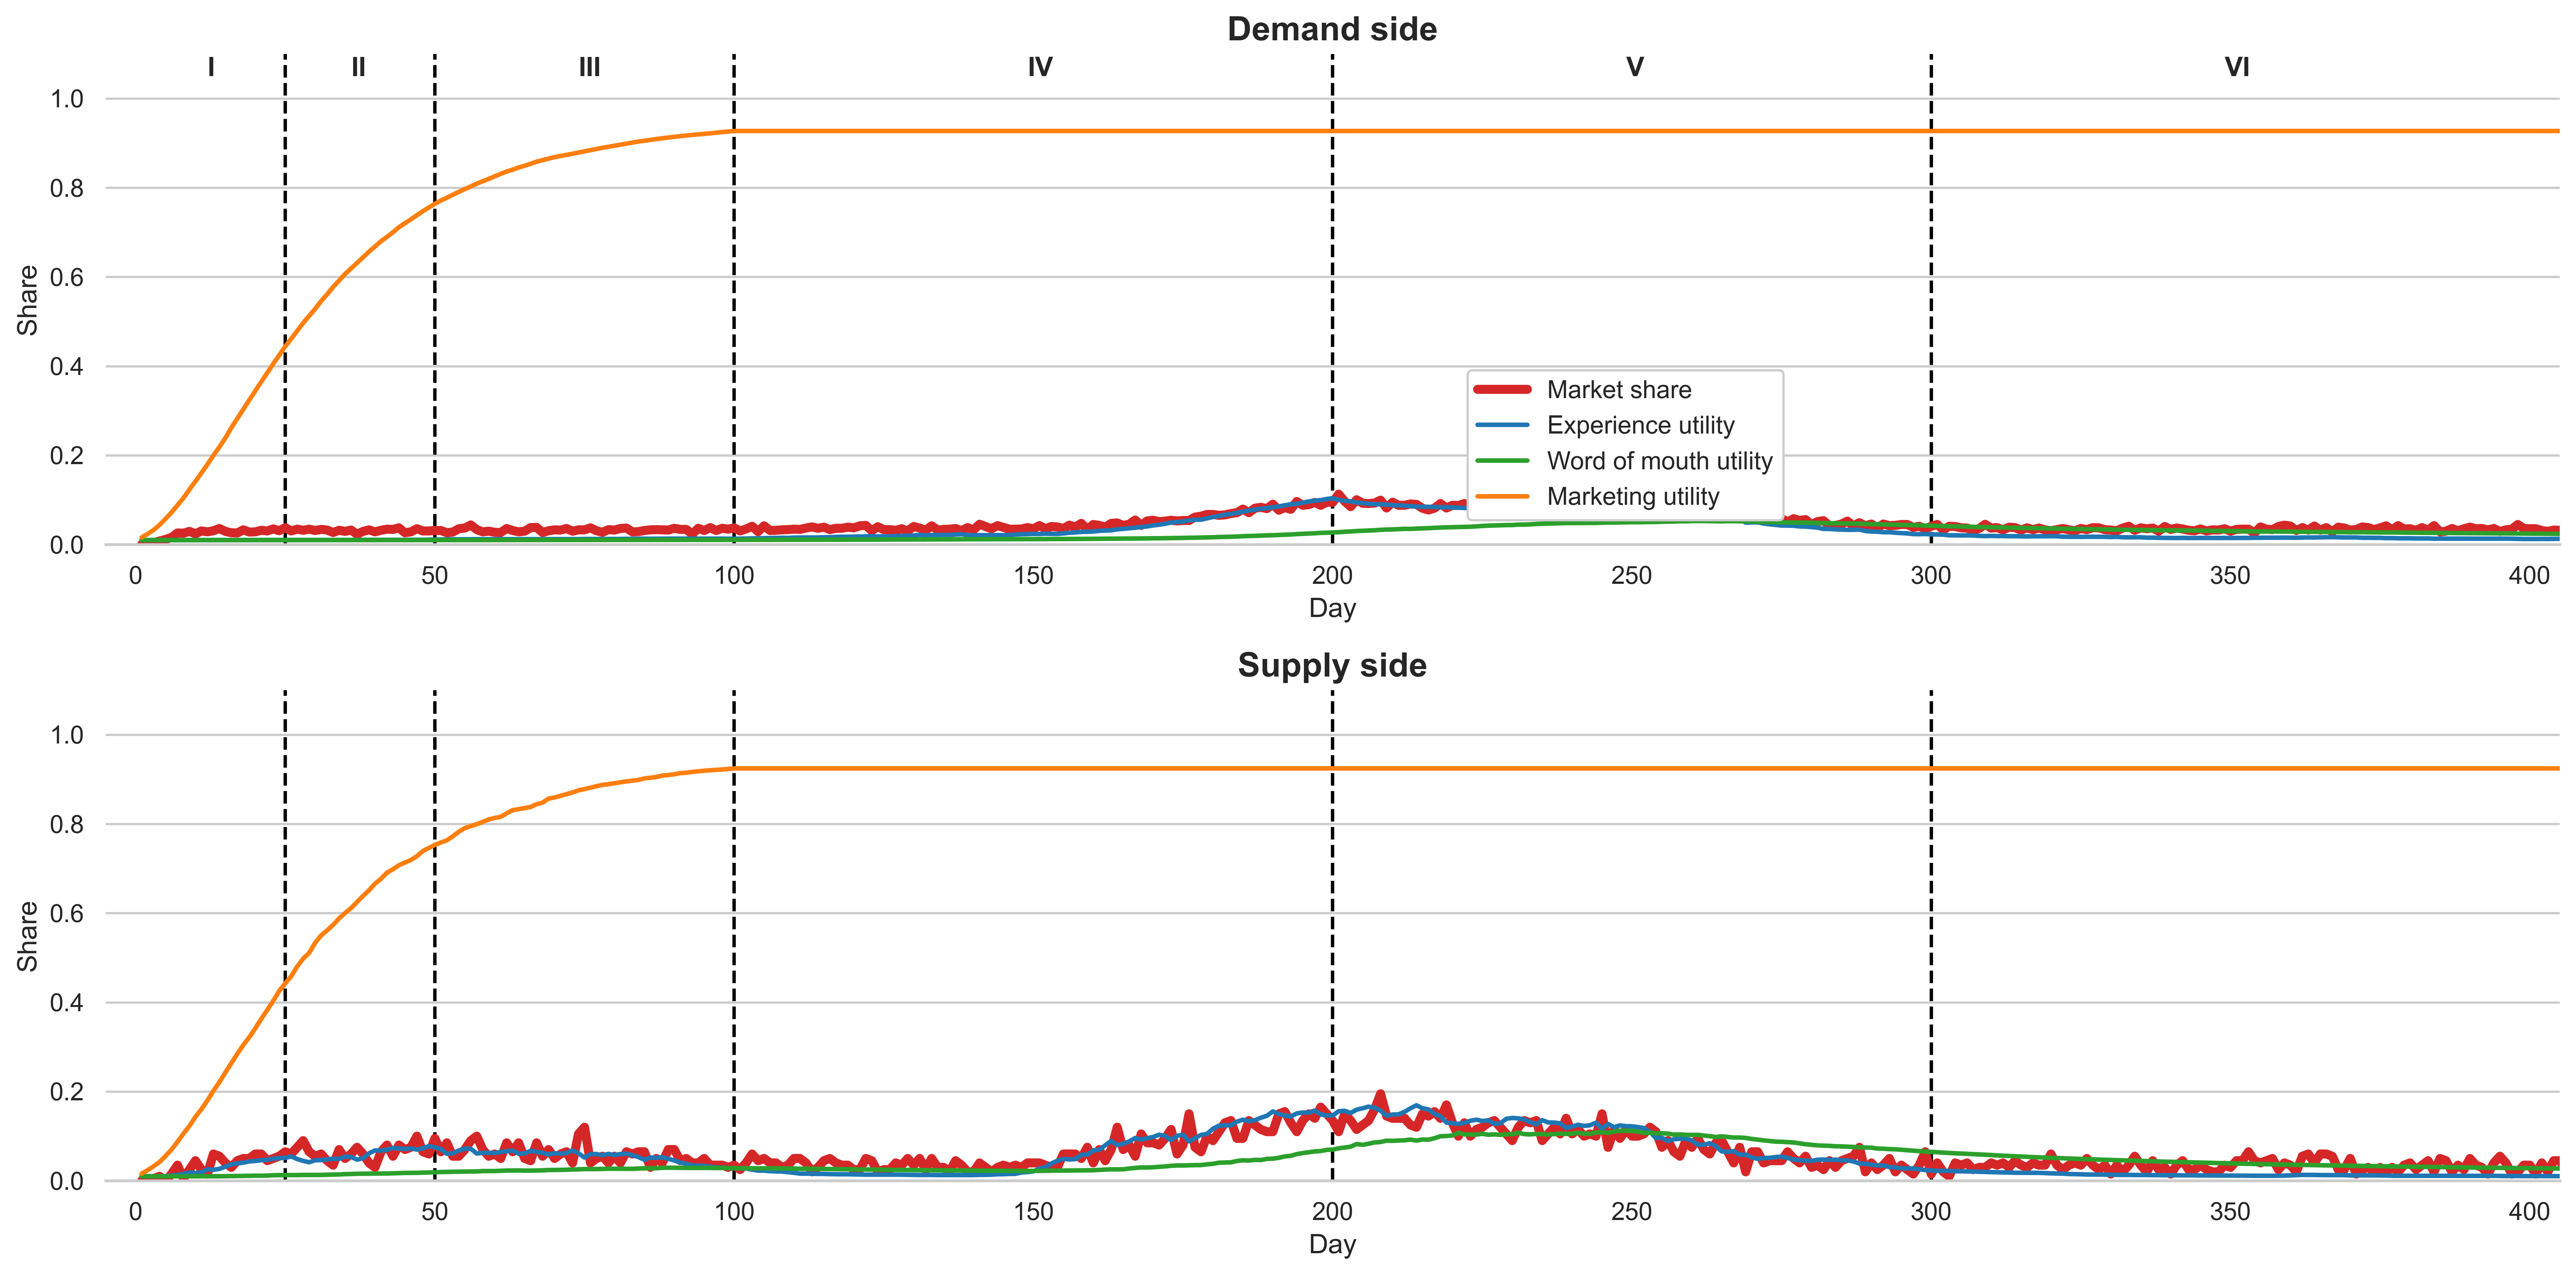

In [7]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 5
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

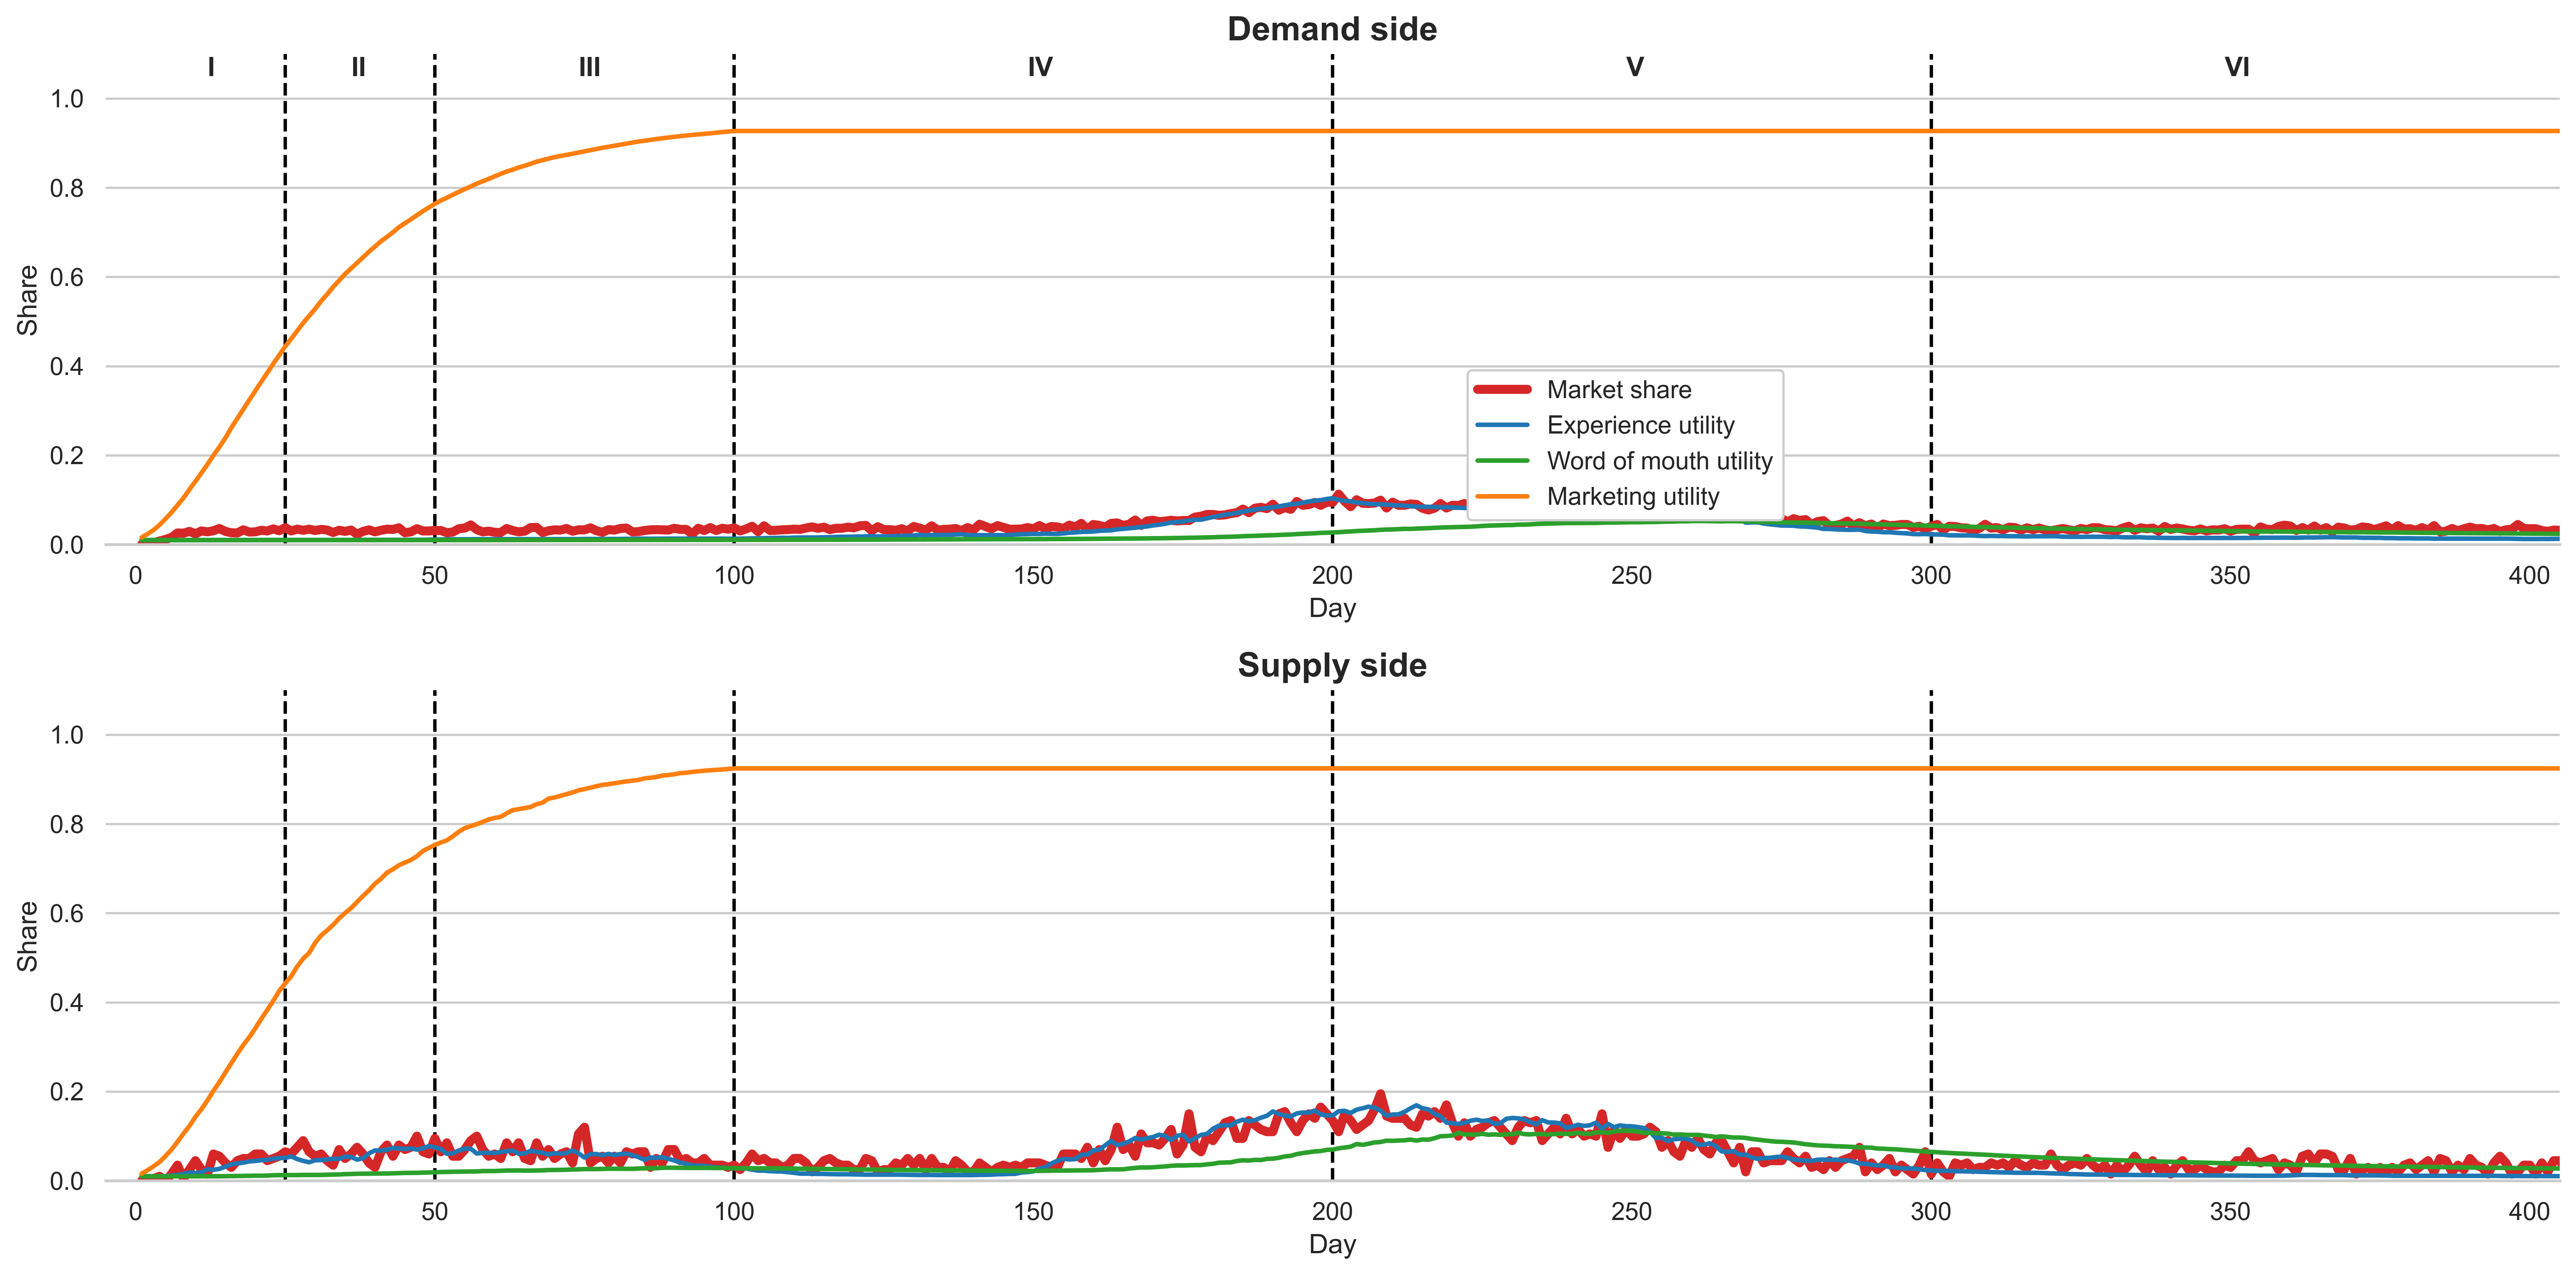

In [8]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

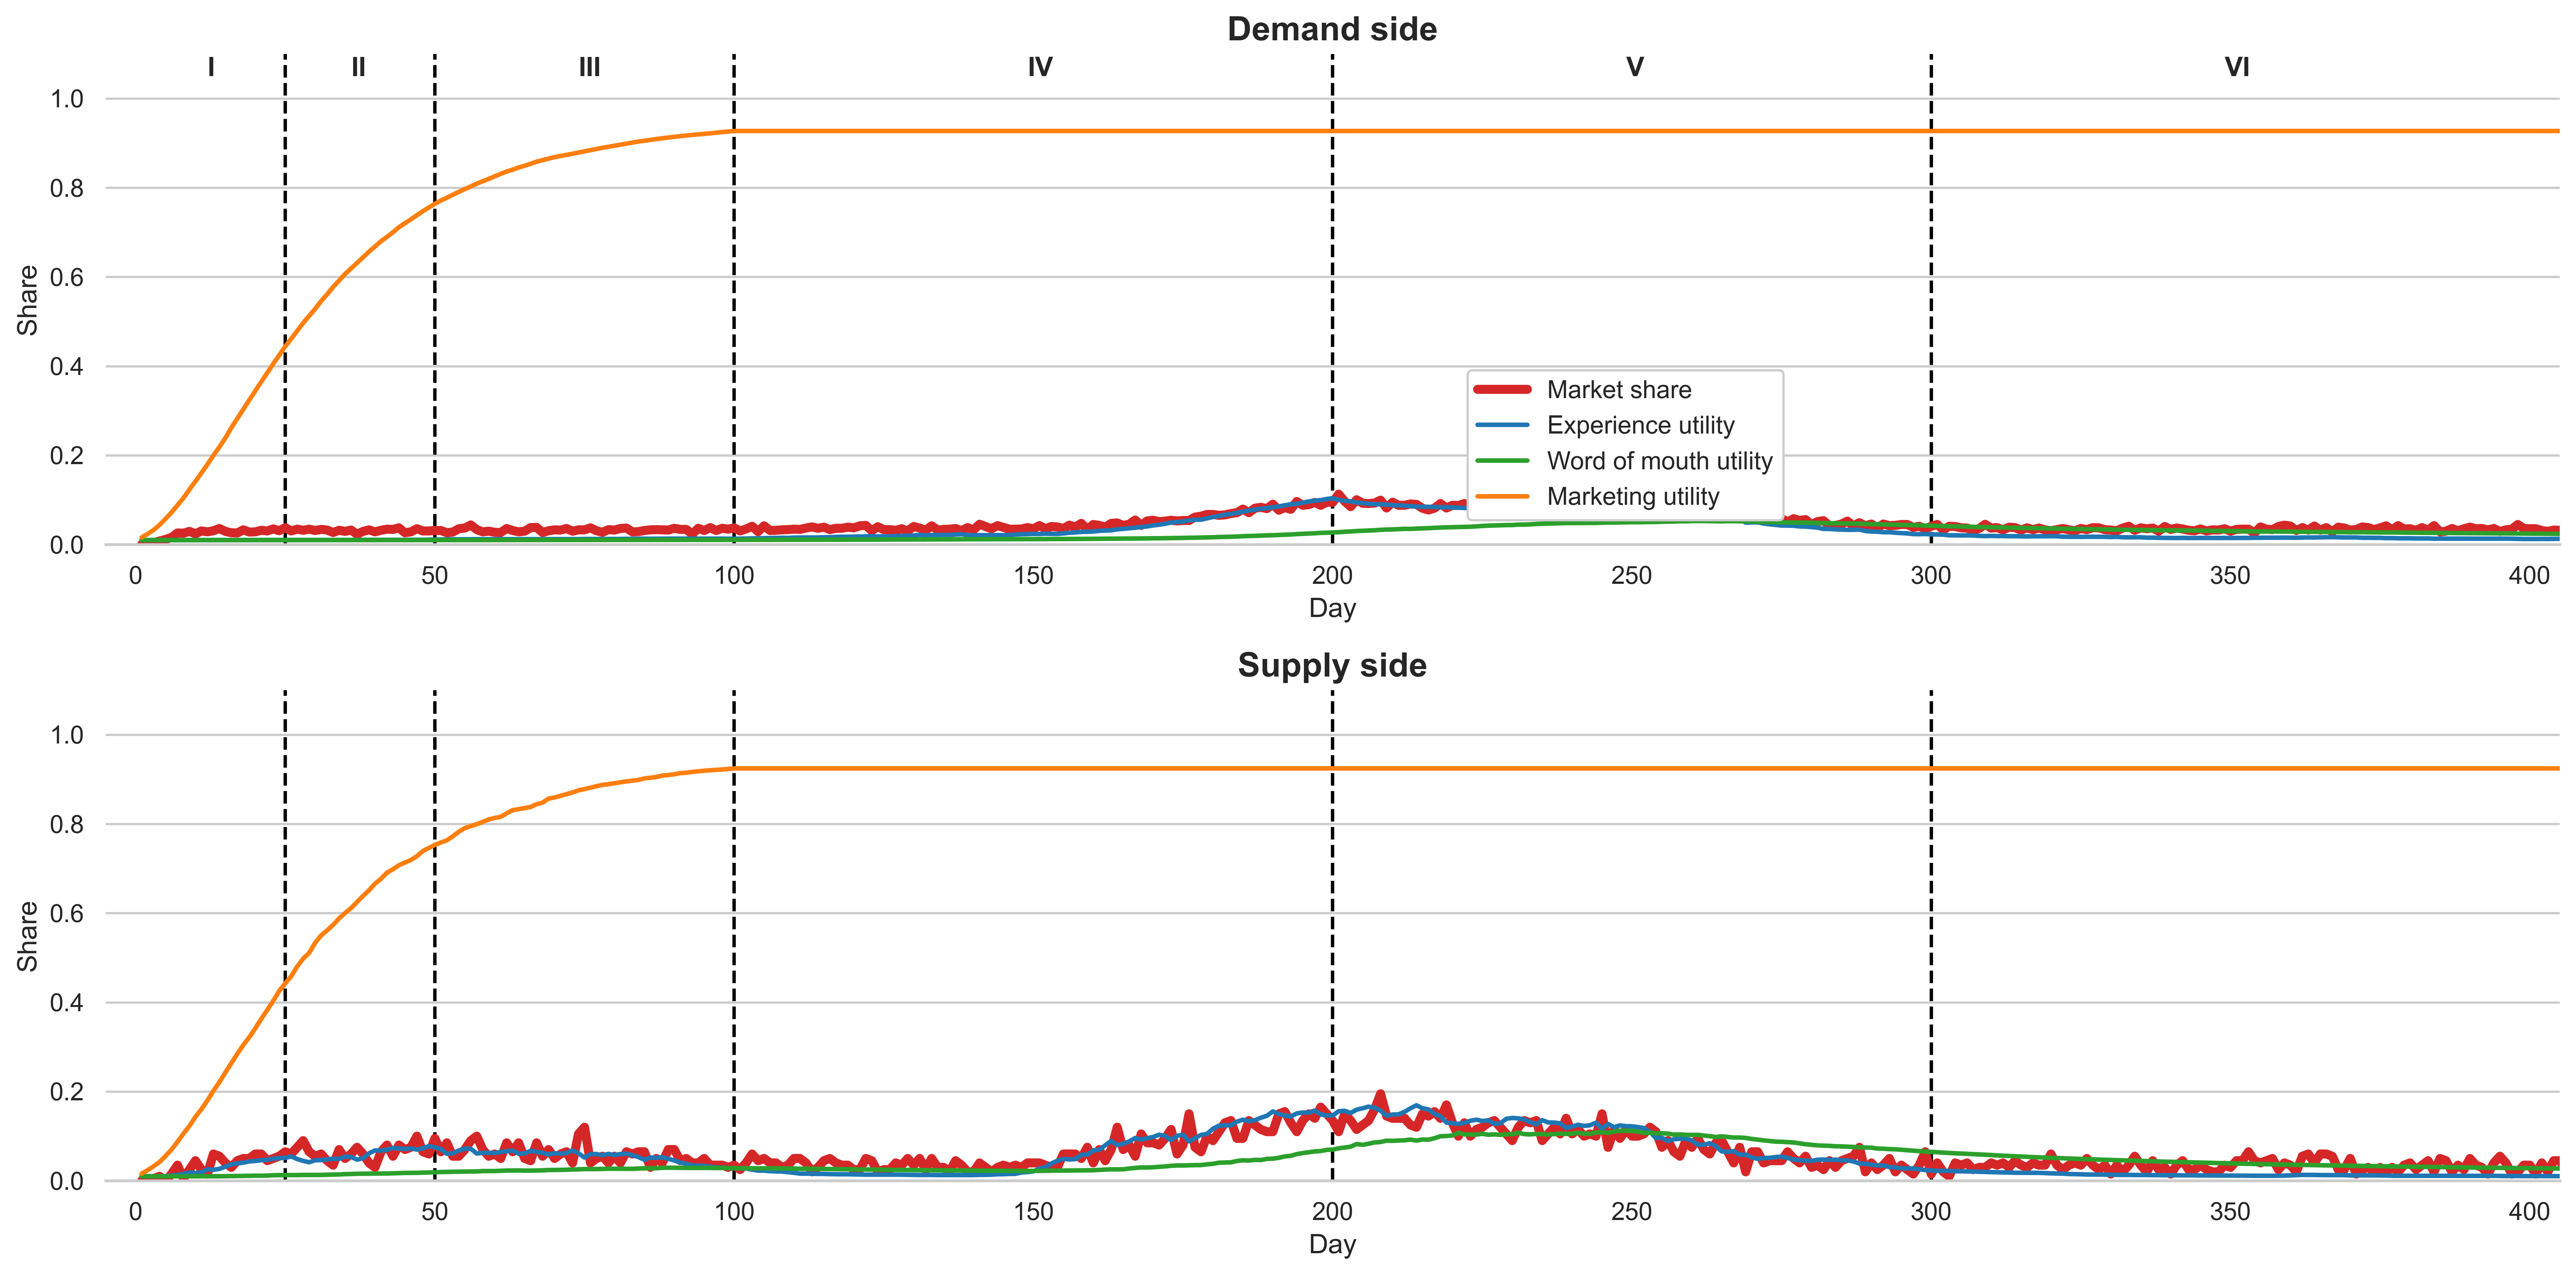

In [9]:
# nV=200, nP=2000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

AttributeError: 'DataFrame' object has no attribute 'plat_profit'

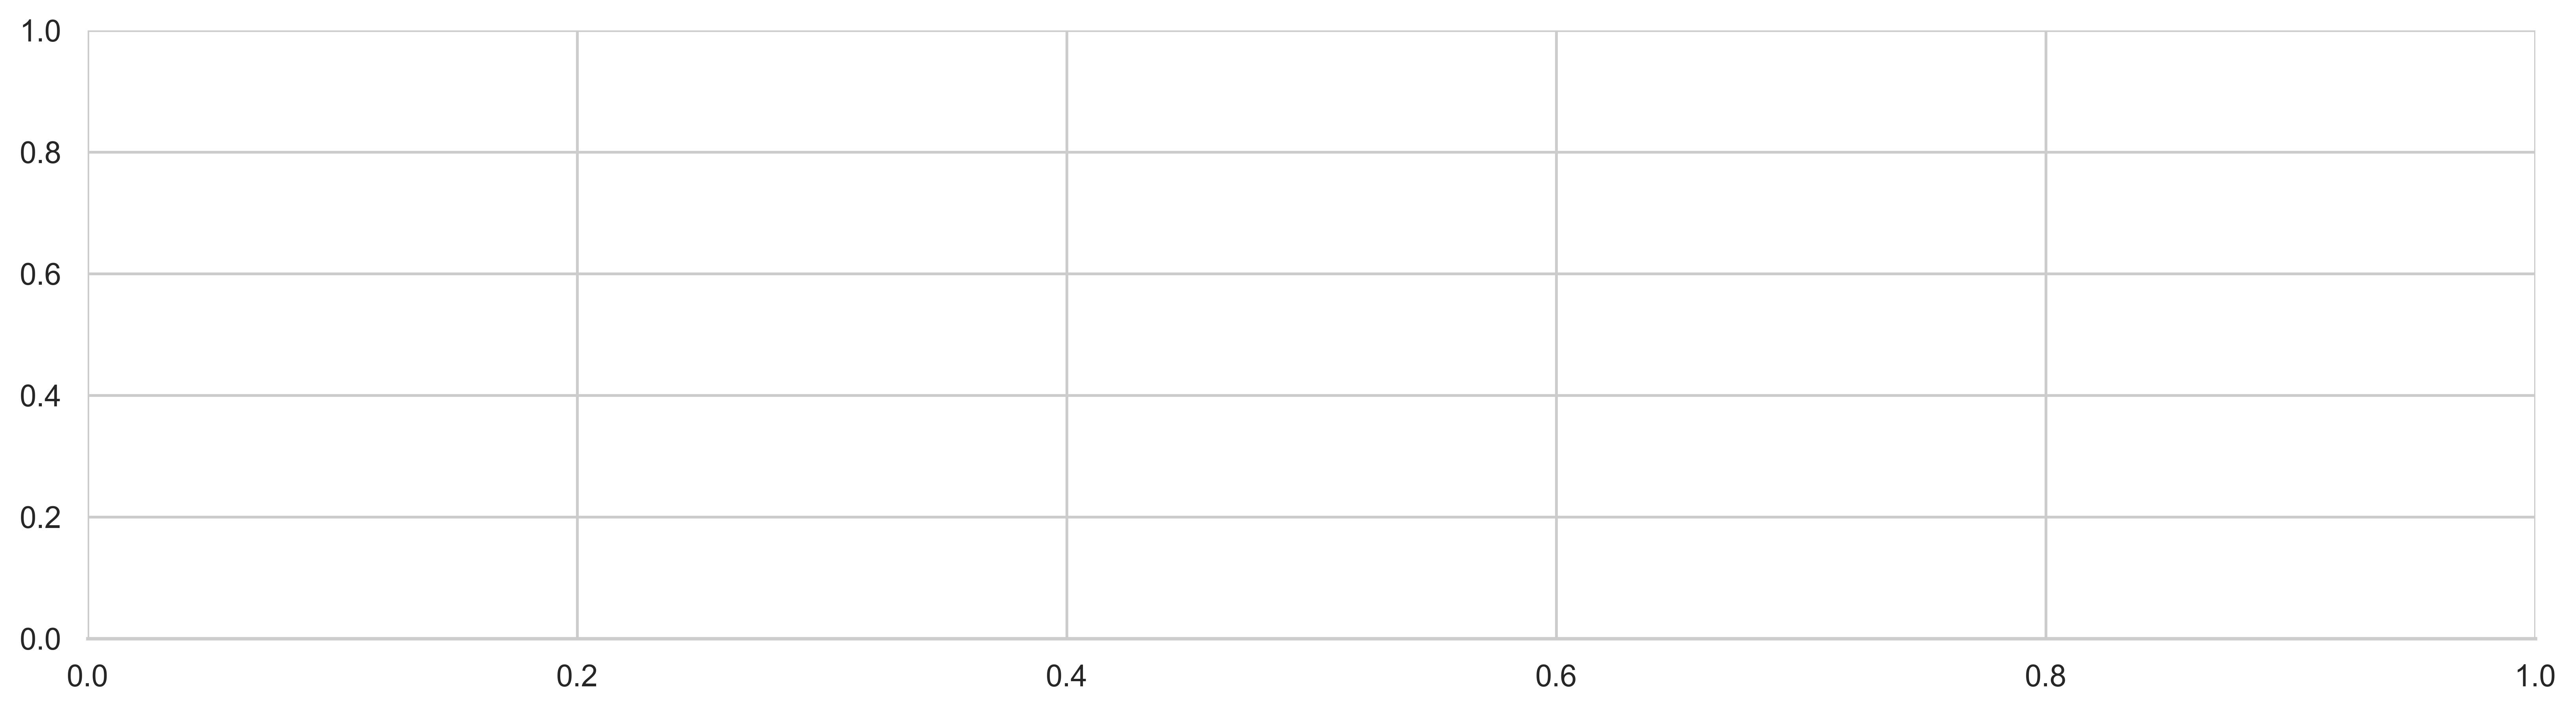

In [10]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')